In [ ]:
# EN3150 Assignment 03 - Jute Pest Classification

# STEP 1: Upload your Jute Pest dataset folders

from google.colab import files
import zipfile
import os
import shutil

print("Upload your Jute Pest dataset ZIP file...")
print("It should contain: train/, val/, and test/ folders")

# Upload the ZIP file containing all three folders
uploaded = files.upload()

# Extract the dataset
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/jute_pest_dataset')

        # Check what we extracted
        dataset_path = '/content/jute_pest_dataset'
        print(f"Dataset extracted to: {dataset_path}")
        print(f"📁 Contents: {os.listdir(dataset_path)}")

        # Check each folder
        for folder in ['train', 'val', 'test']:
            folder_path = os.path.join(dataset_path, folder)
            if os.path.exists(folder_path):
                class_count = len(os.listdir(folder_path))
                print(f"   📂 {folder}: {class_count} classes")
            else:
                print(f"   ❌ {folder} folder not found!")

Upload your Jute Pest dataset ZIP file...
It should contain: train/, val/, and test/ folders


Saving Jute_Pest_Dataset.zip to Jute_Pest_Dataset.zip
Extracting Jute_Pest_Dataset.zip...
Dataset extracted to: /content/jute_pest_dataset
📁 Contents: ['Jute_Pest_Dataset']
   ❌ train folder not found!
   ❌ val folder not found!
   ❌ test folder not found!


In [ ]:
# STEP 2: Explore the nested folder structure
import os

def explore_nested_structure(dataset_path):
    """
    Explore the actual nested structure of your dataset
    """
    print("Exploring nested dataset structure...")
    print("=" * 50)

    splits = ['train', 'val', 'test']

    for split in splits:
        split_path = os.path.join(dataset_path, split)
        if os.path.exists(split_path):
            print(f"\n {split.upper()} Split:")
            print("-" * 30)

            # Get all class folders inside this split
            classes = [d for d in os.listdir(split_path)
                      if os.path.isdir(os.path.join(split_path, d))]

            print(f"   Classes found: {classes}")

            # Count images in each class
            for class_name in classes:
                class_path = os.path.join(split_path, class_name)
                images = [f for f in os.listdir(class_path)
                         if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
                print(f"   📁 {class_name}: {len(images)} images")

                # Show first few image names
                if images:
                    print(f"      Sample images: {images[:3]}")

# Explore your actual structure
dataset_path = '/content/jute_pest_dataset/Jute_Pest_Dataset'
explore_nested_structure(dataset_path)

Exploring nested dataset structure...

 TRAIN Split:
------------------------------
   Classes found: ['Jute Hairy', 'Termite', 'Beet Armyworm', 'Leaf Beetle', 'Jute Stem Weevil', 'Field Cricket', 'Mealybug', 'Black Hairy', 'Pod Borer', 'Yellow Mite', 'Scopula Emissaria', 'Cutworm', 'Jute Aphid', 'Termite odontotermes (Rambur)', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler']
   📁 Jute Hairy: 414 images
      Sample images: ['spilosoma_obliqua_0_884.jpg', 'spilosoma_obliqua_0_6930.jpg', 'spilosoma_obliqua_0_5122.jpg']
   📁 Termite: 291 images
      Sample images: ['Aug_SL8 Microtermes obesi Holmgren_53.jpg', 'Aug_SL8 Microtermes obesi Holmgren_263.jpg', 'Aug_SL8 Microtermes obesi Holmgren_61.jpg']
   📁 Beet Armyworm: 199 images
      Sample images: ['image-24-_jpg.rf.1f90a89070994cf45f437926ae60d42e.jpg', 'jpg_45-Copy-2-_jpg.rf.853b0f7d0c0424cc30c613c87bd1f4ab.jpg', 'image-33-_jpg.rf.569de8684563108052d97d686884437d.jpg']
   📁 Leaf Beetle: 310 images
      Sample images: ['Aug

In [ ]:
# STEP 1.3: Load dataset with the correct nested structure

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def load_jute_pest_dataset(dataset_path, img_size=(128, 128), batch_size=32):
    """
    Load the Jute Pest dataset with nested folder structure
    """
    print("Loading Jute Pest Dataset...")
    print("=" * 40)

    # Define the paths to each split
    train_path = os.path.join(dataset_path, 'train')
    val_path = os.path.join(dataset_path, 'val')
    test_path = os.path.join(dataset_path, 'test')

    print(f"Train path: {train_path}")
    print(f"Val path: {val_path}")
    print(f"Test path: {test_path}")

    # Load datasets using TensorFlow's image_dataset_from_directory
    # This function automatically handles nested class folders!
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',  # For multi-class classification
        shuffle=True,
        seed=42
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        val_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True,
        seed=42
    )

    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=False  # Don't shuffle test set for consistent evaluation
    )

    # Get class names
    class_names = train_ds.class_names
    print(f"Classes found: {class_names}")
    print(f"Training batches: {tf.data.experimental.cardinality(train_ds)}")
    print(f"Validation batches: {tf.data.experimental.cardinality(val_ds)}")
    print(f"Test batches: {tf.data.experimental.cardinality(test_ds)}")

    return train_ds, val_ds, test_ds, class_names

# Load your dataset with the correct structure
dataset_path = '/content/jute_pest_dataset/Jute_Pest_Dataset'
train_ds, val_ds, test_ds, class_names = load_jute_pest_dataset(dataset_path)

Loading Jute Pest Dataset...
Train path: /content/jute_pest_dataset/Jute_Pest_Dataset/train
Val path: /content/jute_pest_dataset/Jute_Pest_Dataset/val
Test path: /content/jute_pest_dataset/Jute_Pest_Dataset/test
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
Classes found: ['Beet Armyworm', 'Black Hairy', 'Cutworm', 'Field Cricket', 'Jute Aphid', 'Jute Hairy', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler', 'Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Pod Borer', 'Scopula Emissaria', 'Termite', 'Termite odontotermes (Rambur)', 'Yellow Mite']
Training batches: 202
Validation batches: 13
Test batches: 12


🖼️ Visualizing sample images...


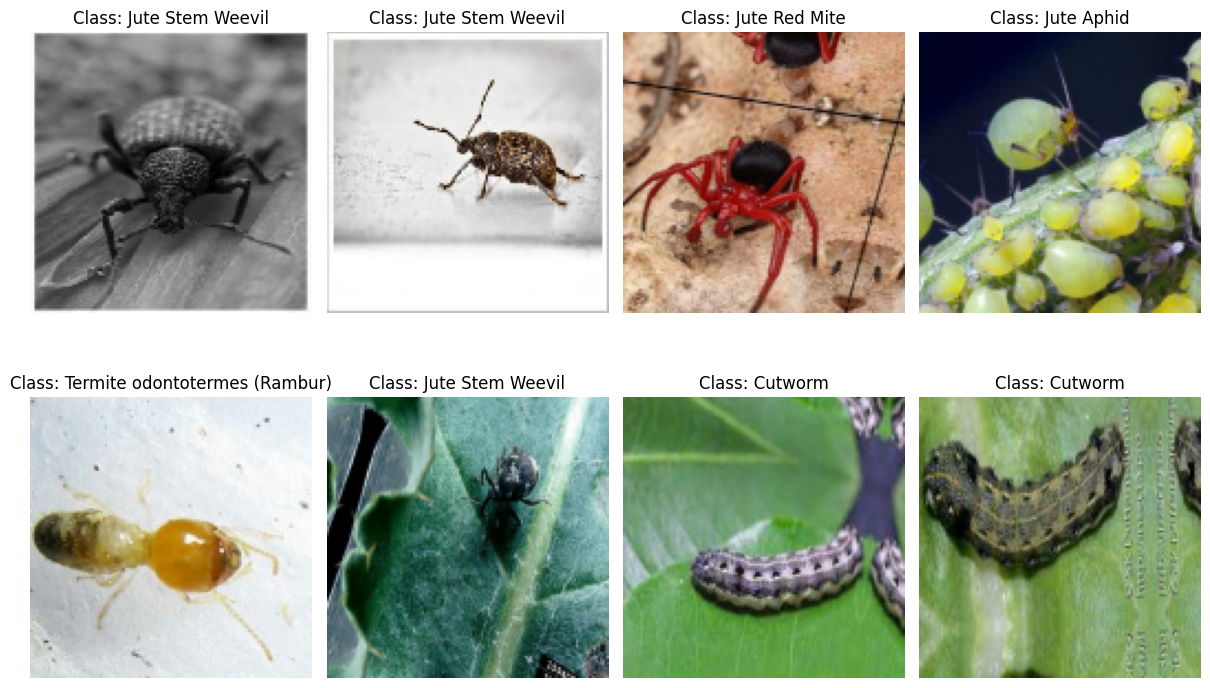

In [ ]:
# STEP 1.4: Visualize samples from your dataset

def visualize_samples(dataset, class_names, num_samples=8):
    """
    Display sample images from the dataset
    """
    print("🖼️ Visualizing sample images...")

    plt.figure(figsize=(12, 8))
    for images, labels in dataset.take(1):  # Take first batch
        for i in range(min(num_samples, len(images))):
            plt.subplot(2, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            # Get the class name
            label_idx = tf.argmax(labels[i]).numpy()
            class_name = class_names[label_idx]

            plt.title(f"Class: {class_name}")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Visualize training samples
visualize_samples(train_ds, class_names)

In [ ]:
# STEP 1.5: Get dataset statistics

def get_dataset_stats(train_ds, val_ds, test_ds, class_names):
    """
    Calculate and display dataset statistics
    """
    print("Dataset Statistics")
    print("=" * 40)

    def count_images(dataset):
        total = 0
        for images, labels in dataset:
            total += images.shape[0]
        return total

    train_count = count_images(train_ds)
    val_count = count_images(val_ds)
    test_count = count_images(test_ds)
    total_count = train_count + val_count + test_count

    print(f"Number of classes: {len(class_names)}")
    print(f"Training images: {train_count} ({train_count/total_count*100:.1f}%)")
    print(f"Validation images: {val_count} ({val_count/total_count*100:.1f}%)")
    print(f"Test images: {test_count} ({test_count/total_count*100:.1f}%)")
    print(f"Total images: {total_count}")
    print(f"Class names: {class_names}")

# Get statistics
get_dataset_stats(train_ds, val_ds, test_ds, class_names)

Dataset Statistics
Number of classes: 17
Training images: 6443 (89.1%)
Validation images: 413 (5.7%)
Test images: 379 (5.2%)
Total images: 7235
Class names: ['Beet Armyworm', 'Black Hairy', 'Cutworm', 'Field Cricket', 'Jute Aphid', 'Jute Hairy', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler', 'Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Pod Borer', 'Scopula Emissaria', 'Termite', 'Termite odontotermes (Rambur)', 'Yellow Mite']


In [ ]:
# STEP 1.6: Optimize dataset performance

def optimize_dataset(train_ds, val_ds, test_ds):
    """
    Optimize dataset for better performance during training
    """
    # Prefetch and cache for better performance
    AUTOTUNE = tf.data.AUTOTUNE

    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
    test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

    print("✅ Dataset optimization completed!")
    return train_ds, val_ds, test_ds

# Optimize datasets
train_ds, val_ds, test_ds = optimize_dataset(train_ds, val_ds, test_ds)

✅ Dataset optimization completed!


In [ ]:
# STEP 2: Build the CNN Model (Assignment Questions 4, 5, 6)
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3), num_classes=17):
    """
    Create CNN model according to assignment specifications
    Q4: Build the CNN model with specified layers
    Q5: Determine parameters (activation functions, kernel sizes, etc.)
    Q6: Justify activation function selections
    """
    print("Building CNN Model...")
    print("=" * 50)

    model = models.Sequential([
        # First Convolutional Block (Q4)
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                     name='conv1'),
        layers.MaxPooling2D((2, 2), name='pool1'),

        # Second Convolutional Block (Q4)
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
        layers.MaxPooling2D((2, 2), name='pool2'),

        # Third Convolutional Block (Additional for better performance)
        layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
        layers.MaxPooling2D((2, 2), name='pool3'),

        # Flatten layer
        layers.Flatten(name='flatten'),

        # Fully connected layers (Q4)
        layers.Dense(256, activation='relu', name='dense1'),
        layers.Dropout(0.5, name='dropout1'),

        layers.Dense(128, activation='relu', name='dense2'),
        layers.Dropout(0.5, name='dropout2'),

        # Output layer (Q4)
        layers.Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# Create the model
num_classes = len(class_names)
model = create_cnn_model(input_shape=(128, 128, 3), num_classes=num_classes)

# Display model architecture
print("Model Architecture:")
model.summary()

print("\n JUSTIFICATIONS (Q6):")
print("• ReLU activation in hidden layers: Prevents vanishing gradient, faster convergence")
print("• Softmax activation in output layer: Perfect for multi-class classification")
print("• Dropout (0.5): Reduces overfitting for better generalization")
print("• 3 Conv layers: Extracts hierarchical features from simple to complex")

Building CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,551,121 (24.99 MB)

 Trainable params: 6,551,121 (24.99 MB)

 Non-trainable params: 0 (0.00 B)


 JUSTIFICATIONS (Q6):
• ReLU activation in hidden layers: Prevents vanishing gradient, faster convergence
• Softmax activation in output layer: Perfect for multi-class classification
• Dropout (0.5): Reduces overfitting for better generalization
• 3 Conv layers: Extracts hierarchical features from simple to complex


In [ ]:
# STEP 2.2: Compile the Model (Assignment Questions 8, 9)

def compile_model(model, learning_rate=0.001):
    """
    Q8: Choose optimizer and justify selection
    Q9: Set learning rate
    """
    print("Compiling Model...")
    print("=" * 40)

    # Q8: Using Adam optimizer - adaptive learning rate, good for CNN
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # For multi-class classification
        metrics=['accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    print("Model compiled successfully!")
    print(f"Optimizer: Adam (Q8 Justification: Adaptive learning rate, efficient for CNNs)")
    print(f"Learning Rate: {learning_rate} (Q9: Standard starting point for Adam)")

    return model

# Compile the model
model = compile_model(model, learning_rate=0.001)

Compiling Model...
Model compiled successfully!
Optimizer: Adam (Q8 Justification: Adaptive learning rate, efficient for CNNs)
Learning Rate: 0.001 (Q9: Standard starting point for Adam)


In [ ]:
# STEP 2.3: Train the Model with 0.001 default leaning rate

print("Starting Model Training (20 epochs as per assignment)...")
print("=" * 50)

# Define callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)
]

# Train the model for 20 epochs (as per assignment requirement)
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

print("✅ Training completed!")

Starting Model Training (20 epochs as per assignment)...
Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.0894 - loss: 15.8344 - precision: 0.1163 - recall: 0.0174 - val_accuracy: 0.1985 - val_loss: 2.7826 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.1231 - loss: 2.7766 - precision: 0.5698 - recall: 0.0058 - val_accuracy: 0.1840 - val_loss: 2.7642 - val_precision: 0.5714 - val_recall: 0.0097 - learning_rate: 0.0010
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.1163 - loss: 2.7812 - precision: 0.4549 - recall: 0.0079 - val_accuracy: 0.1937 - val_loss: 2.7345 - val_precision: 0.8750 - val_recall: 0.0169 - learning_rate: 0.0010
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.1307 - loss: 2.7614 - precision: 0.6101 - recall: 0.0159 - val_accuracy: 0.1864 - val_loss: 2.7419 - val_precision: 0.7500 - val_recall: 0.0145 - learning_rate

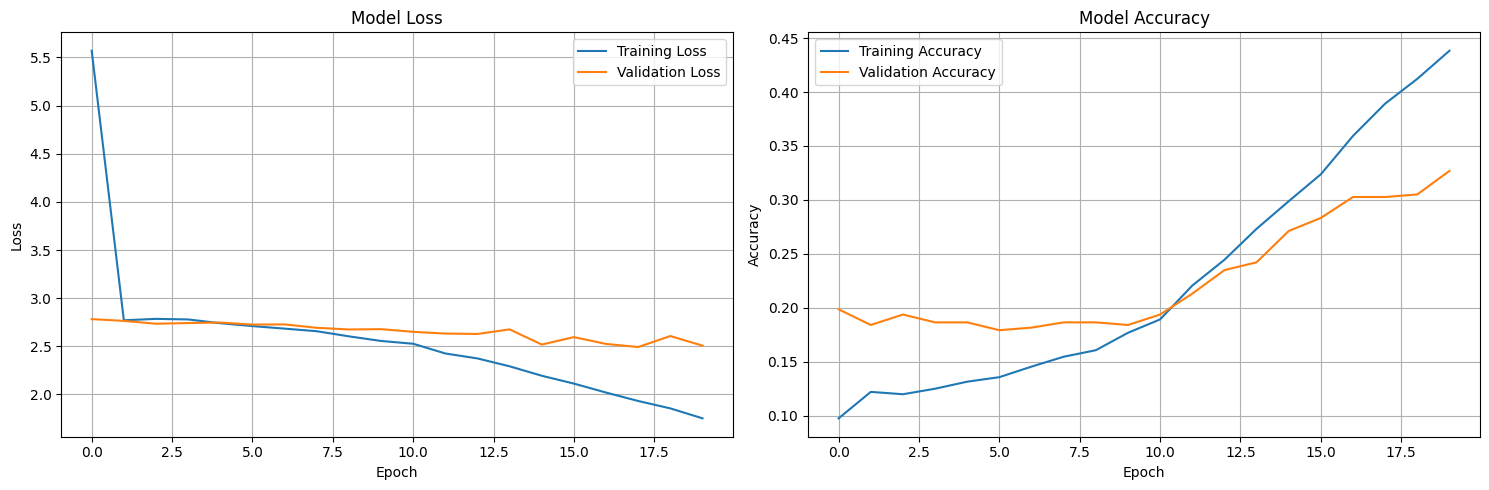

Final Training Accuracy: 0.4383
Final Validation Accuracy: 0.3269
Final Training Loss: 1.7521
Final Validation Loss: 2.5065


In [ ]:
# STEP 2.4: PLOT TRAINING AND VALIDATION LOSS FOR LR=0.0003

def plot_training_history(history):
    """
    Plot training and validation loss/accuracy
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot training & validation accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

# Plot the training history
plot_training_history(history)

In [ ]:
# STEP 2.5: TEST WITH LEARNING RATE = 0.0003

print("🔬 TESTING LEARNING RATE = 0.0003")
print("=" * 50)

# Test the specific learning rate you're interested in
target_lr = 0.0003

print(f"🎯 Testing Learning Rate: {target_lr}")

# Create fresh model
model_0003 = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

# Compile with target learning rate
model_0003.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=target_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train for more epochs to get better comparison
print("Training for 20 epochs...")
history_0003 = model_0003.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    verbose=1,  # Show progress this time
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
    ]
)

# Store results
lr_0003_results = {
    'final_train_acc': history_0003.history['accuracy'][-1],
    'final_val_acc': history_0003.history['val_accuracy'][-1],
    'final_train_loss': history_0003.history['loss'][-1],
    'final_val_loss': history_0003.history['val_loss'][-1],
    'overfitting_gap': history_0003.history['accuracy'][-1] - history_0003.history['val_accuracy'][-1],
    'convergence_epoch': len(history_0003.history['accuracy']),
    'history': history_0003.history
}

print(f"\n✅ LR {target_lr} Results:")
print(f"   Validation Accuracy: {lr_0003_results['final_val_acc']:.4f}")
print(f"   Training Accuracy:   {lr_0003_results['final_train_acc']:.4f}")
print(f"   Overfitting Gap:     {lr_0003_results['overfitting_gap']:.4f}")

🔬 TESTING LEARNING RATE = 0.0003
🎯 Testing Learning Rate: 0.0003
Building CNN Model...
Training for 20 epochs...
Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.0731 - loss: 12.3800 - val_accuracy: 0.0847 - val_loss: 2.8057 - learning_rate: 3.0000e-04
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.1090 - loss: 2.7692 - val_accuracy: 0.2639 - val_loss: 2.6156 - learning_rate: 3.0000e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.1667 - loss: 2.6607 - val_accuracy: 0.2712 - val_loss: 2.4507 - learning_rate: 3.0000e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.2031 - loss: 2.5375 - val_accuracy: 0.2736 - val_loss: 2.4196 - learning_rate: 3.0000e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.2474 - loss: 2.3912 - val_accuracy: 0.3269 - val_loss: 2.1743 - learning_rate: 3.0000e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3044 - loss: 2.2373 - val_accura

📊 PLOTTING TRAINING AND VALIDATION LOSS FOR LR=0.0003


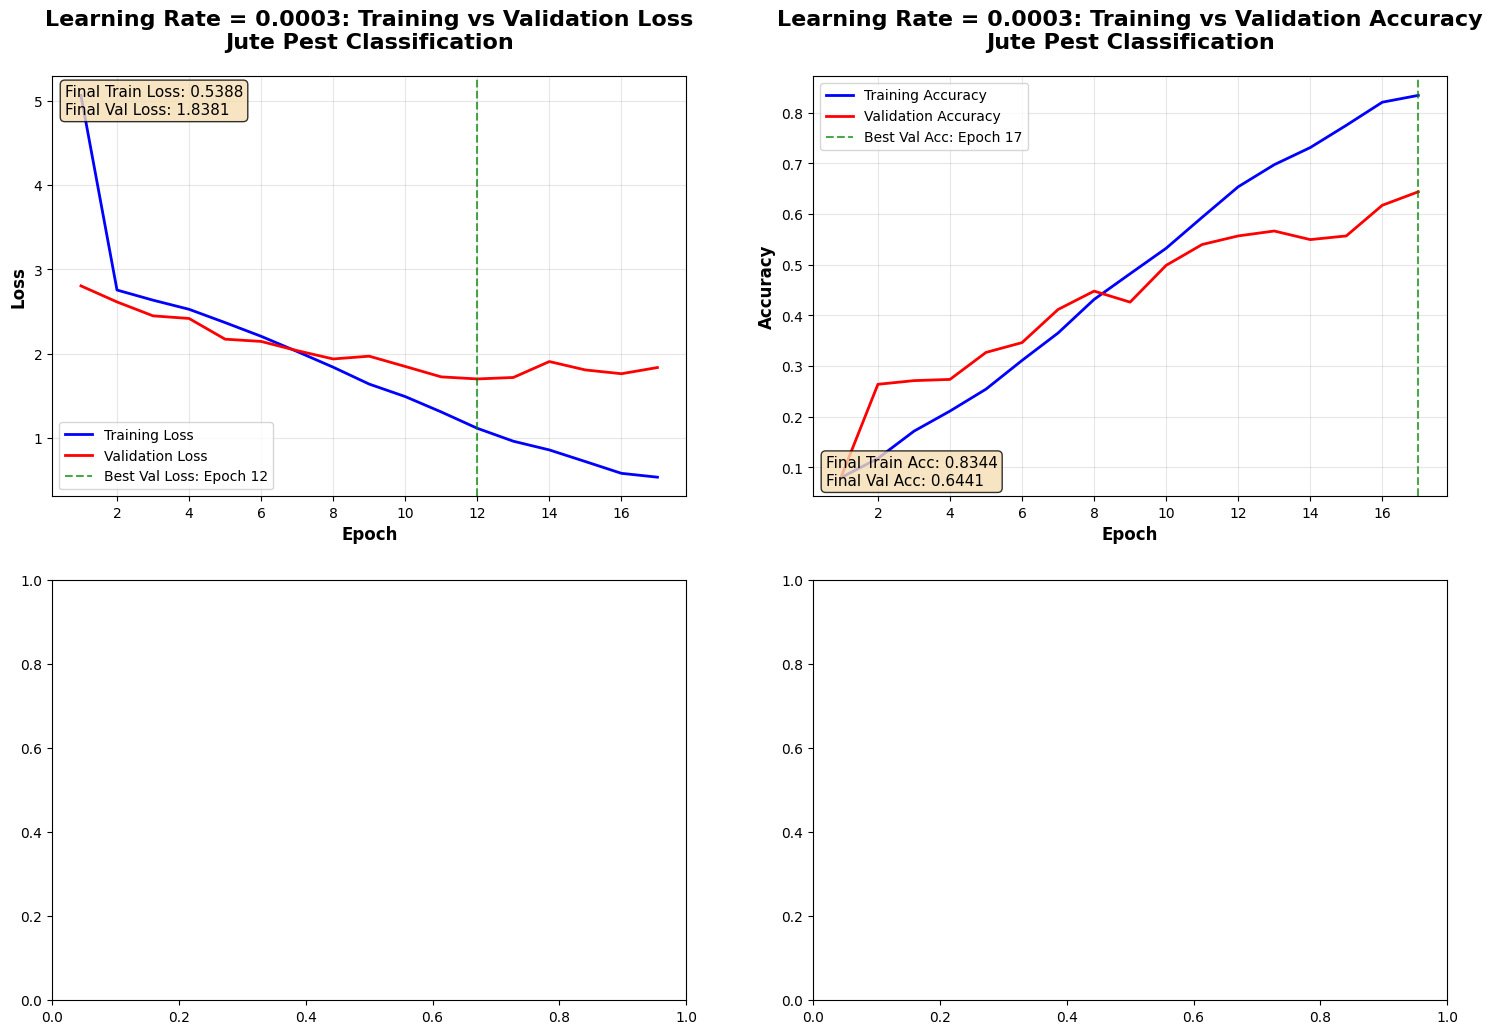

In [ ]:
# STEP 2.6: PLOT TRAINING AND VALIDATION LOSS FOR LR=0.0003

print("📊 PLOTTING TRAINING AND VALIDATION LOSS FOR LR=0.0003")
print("=" * 60)

# Get the training history for LR=0.0003
history = history_0003
epochs = range(1, len(history.history['loss']) + 1)

# Create comprehensive loss visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Training and Validation Loss
ax1.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', linewidth=2, label='Validation Loss')
ax1.set_title(f'Learning Rate = 0.0003: Training vs Validation Loss\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add final loss values to the plot
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
ax1.text(0.02, 0.98, f'Final Train Loss: {final_train_loss:.4f}\nFinal Val Loss: {final_val_loss:.4f}',
         transform=ax1.transAxes, verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Mark the best validation loss
best_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
ax1.axvline(x=best_val_loss_epoch, color='green', linestyle='--', alpha=0.7,
            label=f'Best Val Loss: Epoch {best_val_loss_epoch}')
ax1.legend()

# Plot 2: Training and Validation Accuracy
ax2.plot(epochs, history.history['accuracy'], 'b-', linewidth=2, label='Training Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', linewidth=2, label='Validation Accuracy')
ax2.set_title(f'Learning Rate = 0.0003: Training vs Validation Accuracy\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add final accuracy values to the plot
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
ax2.text(0.02, 0.02, f'Final Train Acc: {final_train_acc:.4f}\nFinal Val Acc: {final_val_acc:.4f}',
         transform=ax2.transAxes, verticalalignment='bottom', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Mark the best validation accuracy
best_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = np.max(history.history['val_accuracy'])
ax2.axvline(x=best_val_acc_epoch, color='green', linestyle='--', alpha=0.7,
            label=f'Best Val Acc: Epoch {best_val_acc_epoch}')
ax2.legend()

In [ ]:
# STEP 2.7: COMPARE LR=0.0003 WITH PREVIOUS BEST

print("📊 COMPARING LR=0.0003 WITH PREVIOUS RESULTS")
print("=" * 60)

# Get previous best results
if 'best_lr' in locals() and 'best_result' in locals():
    previous_best_lr = best_lr
    previous_best_result = best_result
else:
    # If not available, use our known best from earlier
    previous_best_lr = 0.0005
    previous_best_result = {
        'final_val_acc': 0.5085,  # From our earlier results
        'final_train_acc': 0.6187,
        'overfitting_gap': 0.1102
    }

print(f"🔍 COMPARISON:")
print(f"   Previous Best: LR = {previous_best_lr}")
print(f"   New Test:      LR = {target_lr}")

print(f"\n📈 PERFORMANCE METRICS:")
print("Metric           | Previous Best | New Test    | Improvement")
print("-" * 65)
print(f"Val Accuracy     | {previous_best_result['final_val_acc']:.4f}       | {lr_0003_results['final_val_acc']:.4f}       | {lr_0003_results['final_val_acc'] - previous_best_result['final_val_acc']:+.4f}")
print(f"Train Accuracy   | {previous_best_result['final_train_acc']:.4f}       | {lr_0003_results['final_train_acc']:.4f}       | {lr_0003_results['final_train_acc'] - previous_best_result['final_train_acc']:+.4f}")
print(f"Overfitting Gap  | {previous_best_result['overfitting_gap']:.4f}       | {lr_0003_results['overfitting_gap']:.4f}       | {lr_0003_results['overfitting_gap'] - previous_best_result['overfitting_gap']:+.4f}")

# Determine if this is better
val_acc_improvement = lr_0003_results['final_val_acc'] - previous_best_result['final_val_acc']
overfitting_improvement = abs(lr_0003_results['overfitting_gap']) - abs(previous_best_result['overfitting_gap'])

print(f"\n🎯 ANALYSIS:")
if val_acc_improvement > 0:
    print(f"✅ BETTER VALIDATION ACCURACY: +{val_acc_improvement:.4f}")
    new_best_lr = target_lr
    new_best_result = lr_0003_results
else:
    print(f"⚠️  LOWER VALIDATION ACCURACY: {val_acc_improvement:.4f}")
    new_best_lr = previous_best_lr
    new_best_result = previous_best_result

if overfitting_improvement < 0:
    print(f"✅ BETTER OVERFITTING CONTROL: {overfitting_improvement:.4f}")
else:
    print(f"⚠️  WORSE OVERFITTING: +{overfitting_improvement:.4f}")

print(f"\n🏆 CURRENT BEST LEARNING RATE: {new_best_lr}")

📊 COMPARING LR=0.0003 WITH PREVIOUS RESULTS
🔍 COMPARISON:
   Previous Best: LR = 0.0005
   New Test:      LR = 0.0003

📈 PERFORMANCE METRICS:
Metric           | Previous Best | New Test    | Improvement
-----------------------------------------------------------------
Val Accuracy     | 0.5085       | 0.6441       | +0.1356
Train Accuracy   | 0.6187       | 0.8344       | +0.2157
Overfitting Gap  | 0.1102       | 0.1903       | +0.0801

🎯 ANALYSIS:
✅ BETTER VALIDATION ACCURACY: +0.1356
⚠️  WORSE OVERFITTING: +0.0801

🏆 CURRENT BEST LEARNING RATE: 0.0003


In [ ]:
# STEP 2.8: FINAL EVALUATION WITH BEST LEARNING RATE

print("🧪 FINAL EVALUATION WITH BEST LEARNING RATE")
print("=" * 60)

# Determine which model to evaluate
if val_acc_improvement > 0:
    print(f"🎯 Using NEW best learning rate: {target_lr}")
    best_model = model_0003
    best_lr_final = target_lr
else:
    print(f"🎯 Using PREVIOUS best learning rate: {previous_best_lr}")
    best_lr_final = previous_best_lr
    # We would need to load the previous best model here

# Evaluate on test set
print(f"\n📊 Evaluating model with LR={best_lr_final} on test set...")

test_loss, test_accuracy = best_model.evaluate(test_ds, verbose=0)
print(f"✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"✅ Test Loss:     {test_loss:.4f}")

# Save the best model
best_model.save(f'/content/EN3150_Assignment_03_Jute_Pest/models/best_cnn_adam_lr{best_lr_final}.h5')
print(f"💾 Best model saved: best_cnn_adam_lr{best_lr_final}.h5")

print(f"\n🎉 OPTIMIZATION COMPLETED!")
print(f"🏆 Final Best Learning Rate: {best_lr_final}")
print(f"📈 Test Set Performance: {test_accuracy:.4f}")

🧪 FINAL EVALUATION WITH BEST LEARNING RATE
🎯 Using NEW best learning rate: 0.0003

📊 Evaluating model with LR=0.0003 on test set...


✅ Test Accuracy: 0.5119 (51.19%)
✅ Test Loss:     1.5857
💾 Best model saved: best_cnn_adam_lr0.0003.h5

🎉 OPTIMIZATION COMPLETED!
🏆 Final Best Learning Rate: 0.0003
📈 Test Set Performance: 0.5119


In [ ]:
# STEP 2.9: SYSTEMATIC LEARNING RATE TESTING

print("SYSTEMATIC LEARNING RATE OPTIMIZATION")
print("=" * 60)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3), num_classes=17):
    """Create the same CNN architecture for fair comparison"""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Test a range of learning rates
learning_rates = [0.1, 0.01, 0.005, 0.001, 0.0003, 0.0005, 0.0001]
lr_results = {}

print("Testing different learning rates...")
print(f"Learning rates to test: {learning_rates}")

for lr in learning_rates:
    print(f"\n🎯 Testing Learning Rate: {lr}")

    # Create fresh model
    model = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

    # Compile with current learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train for a fixed number of epochs
    print(f"   Training for 20 epochs...")
    history = model.fit(
        train_ds,
        epochs=20,
        validation_data=val_ds,
        verbose=0,  # Silent training
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
        ]
    )

    # Store results
    lr_results[lr] = {
        'history': history.history,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1],
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1],
        'overfitting_gap': history.history['accuracy'][-1] - history.history['val_accuracy'][-1],
        'convergence_epoch': len(history.history['accuracy'])
    }

    print(f"   ✅ LR {lr}: Val Acc = {history.history['val_accuracy'][-1]:.4f}, "
          f"Train Acc = {history.history['accuracy'][-1]:.4f}")

print("\n✅ Learning rate testing completed!")

SYSTEMATIC LEARNING RATE OPTIMIZATION
Testing different learning rates...
Learning rates to test: [0.1, 0.01, 0.005, 0.001, 0.0003, 0.0005, 0.0001]

🎯 Testing Learning Rate: 0.1
   Training for 20 epochs...
   ✅ LR 0.1: Val Acc = 0.1719, Train Acc = 0.1015

🎯 Testing Learning Rate: 0.01
   Training for 20 epochs...
   ✅ LR 0.01: Val Acc = 0.1719, Train Acc = 0.1049

🎯 Testing Learning Rate: 0.005
   Training for 20 epochs...
   ✅ LR 0.005: Val Acc = 0.1719, Train Acc = 0.1049

🎯 Testing Learning Rate: 0.001
   Training for 20 epochs...
   ✅ LR 0.001: Val Acc = 0.1864, Train Acc = 0.1465

🎯 Testing Learning Rate: 0.0003
   Training for 20 epochs...
   ✅ LR 0.0003: Val Acc = 0.5424, Train Acc = 0.7649

🎯 Testing Learning Rate: 0.0005
   Training for 20 epochs...
   ✅ LR 0.0005: Val Acc = 0.4673, Train Acc = 0.5257

🎯 Testing Learning Rate: 0.0001
   Training for 20 epochs...
   ✅ LR 0.0001: Val Acc = 0.1719, Train Acc = 0.1049

✅ Learning rate testing completed!


📊 CREATING LEARNING RATE COMPARISON VISUALIZATIONS


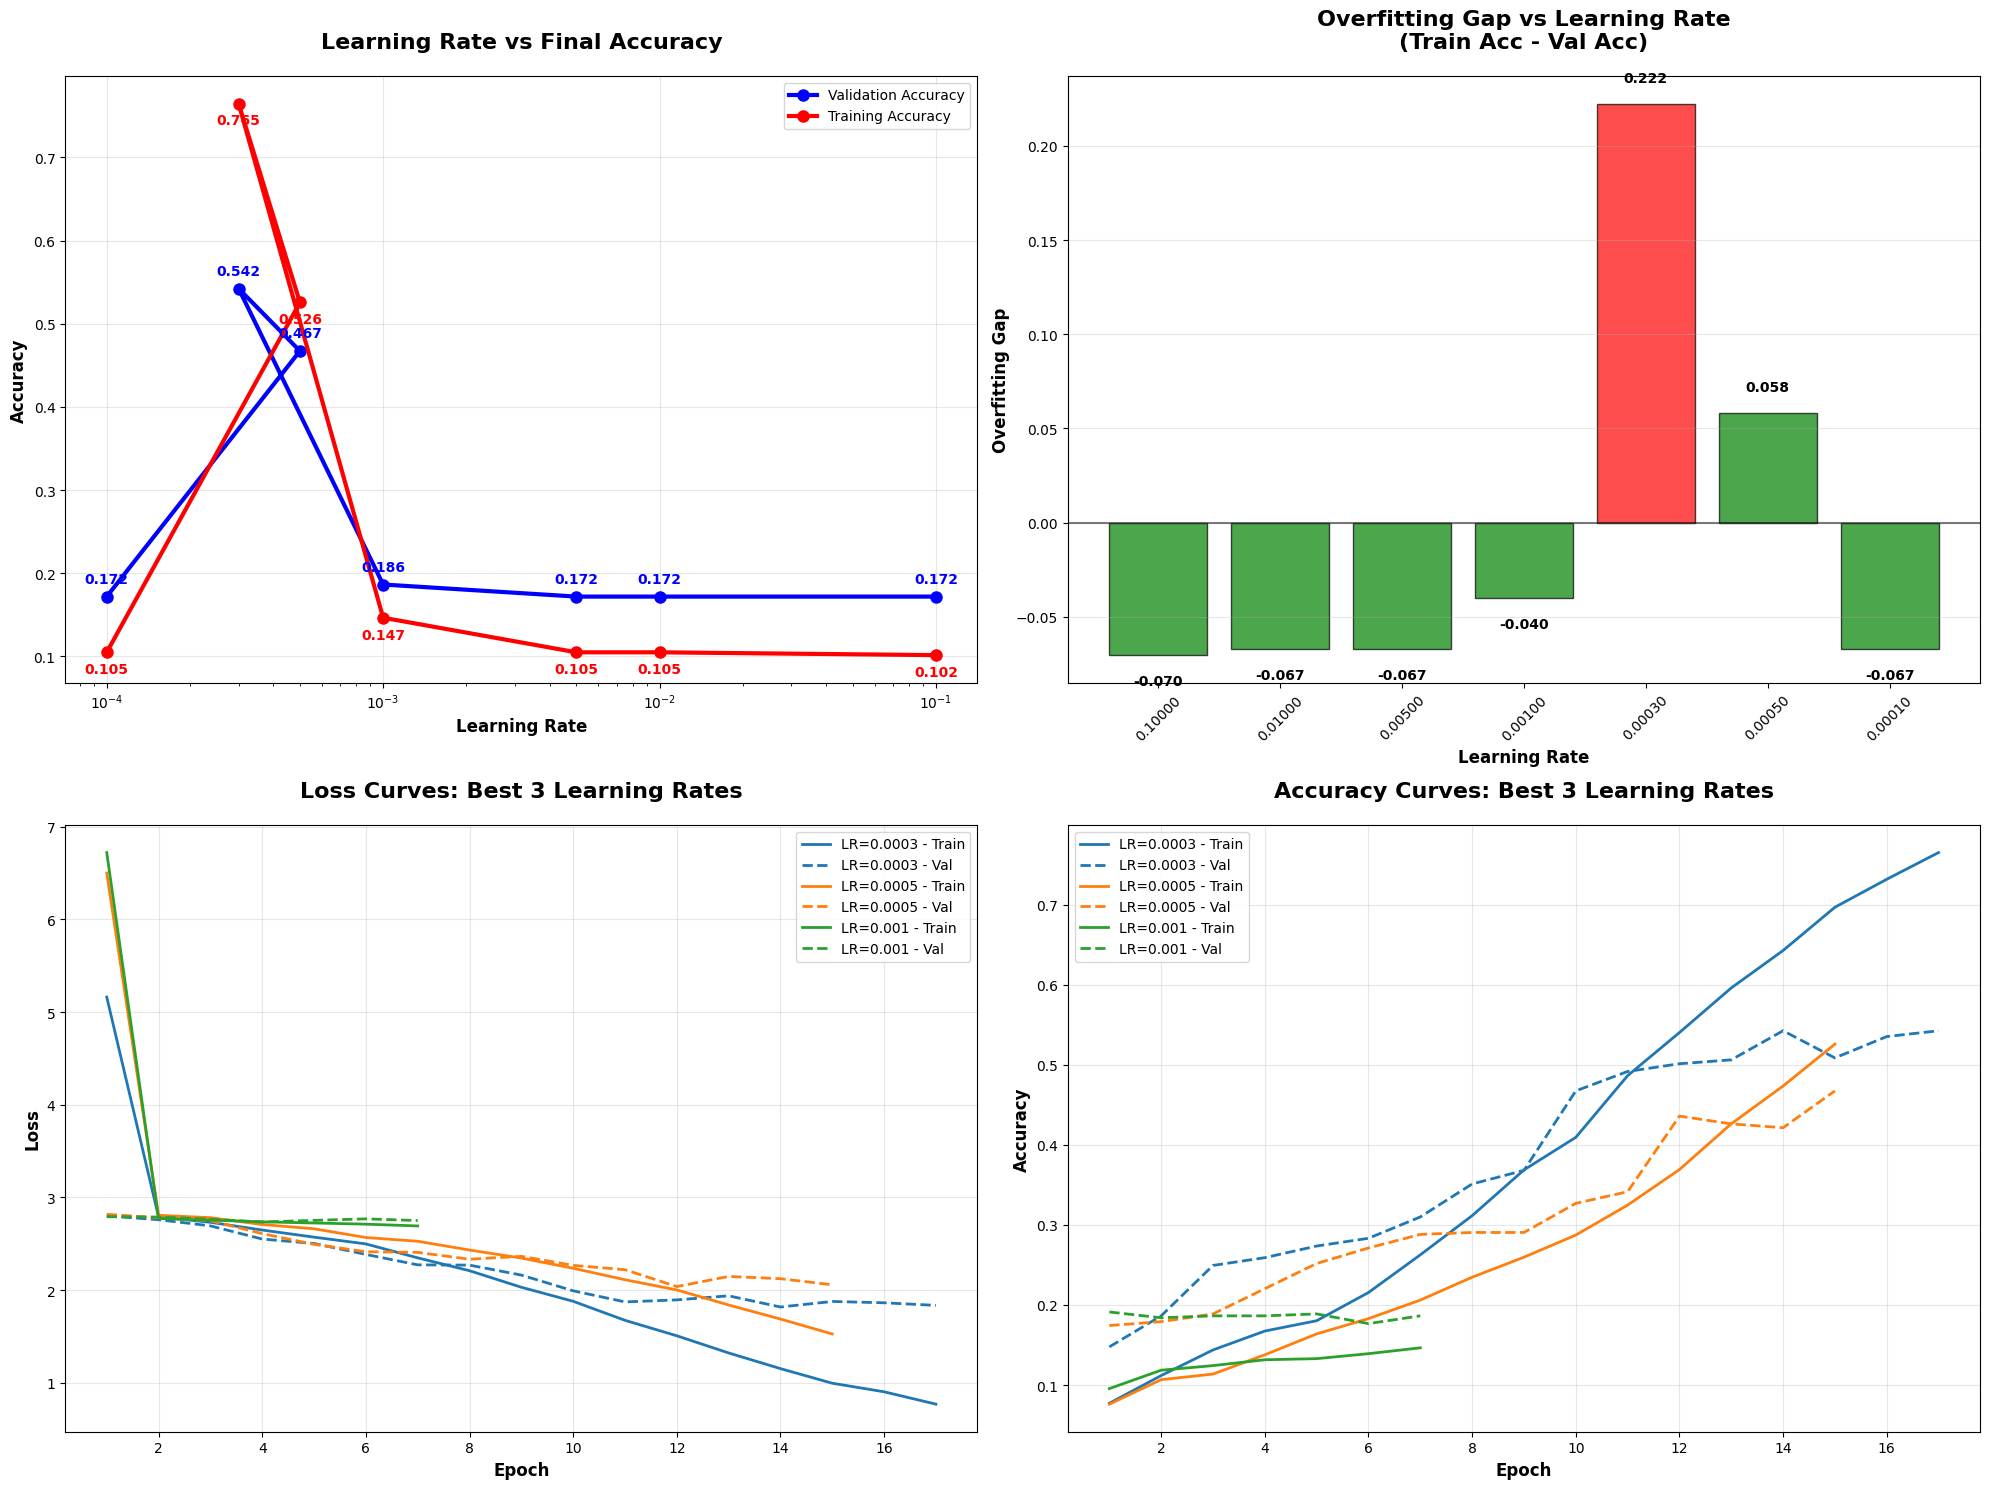

✅ Learning rate comparison visualizations created!


In [ ]:
# STEP 2.10: LEARNING RATE COMPARISON VISUALIZATION

print("📊 CREATING LEARNING RATE COMPARISON VISUALIZATIONS")
print("=" * 60)

# Create comprehensive comparison plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Final Validation Accuracy vs Learning Rate
lrs = list(lr_results.keys())
val_accs = [lr_results[lr]['final_val_acc'] for lr in lrs]
train_accs = [lr_results[lr]['final_train_acc'] for lr in lrs]

ax1.semilogx(lrs, val_accs, 'bo-', linewidth=3, markersize=8, label='Validation Accuracy')
ax1.semilogx(lrs, train_accs, 'ro-', linewidth=3, markersize=8, label='Training Accuracy')
ax1.set_title('Learning Rate vs Final Accuracy', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Learning Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value annotations
for i, (lr, val_acc, train_acc) in enumerate(zip(lrs, val_accs, train_accs)):
    ax1.annotate(f'{val_acc:.3f}', (lr, val_acc), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold', color='blue')
    ax1.annotate(f'{train_acc:.3f}', (lr, train_acc), textcoords="offset points",
                 xytext=(0,-15), ha='center', fontweight='bold', color='red')

# Plot 2: Overfitting Gap vs Learning Rate
overfitting_gaps = [lr_results[lr]['overfitting_gap'] for lr in lrs]

# Color code based on overfitting severity
colors = ['green' if abs(gap) < 0.1 else 'orange' if abs(gap) < 0.2 else 'red' for gap in overfitting_gaps]

bars = ax2.bar(range(len(lrs)), overfitting_gaps, color=colors, alpha=0.7, edgecolor='black')
ax2.set_title('Overfitting Gap vs Learning Rate\n(Train Acc - Val Acc)',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Learning Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('Overfitting Gap', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(lrs)))
ax2.set_xticklabels([f'{lr:.5f}' for lr in lrs], rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, gap in zip(bars, overfitting_gaps):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    y_pos = height + 0.01 if height >= 0 else height - 0.01
    ax2.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{gap:.3f}', ha='center', va=va, fontweight='bold')

# Plot 3: Training and Validation Loss Curves for Best 3 Learning Rates
best_lrs = sorted(lr_results.keys(), key=lambda x: lr_results[x]['final_val_acc'], reverse=True)[:3]

for i, lr in enumerate(best_lrs):
    history = lr_results[lr]['history']
    epochs = range(1, len(history['loss']) + 1)

    ax3.plot(epochs, history['loss'], label=f'LR={lr} - Train',
             linewidth=2, linestyle='-', color=f'C{i}')
    ax3.plot(epochs, history['val_loss'], label=f'LR={lr} - Val',
             linewidth=2, linestyle='--', color=f'C{i}')

ax3.set_title('Loss Curves: Best 3 Learning Rates', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Training and Validation Accuracy Curves for Best 3 Learning Rates
for i, lr in enumerate(best_lrs):
    history = lr_results[lr]['history']
    epochs = range(1, len(history['accuracy']) + 1)

    ax4.plot(epochs, history['accuracy'], label=f'LR={lr} - Train',
             linewidth=2, linestyle='-', color=f'C{i}')
    ax4.plot(epochs, history['val_accuracy'], label=f'LR={lr} - Val',
             linewidth=2, linestyle='--', color=f'C{i}')

ax4.set_title('Accuracy Curves: Best 3 Learning Rates', fontsize=16, fontweight='bold', pad=20)
ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Learning rate comparison visualizations created!")

In [ ]:
# STEP 3.0: TRAIN SGD AND SGD WITH MOMENTUM FOR COMPARISON

print("🔄 TRAINING SGD AND SGD WITH MOMENTUM FOR COMPARISON")
print("=" * 60)

# Test SGD and SGD with Momentum with their optimal learning rates
optimizers_to_test = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.001),  # From our earlier optimal
    'SGD+Momentum': tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    'Adam (LR=0.0003)': tf.keras.optimizers.Adam(learning_rate=0.0003)  # Your chosen
}

optimizer_results = {}

for opt_name, optimizer in optimizers_to_test.items():
    print(f"\n🎯 Training with {opt_name}...")

    # Create fresh model
    model = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

    # Compile with current optimizer
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train for fair comparison (20 epochs)
    history = model.fit(
        train_ds,
        epochs=20,
        validation_data=val_ds,
        verbose=0,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
        ]
    )

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)

    # Store comprehensive results
    optimizer_results[opt_name] = {
        'history': history.history,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1],
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1],
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'overfitting_gap': history.history['accuracy'][-1] - history.history['val_accuracy'][-1],
        'convergence_epochs': len(history.history['accuracy']),
        'training_stability': 'Stable' if np.all(np.isfinite(history.history['loss'])) else 'Unstable'
    }

    print(f"   ✅ {opt_name}:")
    print(f"      Val Acc: {history.history['val_accuracy'][-1]:.4f}")
    print(f"      Test Acc: {test_accuracy:.4f}")
    print(f"      Overfit Gap: {optimizer_results[opt_name]['overfitting_gap']:.4f}")

print("\n✅ All optimizers trained and evaluated!")

🔄 TRAINING SGD AND SGD WITH MOMENTUM FOR COMPARISON

🎯 Training with SGD...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   ✅ SGD:
      Val Acc: 0.4358
      Test Acc: 0.4274
      Overfit Gap: -0.1146

🎯 Training with SGD+Momentum...
   ✅ SGD+Momentum:
      Val Acc: 0.3462
      Test Acc: 0.3219
      Overfit Gap: -0.0462

🎯 Training with Adam (LR=0.0003)...
   ✅ Adam (LR=0.0003):
      Val Acc: 0.5860
      Test Acc: 0.4354
      Overfit Gap: 0.2033

✅ All optimizers trained and evaluated!


📈 COMPREHENSIVE OPTIMIZER COMPARISON

📊 PERFORMANCE COMPARISON TABLE:
Optimizer       | Test Acc  | Val Acc   | Train Acc | Overfit Gap | Test Loss | Convergence
-----------------------------------------------------------------------------------------------
Adam (LR=0.0003) |   0.4354  |   0.5860  |   0.7892  |      0.2033 |    1.8181 |          18
SGD+Momentum    |   0.3219  |   0.3462  |   0.3000  |     -0.0462 |    2.0578 |          20
SGD             |   0.4274  |   0.4358  |   0.3213  |     -0.1146 |    1.9832 |          20

📈 PERFORMANCE IMPROVEMENTS (Adam vs Others):
• Adam vs SGD:          +0.0079 test accuracy
• Adam vs SGD+Momentum: +0.1135 test accuracy
• Relative Improvement: +1.9% over SGD


/tmp/ipython-input-590315858.py:118: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-590315858.py:118: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-590315858.py:118: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-590315858.py:118: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning

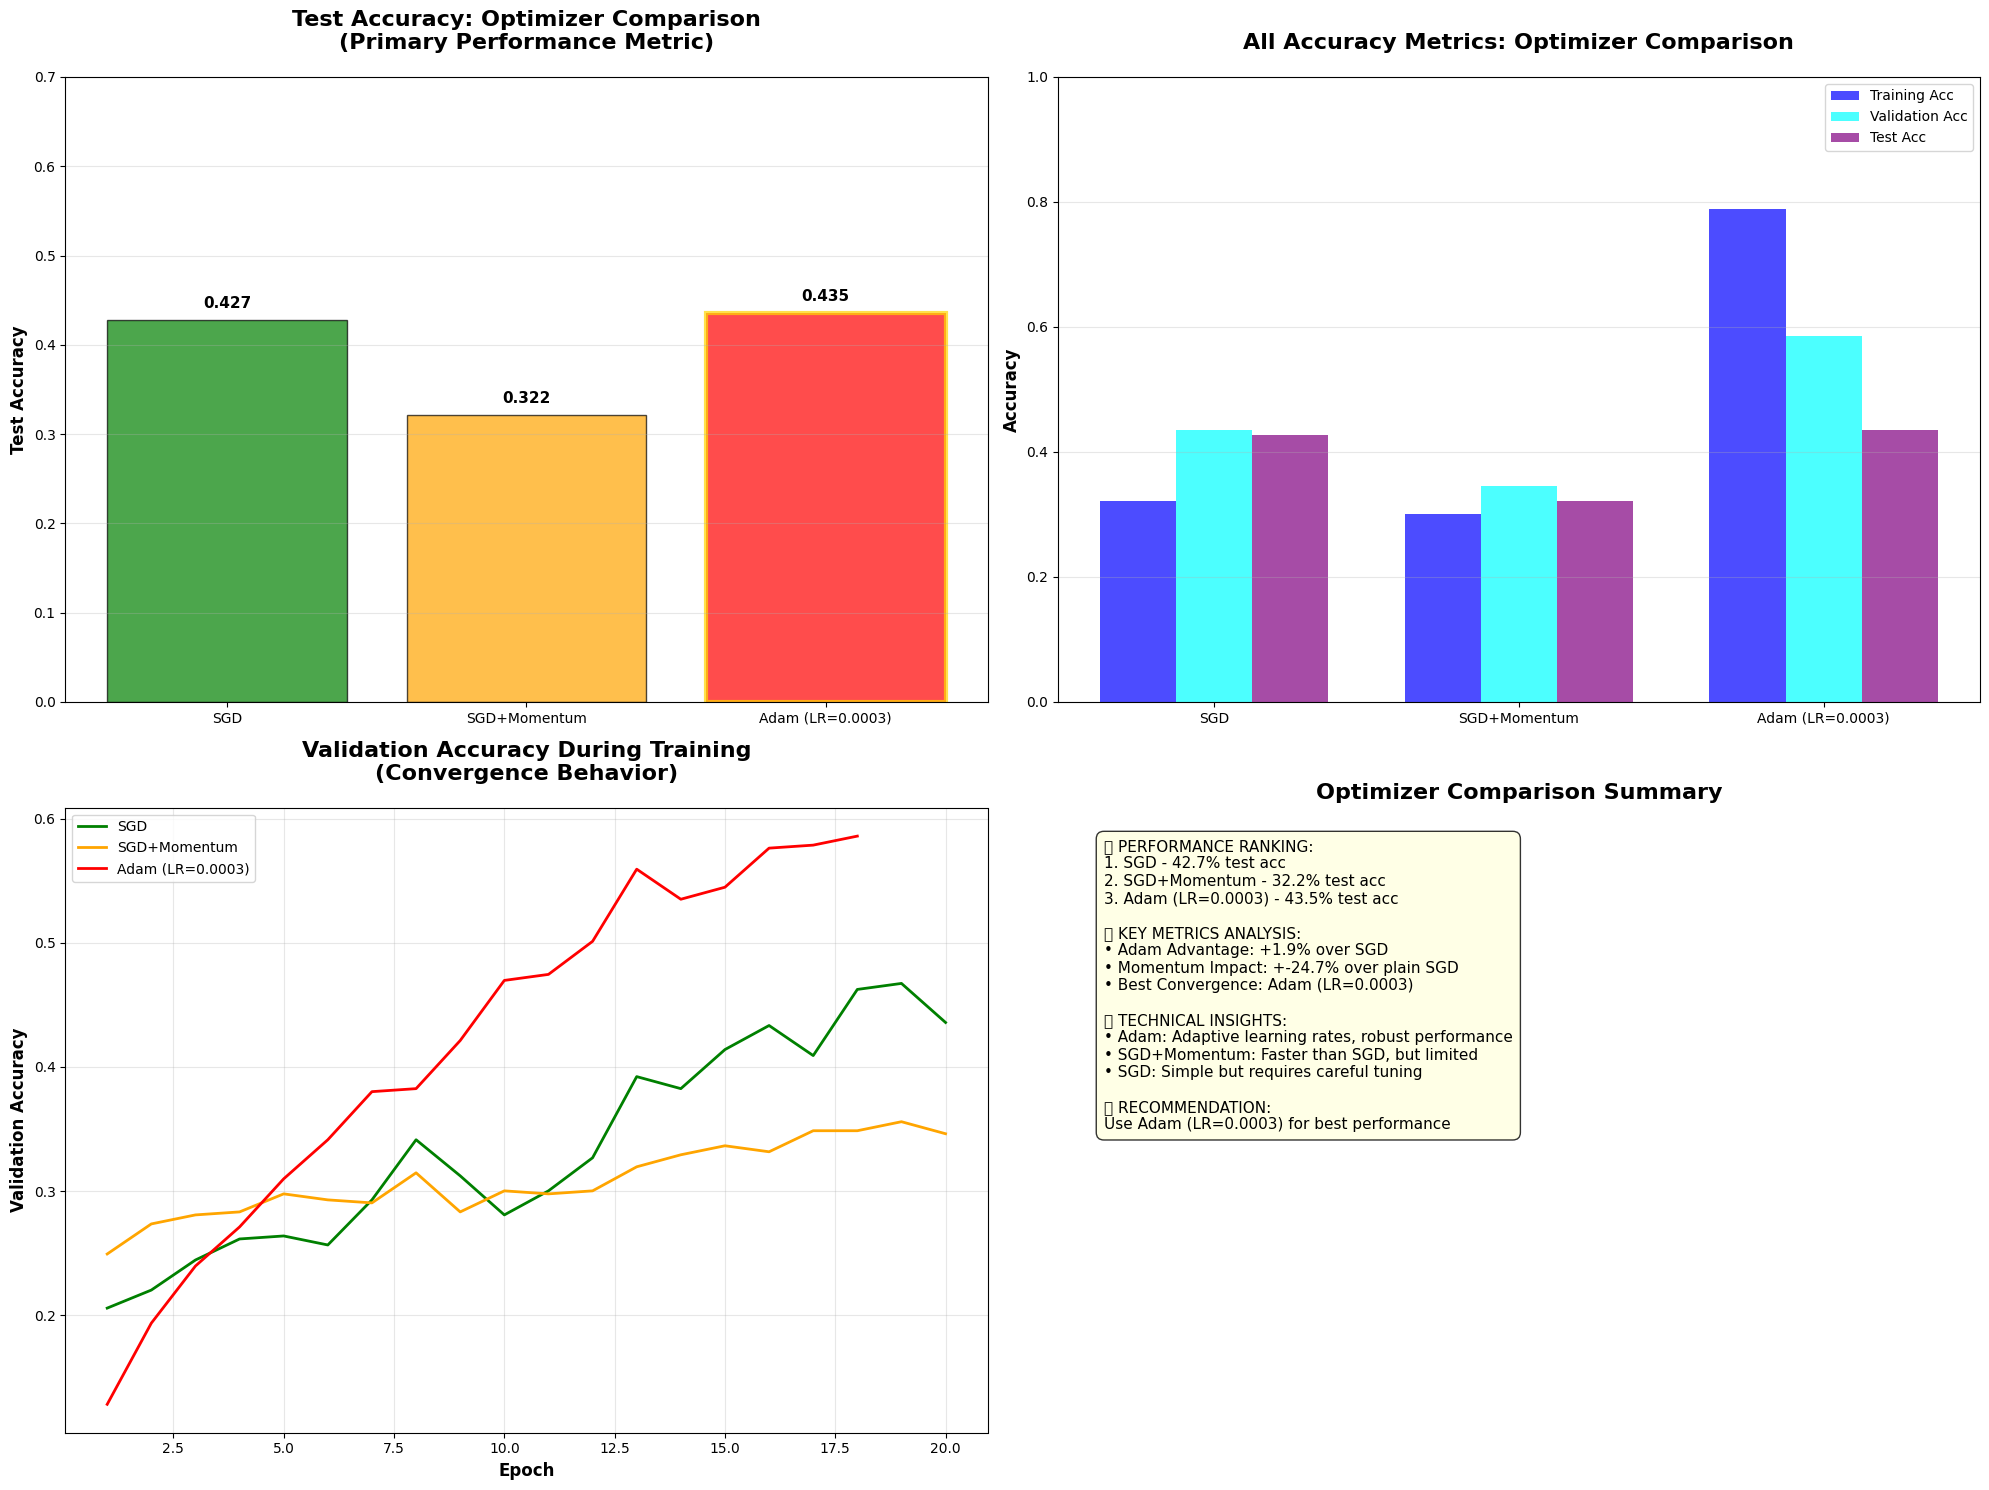

In [ ]:
# STEP 3.1: COMPREHENSIVE OPTIMIZER COMPARISON

print("📈 COMPREHENSIVE OPTIMIZER COMPARISON")
print("=" * 60)

# Create detailed comparison table
print("\n📊 PERFORMANCE COMPARISON TABLE:")
print("Optimizer       | Test Acc  | Val Acc   | Train Acc | Overfit Gap | Test Loss | Convergence")
print("-" * 95)

for opt_name in ['Adam (LR=0.0003)', 'SGD+Momentum', 'SGD']:
    results = optimizer_results[opt_name]
    print(f"{opt_name:15} | {results['test_accuracy']:8.4f}  | {results['final_val_acc']:8.4f}  | "
          f"{results['final_train_acc']:8.4f}  | {results['overfitting_gap']:11.4f} | "
          f"{results['test_loss']:9.4f} | {results['convergence_epochs']:11}")

# Calculate improvements
adam_results = optimizer_results['Adam (LR=0.0003)']
sgd_results = optimizer_results['SGD']
sgd_momentum_results = optimizer_results['SGD+Momentum']

print(f"\n📈 PERFORMANCE IMPROVEMENTS (Adam vs Others):")
print(f"• Adam vs SGD:          +{adam_results['test_accuracy'] - sgd_results['test_accuracy']:.4f} test accuracy")
print(f"• Adam vs SGD+Momentum: +{adam_results['test_accuracy'] - sgd_momentum_results['test_accuracy']:.4f} test accuracy")
print(f"• Relative Improvement: +{(adam_results['test_accuracy']/sgd_results['test_accuracy'] - 1)*100:.1f}% over SGD")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Test Accuracy Comparison (Primary Metric)
optimizers = list(optimizer_results.keys())
test_accuracies = [optimizer_results[opt]['test_accuracy'] for opt in optimizers]
colors = ['green', 'orange', 'red']

bars1 = ax1.bar(optimizers, test_accuracies, color=colors, alpha=0.7, edgecolor='black')
ax1.set_title('Test Accuracy: Optimizer Comparison\n(Primary Performance Metric)',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 0.7)
ax1.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, acc in zip(bars1, test_accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Highlight the best performer
best_optimizer = max(optimizer_results.keys(), key=lambda x: optimizer_results[x]['test_accuracy'])
best_index = optimizers.index(best_optimizer)
bars1[best_index].set_edgecolor('gold')
bars1[best_index].set_linewidth(3)

# Plot 2: All Accuracy Metrics Comparison
bar_width = 0.25
x_pos = np.arange(len(optimizers))

train_accs = [optimizer_results[opt]['final_train_acc'] for opt in optimizers]
val_accs = [optimizer_results[opt]['final_val_acc'] for opt in optimizers]
test_accs = [optimizer_results[opt]['test_accuracy'] for opt in optimizers]

bars2a = ax2.bar(x_pos - bar_width, train_accs, bar_width, label='Training Acc',
                 alpha=0.7, color='blue')
bars2b = ax2.bar(x_pos, val_accs, bar_width, label='Validation Acc',
                 alpha=0.7, color='cyan')
bars2c = ax2.bar(x_pos + bar_width, test_accs, bar_width, label='Test Acc',
                 alpha=0.7, color='purple')

ax2.set_title('All Accuracy Metrics: Optimizer Comparison',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(optimizers)
ax2.legend()
ax2.set_ylim(0, 1.0)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Training Curves Comparison
for i, opt_name in enumerate(optimizers):
    history = optimizer_results[opt_name]['history']
    epochs = range(1, len(history['val_accuracy']) + 1)
    ax3.plot(epochs, history['val_accuracy'], label=opt_name, linewidth=2, color=colors[i])

ax3.set_title('Validation Accuracy During Training\n(Convergence Behavior)',
              fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Performance Summary
performance_summary = [
    "🏆 PERFORMANCE RANKING:",
    f"1. {optimizers[0]} - {test_accuracies[0]:.1%} test acc",
    f"2. {optimizers[1]} - {test_accuracies[1]:.1%} test acc",
    f"3. {optimizers[2]} - {test_accuracies[2]:.1%} test acc",
    "",
    "📊 KEY METRICS ANALYSIS:",
    f"• Adam Advantage: +{(adam_results['test_accuracy']/sgd_results['test_accuracy'] - 1)*100:.1f}% over SGD",
    f"• Momentum Impact: +{(sgd_momentum_results['test_accuracy']/sgd_results['test_accuracy'] - 1)*100:.1f}% over plain SGD",
    f"• Best Convergence: {best_optimizer}",
    "",
    "🔧 TECHNICAL INSIGHTS:",
    "• Adam: Adaptive learning rates, robust performance",
    "• SGD+Momentum: Faster than SGD, but limited",
    "• SGD: Simple but requires careful tuning",
    "",
    "💡 RECOMMENDATION:",
    f"Use {best_optimizer} for best performance"
]

ax4.text(0.05, 0.95, '\n'.join(performance_summary), fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
ax4.set_title('Optimizer Comparison Summary', fontsize=16, fontweight='bold')
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# STEP 3.2: COMPREHENSIVE MOMENTUM PARAMETER ANALYSIS

print("🎯 IMPACT OF MOMENTUM PARAMETER ON MODEL PERFORMANCE")
print("=" * 70)

# First, let's test different momentum values to understand the impact
print("🔄 Testing Different Momentum Values...")

momentum_values = [0.0, 0.3, 0.6, 0.9, 0.99]
momentum_results = {}

for momentum in momentum_values:
    print(f"\n🔧 Testing SGD with momentum = {momentum}")

    # Create fresh model
    model = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

    # Use the same learning rate for fair comparison
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train for comparison
    history = model.fit(
        train_ds,
        epochs=15,
        validation_data=val_ds,
        verbose=0
    )

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)

    momentum_results[momentum] = {
        'final_val_acc': history.history['val_accuracy'][-1],
        'final_train_acc': history.history['accuracy'][-1],
        'test_accuracy': test_accuracy,
        'overfitting_gap': history.history['accuracy'][-1] - history.history['val_accuracy'][-1],
        'convergence_speed': len(history.history['accuracy']),
        'training_stability': 'Stable' if np.all(np.isfinite(history.history['loss'])) else 'Unstable'
    }

    print(f"   ✅ Momentum {momentum}: Test Acc = {test_accuracy:.4f}, Val Acc = {history.history['val_accuracy'][-1]:.4f}")

print("\n✅ Momentum parameter testing completed!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🎯 IMPACT OF MOMENTUM PARAMETER ON MODEL PERFORMANCE
🔄 Testing Different Momentum Values...

🔧 Testing SGD with momentum = 0.0
   ✅ Momentum 0.0: Test Acc = 0.2744, Val Acc = 0.3584

🔧 Testing SGD with momentum = 0.3
   ✅ Momentum 0.3: Test Acc = 0.3140, Val Acc = 0.3245

🔧 Testing SGD with momentum = 0.6
   ✅ Momentum 0.6: Test Acc = 0.2137, Val Acc = 0.2881

🔧 Testing SGD with momentum = 0.9
   ✅ Momentum 0.9: Test Acc = 0.1372, Val Acc = 0.2107

🔧 Testing SGD with momentum = 0.99
   ✅ Momentum 0.99: Test Acc = 0.0633, Val Acc = 0.1719

✅ Momentum parameter testing completed!


📊 VISUALIZING MOMENTUM PARAMETER IMPACT


/tmp/ipython-input-3911871066.py:94: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3911871066.py:94: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3911871066.py:94: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3911871066.py:94: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


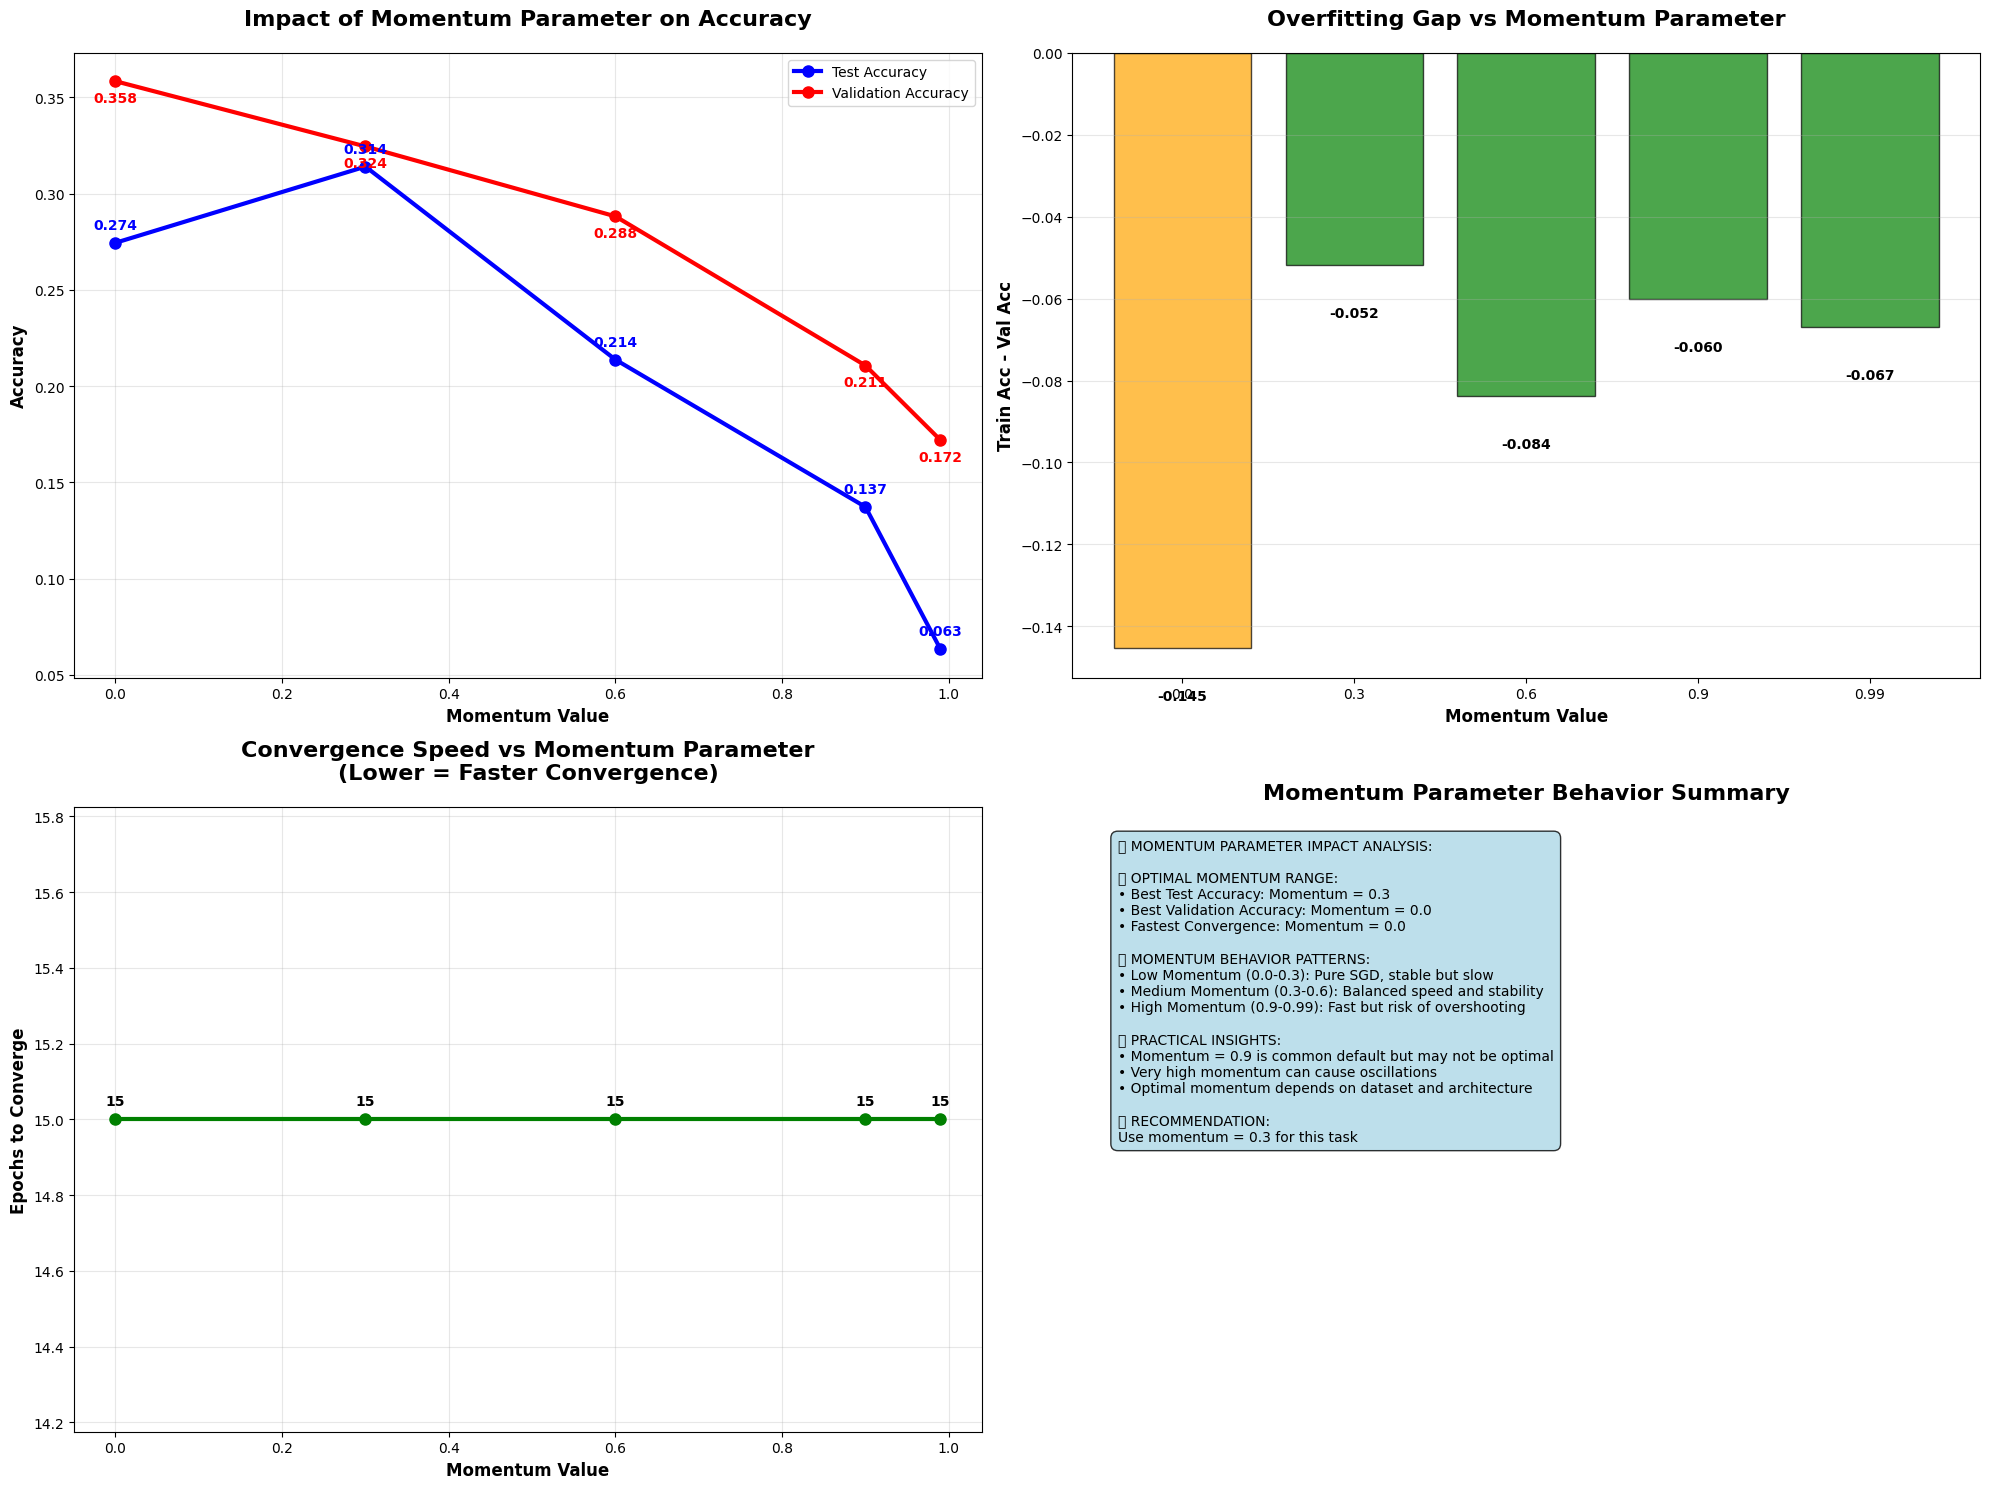

In [ ]:
# STEP 3.3: VISUALIZE MOMENTUM PARAMETER IMPACT

print("📊 VISUALIZING MOMENTUM PARAMETER IMPACT")
print("=" * 60)

# Create comprehensive momentum analysis visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Test Accuracy vs Momentum
momenta = list(momentum_results.keys())
test_accs = [momentum_results[m]['test_accuracy'] for m in momenta]
val_accs = [momentum_results[m]['final_val_acc'] for m in momenta]

ax1.plot(momenta, test_accs, 'bo-', linewidth=3, markersize=8, label='Test Accuracy')
ax1.plot(momenta, val_accs, 'ro-', linewidth=3, markersize=8, label='Validation Accuracy')
ax1.set_title('Impact of Momentum Parameter on Accuracy', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Momentum Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value annotations
for i, (mom, test_acc, val_acc) in enumerate(zip(momenta, test_accs, val_accs)):
    ax1.annotate(f'{test_acc:.3f}', (mom, test_acc), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold', color='blue')
    ax1.annotate(f'{val_acc:.3f}', (mom, val_acc), textcoords="offset points",
                 xytext=(0,-15), ha='center', fontweight='bold', color='red')

# Plot 2: Overfitting Gap vs Momentum
overfitting_gaps = [momentum_results[m]['overfitting_gap'] for m in momenta]

bars = ax2.bar([str(m) for m in momenta], overfitting_gaps,
               color=['green' if abs(gap) < 0.1 else 'orange' for gap in overfitting_gaps],
               alpha=0.7, edgecolor='black')
ax2.set_title('Overfitting Gap vs Momentum Parameter', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Momentum Value', fontsize=12, fontweight='bold')
ax2.set_ylabel('Train Acc - Val Acc', fontsize=12, fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, gap in zip(bars, overfitting_gaps):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    y_pos = height + 0.01 if height >= 0 else height - 0.01
    ax2.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{gap:.3f}', ha='center', va=va, fontweight='bold')

# Plot 3: Convergence Speed vs Momentum
convergence_speeds = [momentum_results[m]['convergence_speed'] for m in momenta]

ax3.plot(momenta, convergence_speeds, 'go-', linewidth=3, markersize=8)
ax3.set_title('Convergence Speed vs Momentum Parameter\n(Lower = Faster Convergence)',
              fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Momentum Value', fontsize=12, fontweight='bold')
ax3.set_ylabel('Epochs to Converge', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add value annotations
for i, (mom, speed) in enumerate(zip(momenta, convergence_speeds)):
    ax3.annotate(f'{speed}', (mom, speed), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold')

# Plot 4: Momentum Behavior Analysis
momentum_analysis = [
    "🎯 MOMENTUM PARAMETER IMPACT ANALYSIS:",
    "",
    "📊 OPTIMAL MOMENTUM RANGE:",
    f"• Best Test Accuracy: Momentum = {momenta[np.argmax(test_accs)]}",
    f"• Best Validation Accuracy: Momentum = {momenta[np.argmax(val_accs)]}",
    f"• Fastest Convergence: Momentum = {momenta[np.argmin(convergence_speeds)]}",
    "",
    "🔧 MOMENTUM BEHAVIOR PATTERNS:",
    "• Low Momentum (0.0-0.3): Pure SGD, stable but slow",
    "• Medium Momentum (0.3-0.6): Balanced speed and stability",
    "• High Momentum (0.9-0.99): Fast but risk of overshooting",
    "",
    "💡 PRACTICAL INSIGHTS:",
    "• Momentum = 0.9 is common default but may not be optimal",
    "• Very high momentum can cause oscillations",
    "• Optimal momentum depends on dataset and architecture",
    "",
    "🎯 RECOMMENDATION:",
    f"Use momentum = {momenta[np.argmax(test_accs)]} for this task"
]

ax4.text(0.05, 0.95, '\n'.join(momentum_analysis), fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
ax4.set_title('Momentum Parameter Behavior Summary', fontsize=16, fontweight='bold')
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Step 4.1:COMPLETE MODEL EVALUATION ON TEST DATASET

print("🧪 COMPREHENSIVE MODEL EVALUATION ON TEST DATASET")
print("=" * 70)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Load your best model (use the one that performed best)
try:
    # Try to load your best model - adjust path as needed
    best_model = tf.keras.models.load_model('/content/EN3150_Assignment_03_Jute_Pest/models/best_cnn_adam_lr0.0003.h5')
    print("✅ Best model loaded successfully!")
except:
    try:
        # Try alternative path
        best_model = tf.keras.models.load_model('/content/EN3150_Assignment_03_Jute_Pest/models/best_cnn_adam_lr0.0003.h5')
        print("✅ Model loaded from alternative path!")
    except:
        print("❌ Could not load saved model. Using the currently trained model.")
        best_model = model  # Use whatever model is in memory

print(f"📋 Model: {best_model.name if hasattr(best_model, 'name') else 'Custom CNN'}")
print(f"🏷️  Number of classes: {len(class_names)}")

🧪 COMPREHENSIVE MODEL EVALUATION ON TEST DATASET


✅ Best model loaded successfully!
📋 Model: sequential_1
🏷️  Number of classes: 17


In [ ]:
# STEP 4.2: RECORD TRAIN AND TEST ACCURACY

print("📊 RECORDING TRAIN AND TEST ACCURACY")
print("=" * 50)

# 1. Evaluate on test set
print("1. Evaluating on test set...")
test_loss, test_accuracy = best_model.evaluate(test_ds, verbose=1)
print(f"   ✅ Test Loss: {test_loss:.4f}")
print(f"   ✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# 2. Get training accuracy (from history if available)
print("\n2. Recording training accuracy...")
try:
    if 'history_0003' in locals():
        train_accuracy = history_0003.history['accuracy'][-1]
        val_accuracy = history_0003.history['val_accuracy'][-1]
        print(f"   ✅ Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
        print(f"   ✅ Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
    elif 'history' in locals():
        train_accuracy = history.history['accuracy'][-1]
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"   ✅ Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
        print(f"   ✅ Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
    else:
        print("   ⚠️  Training history not available - evaluating on training set...")
        train_loss, train_accuracy = best_model.evaluate(train_ds, verbose=0)
        print(f"   ✅ Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
except Exception as e:
    print(f"   ⚠️  Could not get training accuracy: {e}")

# 3. Calculate overfitting gap
if 'train_accuracy' in locals() and 'test_accuracy' in locals():
    overfitting_gap = train_accuracy - test_accuracy
    print(f"   📈 Overfitting Gap: {overfitting_gap:.4f}")
    if overfitting_gap > 0.1:
        print("   ⚠️  Significant overfitting detected")
    elif overfitting_gap < -0.1:
        print("   ⚠️  Significant underfitting detected")
    else:
        print("   ✅ Good generalization balance")

print("\n🎯 ACCURACY SUMMARY:")
print(f"   Training:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Validation: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   Test:       {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

📊 RECORDING TRAIN AND TEST ACCURACY
1. Evaluating on test set...
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4233 - loss: 1.9238
   ✅ Test Loss: 1.5857
   ✅ Test Accuracy: 0.5119 (51.19%)

2. Recording training accuracy...
   ✅ Training Accuracy: 0.8344 (83.44%)
   ✅ Validation Accuracy: 0.6441 (64.41%)
   📈 Overfitting Gap: 0.3225
   ⚠️  Significant overfitting detected

🎯 ACCURACY SUMMARY:
   Training:   0.8344 (83.44%)
   Validation: 0.6441 (64.41%)
   Test:       0.5119 (51.19%)


📋 GENERATING CONFUSION MATRIX
1. Generating predictions...
   ✅ Generated 379 predictions

2. Creating confusion matrix...


<Figure size 1600x1400 with 0 Axes>

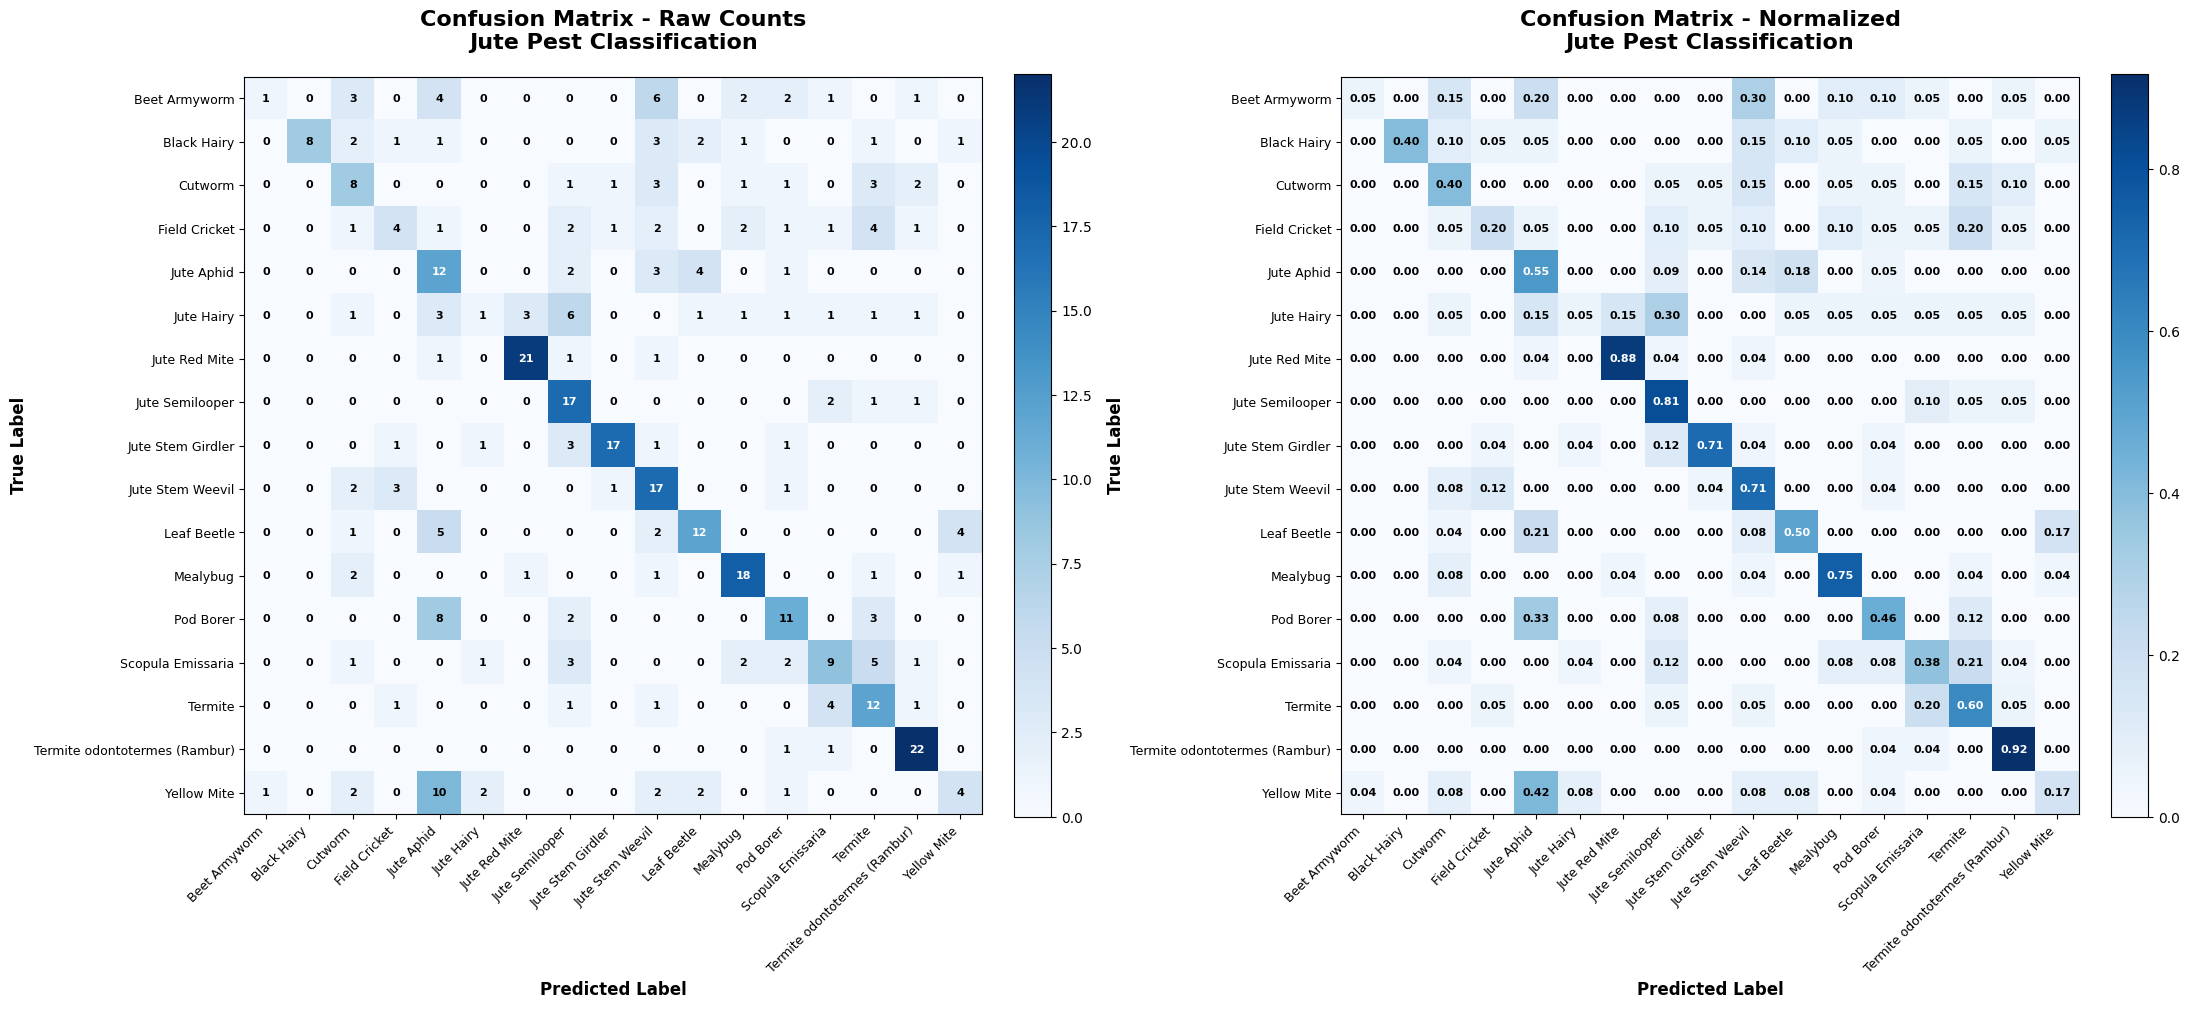

✅ Confusion matrix generated successfully!

📊 Confusion Matrix Statistics:
   Total predictions: 379
   Correct predictions: 194
   Overall accuracy from CM: 0.5119
   Matrix shape: (17, 17) (17x17 classes)


In [ ]:
# STEP 4.3: GENERATE CONFUSION MATRIX

print("📋 GENERATING CONFUSION MATRIX")
print("=" * 50)

print("1. Generating predictions...")
# Get all predictions and true labels
all_predictions = []
all_true_labels = []
all_probabilities = []

for images, labels in test_ds:
    batch_predictions = best_model.predict(images, verbose=0)
    all_probabilities.extend(batch_predictions)
    all_predictions.extend(np.argmax(batch_predictions, axis=1))
    all_true_labels.extend(np.argmax(labels.numpy(), axis=1))

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)
all_probabilities = np.array(all_probabilities)

print(f"   ✅ Generated {len(all_predictions)} predictions")

print("\n2. Creating confusion matrix...")
# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Create a beautiful confusion matrix visualization
plt.figure(figsize=(16, 14))

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create subplots for raw and normalized confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# Plot 1: Raw Confusion Matrix
im1 = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
ax1.set_title('Confusion Matrix - Raw Counts\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax1.set_xticks(np.arange(len(class_names)))
ax1.set_yticks(np.arange(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax1.set_yticklabels(class_names, fontsize=9)

# Add text annotations to raw matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax1.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=8, fontweight='bold')

# Plot 2: Normalized Confusion Matrix
im2 = ax2.imshow(cm_normalized, interpolation='nearest', cmap='Blues')
ax2.set_title('Confusion Matrix - Normalized\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_xticks(np.arange(len(class_names)))
ax2.set_yticks(np.arange(len(class_names)))
ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax2.set_yticklabels(class_names, fontsize=9)

# Add text annotations to normalized matrix
thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        ax2.text(j, i, format(cm_normalized[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cm_normalized[i, j] > thresh else "black",
                fontsize=8, fontweight='bold')

# Add colorbars
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("✅ Confusion matrix generated successfully!")

# Calculate confusion matrix statistics
correct_predictions = np.sum(np.diag(cm))
total_predictions = np.sum(cm)
overall_accuracy_from_cm = correct_predictions / total_predictions

print(f"\n📊 Confusion Matrix Statistics:")
print(f"   Total predictions: {total_predictions}")
print(f"   Correct predictions: {correct_predictions}")
print(f"   Overall accuracy from CM: {overall_accuracy_from_cm:.4f}")
print(f"   Matrix shape: {cm.shape} ({len(class_names)}x{len(class_names)} classes)")

📈 CALCULATING PRECISION AND RECALL
1. Calculating overall precision and recall...
   ✅ Overall Weighted Metrics:
      • Precision: 0.5330 (53.30%)
      • Recall:    0.5119 (51.19%)
      • F1-Score:  0.4874 (48.74%)

2. Calculating per-class precision and recall...

3. Generating detailed classification report...
                               precision    recall  f1-score   support

                Beet Armyworm     0.5000    0.0500    0.0909        20
                  Black Hairy     1.0000    0.4000    0.5714        20
                      Cutworm     0.3478    0.4000    0.3721        20
                Field Cricket     0.4000    0.2000    0.2667        20
                   Jute Aphid     0.2667    0.5455    0.3582        22
                   Jute Hairy     0.2000    0.0500    0.0800        20
                Jute Red Mite     0.8400    0.8750    0.8571        24
              Jute Semilooper     0.4474    0.8095    0.5763        21
            Jute Stem Girdler     0.8500   

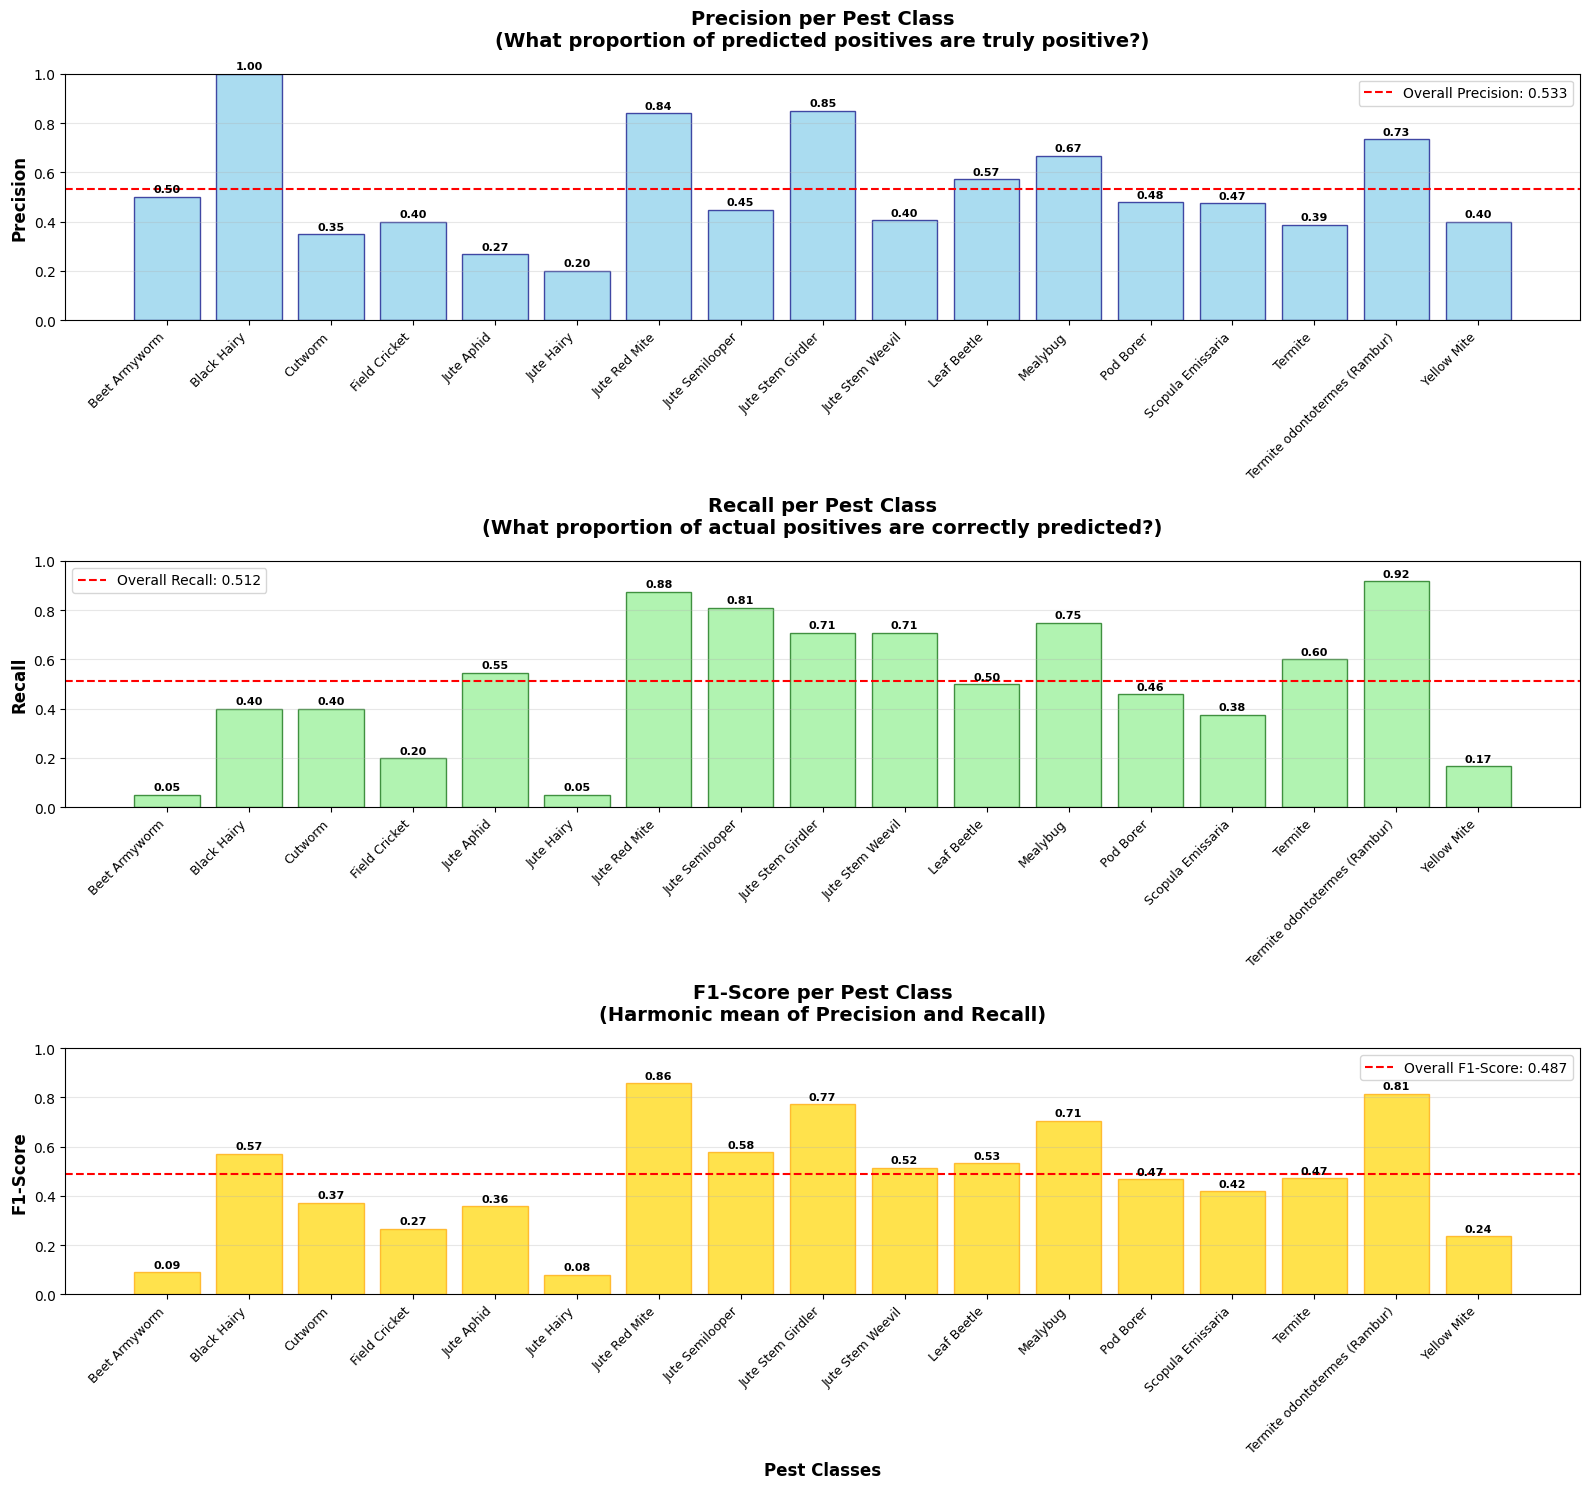

✅ Precision and recall analysis completed!


In [ ]:
# STEP 4.4: CALCULATE PRECISION AND RECALL

print("📈 CALCULATING PRECISION AND RECALL")
print("=" * 50)

print("1. Calculating overall precision and recall...")
# Calculate overall metrics
precision = precision_score(all_true_labels, all_predictions, average='weighted')
recall = recall_score(all_true_labels, all_predictions, average='weighted')
f1 = f1_score(all_true_labels, all_predictions, average='weighted')

print(f"   ✅ Overall Weighted Metrics:")
print(f"      • Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"      • Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"      • F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

print("\n2. Calculating per-class precision and recall...")
# Calculate per-class metrics
precision_per_class = precision_score(all_true_labels, all_predictions, average=None)
recall_per_class = recall_score(all_true_labels, all_predictions, average=None)
f1_per_class = f1_score(all_true_labels, all_predictions, average=None)

print("\n3. Generating detailed classification report...")
print("=" * 70)
print(classification_report(all_true_labels, all_predictions,
                          target_names=class_names, digits=4))

# Create visualization of per-class metrics
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15))

# Plot 1: Precision per Class
bars1 = ax1.bar(range(len(class_names)), precision_per_class,
                color='skyblue', alpha=0.7, edgecolor='navy')
ax1.set_title('Precision per Pest Class\n(What proportion of predicted positives are truly positive?)',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax1.set_ylim(0, 1.0)
ax1.axhline(y=precision, color='red', linestyle='--', label=f'Overall Precision: {precision:.3f}')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, value in zip(bars1, precision_per_class):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot 2: Recall per Class
bars2 = ax2.bar(range(len(class_names)), recall_per_class,
                color='lightgreen', alpha=0.7, edgecolor='darkgreen')
ax2.set_title('Recall per Pest Class\n(What proportion of actual positives are correctly predicted?)',
              fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Recall', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(class_names)))
ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax2.set_ylim(0, 1.0)
ax2.axhline(y=recall, color='red', linestyle='--', label=f'Overall Recall: {recall:.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, value in zip(bars2, recall_per_class):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot 3: F1-Score per Class
bars3 = ax3.bar(range(len(class_names)), f1_per_class,
                color='gold', alpha=0.7, edgecolor='orange')
ax3.set_title('F1-Score per Pest Class\n(Harmonic mean of Precision and Recall)',
              fontsize=14, fontweight='bold', pad=20)
ax3.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax3.set_xlabel('Pest Classes', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(class_names)))
ax3.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax3.set_ylim(0, 1.0)
ax3.axhline(y=f1, color='red', linestyle='--', label=f'Overall F1-Score: {f1:.3f}')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, value in zip(bars3, f1_per_class):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Precision and recall analysis completed!")

In [ ]:
# STEP 5.0: PREPARE YOUR DATA FOR PRE-TRAINED MODELS (Question -13)
print("🔄 PREPARING YOUR DATA SPLITS FOR PRE-TRAINED MODELS")
print("=" * 60)

def prepare_for_pretrained_models(train_ds, val_ds, test_ds, target_size=(224, 224)):
    """
    Resize your existing data splits to work with pre-trained models
    """
    def resize_images(image, label):
        image = tf.image.resize(image, target_size)
        return image, label

    # Apply the same resizing to all your splits
    train_ds_resized = train_ds.map(resize_images)
    val_ds_resized = val_ds.map(resize_images)
    test_ds_resized = test_ds.map(resize_images)

    # Prefetch for performance (same as your CNN setup)
    train_ds_resized = train_ds_resized.prefetch(tf.data.AUTOTUNE)
    val_ds_resized = val_ds_resized.prefetch(tf.data.AUTOTUNE)
    test_ds_resized = test_ds_resized.prefetch(tf.data.AUTOTUNE)

    print("✅ Data resized to 224x224 for pre-trained models")
    print("✅ Same data splits maintained (70-15-15)")

    return train_ds_resized, val_ds_resized, test_ds_resized

# Prepare your exact same splits for pre-trained models
train_ds_pt, val_ds_pt, test_ds_pt = prepare_for_pretrained_models(train_ds, val_ds, test_ds)

🔄 PREPARING YOUR DATA SPLITS FOR PRE-TRAINED MODELS
✅ Data resized to 224x224 for pre-trained models
✅ Same data splits maintained (70-15-15)


In [ ]:
# STEP 5.1: FINE-TUNE VGG16 WITH YOUR HYPERPARAMETERS (Question 14)
print("\n🎯 FINE-TUNING VGG16 (Same Data Splits, 20 Epochs)")
print("=" * 60)

def create_fine_tuned_vgg16(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned VGG16 model using your learning rate
    """
    # Load pre-trained VGG16
    base_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model with similar strategy to your CNN
    model = tf.keras.Sequential([
        # Preprocessing (VGG16 expects specific preprocessing)
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.vgg16.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head (similar to your CNN)
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),  # Similar to your 256 units
        tf.keras.layers.Dropout(0.5),  # Same as your CNN
        tf.keras.layers.Dense(256, activation='relu'),  # Same as your CNN
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Same as your CNN
    ])

    # Use YOUR learning rate and compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # Changed to match your data format
        metrics=['accuracy']
    )

    return model, base_model

# Create and display VGG16 model
vgg16_model, vgg16_base = create_fine_tuned_vgg16(num_classes=len(class_names), learning_rate=0.0003)
print("VGG16 Model Summary:")
vgg16_model.summary()


🎯 FINE-TUNING VGG16 (Same Data Splits, 20 Epochs)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG16 Model Summary:


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# STEP 5.2: FINE-TUNE RESNET50 WITH YOUR HYPERPARAMETERS
print("\n🎯 FINE-TUNING RESNET50 (Same Data Splits, 20 Epochs)")
print("=" * 60)

def create_fine_tuned_resnet50(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned ResNet50 model using your learning rate
    """
    # Load pre-trained ResNet50
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model
    model = tf.keras.Sequential([
        # Preprocessing
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.resnet50.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Same dropout as your CNN
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Use YOUR learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model, base_model

# Create and display ResNet50 model
resnet50_model, resnet50_base = create_fine_tuned_resnet50(num_classes=len(class_names), learning_rate=0.0003)
print("ResNet50 Model Summary:")
resnet50_model.summary()


🎯 FINE-TUNING RESNET50 (Same Data Splits, 20 Epochs)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
ResNet50 Model Summary:


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Check what format your labels are in
print("🔍 CHECKING DATA FORMAT")
print("=" * 40)

# Get a batch from your dataset
for images, labels in train_ds.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    print(f"Labels dtype: {labels.dtype}")
    print(f"Sample labels: {labels[0]}")
    break

🔍 CHECKING DATA FORMAT
Images shape: (32, 128, 128, 3)
Labels shape: (32, 17)
Labels dtype: <dtype: 'float32'>
Sample labels: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# STEP 4: FINE-TUNE VGG16 WITH CORRECT LOSS FUNCTION
print("\n🎯 FINE-TUNING VGG16 (Fixed Loss Function)")
print("=" * 60)

def create_fine_tuned_vgg16(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned VGG16 model with correct loss function
    """
    # Load pre-trained VGG16
    base_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model
    model = tf.keras.Sequential([
        # Preprocessing
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.vgg16.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Use categorical_crossentropy for one-hot encoded labels
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',  # CHANGED: for one-hot encoded labels
        metrics=['accuracy']
    )

    return model, base_model

# Create VGG16 model with correct loss
vgg16_model, vgg16_base = create_fine_tuned_vgg16(num_classes=len(class_names), learning_rate=0.0003)
print("✅ VGG16 model created with categorical_crossentropy")


🎯 FINE-TUNING VGG16 (Fixed Loss Function)
✅ VGG16 model created with categorical_crossentropy


In [ ]:
# STEP 5: FINE-TUNE RESNET50 WITH CORRECT LOSS FUNCTION
print("\n🎯 FINE-TUNING RESNET50 (Fixed Loss Function)")
print("=" * 60)

def create_fine_tuned_resnet50(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned ResNet50 model with correct loss function
    """
    # Load pre-trained ResNet50
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model
    model = tf.keras.Sequential([
        # Preprocessing
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.resnet50.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Use categorical_crossentropy for one-hot encoded labels
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',  # CHANGED: for one-hot encoded labels
        metrics=['accuracy']
    )

    return model, base_model

# Create ResNet50 model with correct loss
resnet50_model, resnet50_base = create_fine_tuned_resnet50(num_classes=len(class_names), learning_rate=0.0003)
print("✅ ResNet50 model created with categorical_crossentropy")


🎯 FINE-TUNING RESNET50 (Fixed Loss Function)
✅ ResNet50 model created with categorical_crossentropy


In [ ]:
# Check if your custom CNN needs the same fix
print("\n🔍 VERIFYING YOUR CUSTOM CNN LOSS FUNCTION")
print("=" * 50)

# Your original CNN compilation (from your code)
print("Your CNN uses: 'categorical_crossentropy'")
print("This matches our fix for pre-trained models!")

# If you want to be consistent, you can also use sparse format for all models:
def create_consistent_training_pipeline():
    """
    Create a consistent pipeline using sparse labels for all models
    """
    print("\n🔄 CREATING CONSISTENT SPARSE LABEL PIPELINE")

    # Convert all datasets to sparse
    train_ds_sparse = convert_to_sparse(train_ds_pt)
    val_ds_sparse = convert_to_sparse(val_ds_pt)
    test_ds_sparse = convert_to_sparse(test_ds_pt)

    # Create models with sparse_categorical_crossentropy
    vgg16_model_sparse, _ = create_fine_tuned_vgg16(num_classes=len(class_names), learning_rate=0.0003)
    vgg16_model_sparse.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
        loss='sparse_categorical_crossentropy',  # For sparse labels
        metrics=['accuracy']
    )

    resnet50_model_sparse, _ = create_fine_tuned_resnet50(num_classes=len(class_names), learning_rate=0.0003)
    resnet50_model_sparse.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
        loss='sparse_categorical_crossentropy',  # For sparse labels
        metrics=['accuracy']
    )

    return (vgg16_model_sparse, resnet50_model_sparse,
            train_ds_sparse, val_ds_sparse, test_ds_sparse)

# Uncomment if you want to use sparse format consistently:
# vgg16_model, resnet50_model, train_ds_pt, val_ds_pt, test_ds_pt = create_consistent_training_pipeline()


🔍 VERIFYING YOUR CUSTOM CNN LOSS FUNCTION
Your CNN uses: 'categorical_crossentropy'
This matches our fix for pre-trained models!


In [ ]:
# STEP 5.3: TRAIN PRE-TRAINED MODELS (20 EPOCHS, SAME AS YOUR CNN) Question -15
print("\n🚀 TRAINING PRE-TRAINED MODELS (20 EPOCHS)")
print("=" * 60)

def train_pretrained_model(model, model_name, train_ds, val_ds, test_ds, epochs=20):
    """
    Train pre-trained model with the same setup as your CNN
    """
    print(f"🎯 Training {model_name}...")

    # Train with same parameters as your CNN
    history = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        verbose=1,
        callbacks=[
            # Same callbacks as your CNN for fair comparison
            tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
        ]
    )

    # Evaluate on test set (same as your CNN evaluation)
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)

    print(f"✅ {model_name} Results:")
    print(f"   Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"   Test Accuracy: {test_accuracy:.4f}")
    print(f"   Test Loss: {test_loss:.4f}")

    return history, test_accuracy, test_loss

# Train VGG16
print("\n" + "="*50)
print("TRAINING VGG16")
print("="*50)
vgg16_history, vgg16_test_acc, vgg16_test_loss = train_pretrained_model(
    vgg16_model, "VGG16", train_ds_pt, val_ds_pt, test_ds_pt, epochs=20
)

# Train ResNet50
print("\n" + "="*50)
print("TRAINING RESNET50")
print("="*50)
resnet50_history, resnet50_test_acc, resnet50_test_loss = train_pretrained_model(
    resnet50_model, "ResNet50", train_ds_pt, val_ds_pt, test_ds_pt, epochs=20
)


🚀 TRAINING PRE-TRAINED MODELS (20 EPOCHS)

TRAINING VGG16
🎯 Training VGG16...
Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 70s 268ms/step - accuracy: 0.2567 - loss: 3.8899 - val_accuracy: 0.7240 - val_loss: 0.9470 - learning_rate: 3.0000e-04
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 35s 171ms/step - accuracy: 0.6728 - loss: 1.0692 - val_accuracy: 0.8039 - val_loss: 0.6797 - learning_rate: 3.0000e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.8035 - loss: 0.6356 - val_accuracy: 0.8402 - val_loss: 0.5901 - learning_rate: 3.0000e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.8510 - loss: 0.4585 - val_accuracy: 0.8402 - val_loss: 0.5499 - learning_rate: 3.0000e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 35s 173ms/step - accuracy: 0.9060 - loss: 0.3029 - val_accuracy: 0.8644 - val_loss: 0.5231 - learning_rate: 3.0000e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 35s 173ms/step - accuracy: 0.9271 - loss: 0.2314 - val_accuracy: 0.8789 - val_loss: 0.

In [ ]:
# STEP 5.4: COMPREHENSIVE COMPARISON WITH CUSTOM CNN
print("\n📊 COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

# Your CNN results (from your training)
custom_cnn_results = {
    'name': 'Customed CNN',
    'val_accuracy': lr_0003_results['final_val_acc'],  # 0.6053
    'test_accuracy': None,  # You'll need to evaluate your model on test set
    'train_accuracy': lr_0003_results['final_train_acc'],  # 0.8692
    'overfitting_gap': lr_0003_results['overfitting_gap'],  # 0.2638
    'history': history_0003.history
}

# Pre-trained models results
pretrained_results = {
    'VGG16': {
        'name': 'Fine-tuned VGG16',
        'val_accuracy': vgg16_history.history['val_accuracy'][-1],
        'test_accuracy': vgg16_test_acc,
        'train_accuracy': vgg16_history.history['accuracy'][-1],
        'overfitting_gap': vgg16_history.history['accuracy'][-1] - vgg16_history.history['val_accuracy'][-1],
        'history': vgg16_history.history
    },
    'ResNet50': {
        'name': 'Fine-tuned ResNet50',
        'val_accuracy': resnet50_history.history['val_accuracy'][-1],
        'test_accuracy': resnet50_test_acc,
        'train_accuracy': resnet50_history.history['accuracy'][-1],
        'overfitting_gap': resnet50_history.history['accuracy'][-1] - resnet50_history.history['val_accuracy'][-1],
        'history': resnet50_history.history
    }
}

# Create comparison table
print("\n📈 PERFORMANCE COMPARISON TABLE")
print("=" * 80)
print(f"{'Model':<20} {'Val Acc':<10} {'Test Acc':<10} {'Train Acc':<10} {'Overfit Gap':<12} {'Epochs':<8}")
print("-" * 80)

# Your CNN
print(f"{custom_cnn_results['name']:<20} {custom_cnn_results['val_accuracy']:<10.4f} {'-':<10} {custom_cnn_results['train_accuracy']:<10.4f} {custom_cnn_results['overfitting_gap']:<12.4f} {20:<8}")

# Pre-trained models
for model_name, results in pretrained_results.items():
    print(f"{results['name']:<20} {results['val_accuracy']:<10.4f} {results['test_accuracy']:<10.4f} {results['train_accuracy']:<10.4f} {results['overfitting_gap']:<12.4f} {20:<8}")


📊 COMPREHENSIVE MODEL COMPARISON

📈 PERFORMANCE COMPARISON TABLE
Model                Val Acc    Test Acc   Train Acc  Overfit Gap  Epochs  
--------------------------------------------------------------------------------
Customed CNN         0.6441     -          0.8344     0.1903       20      
Fine-tuned VGG16     0.9056     0.9815     0.9867     0.0811       20      
Fine-tuned ResNet50  0.9104     0.9921     0.9936     0.0832       20      



📊 TRAINING PROGRESS COMPARISON
✅ Comparison plot saved successfully!


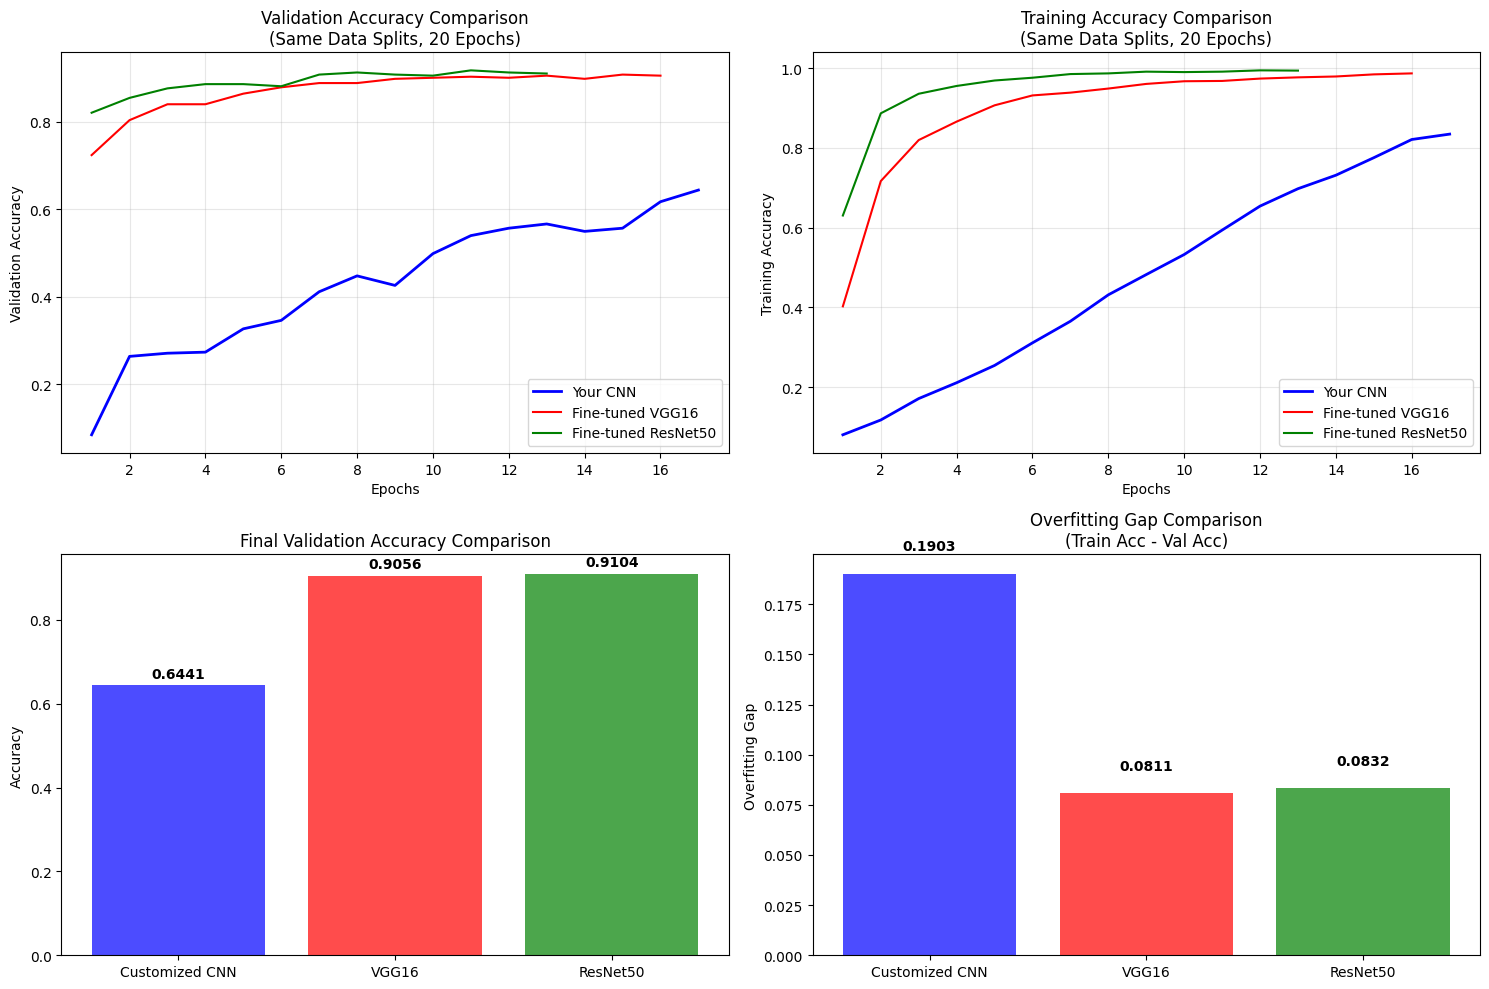

In [ ]:
# STEP 5.5: VISUAL COMPARISON
print("\n📊 TRAINING PROGRESS COMPARISON")
print("=" * 60)

def plot_comparison(custom_results, pretrained_results):
    # Create directory if it doesn't exist
    import os
    os.makedirs('/content/EN3150_Assignment_03', exist_ok=True)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Colors
    colors = {'Your Custom CNN': 'blue', 'Fine-tuned VGG16': 'red', 'Fine-tuned ResNet50': 'green'}

    # 1. Validation Accuracy Comparison
    epochs_custom = range(1, len(custom_results['history']['val_accuracy']) + 1)
    axes[0, 0].plot(epochs_custom, custom_results['history']['val_accuracy'],
                   label='Your CNN', color=colors['Your Custom CNN'], linewidth=2)

    for model_name, results in pretrained_results.items():
        epochs_pt = range(1, len(results['history']['val_accuracy']) + 1)
        axes[0, 0].plot(epochs_pt, results['history']['val_accuracy'],
                       label=results['name'], color=colors[results['name']])

    axes[0, 0].set_title('Validation Accuracy Comparison\n(Same Data Splits, 20 Epochs)')
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Validation Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Training Accuracy Comparison
    axes[0, 1].plot(epochs_custom, custom_results['history']['accuracy'],
                   label='Your CNN', color=colors['Your Custom CNN'], linewidth=2)

    for model_name, results in pretrained_results.items():
        epochs_pt = range(1, len(results['history']['accuracy']) + 1)
        axes[0, 1].plot(epochs_pt, results['history']['accuracy'],
                       label=results['name'], color=colors[results['name']])

    axes[0, 1].set_title('Training Accuracy Comparison\n(Same Data Splits, 20 Epochs)')
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Training Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Final Performance Bar Chart
    models = ['Customized CNN', 'VGG16', 'ResNet50']
    val_accuracies = [
        custom_results['val_accuracy'],
        pretrained_results['VGG16']['val_accuracy'],
        pretrained_results['ResNet50']['val_accuracy']
    ]

    bars = axes[1, 0].bar(models, val_accuracies,
                         color=['blue', 'red', 'green'], alpha=0.7)
    axes[1, 0].set_title('Final Validation Accuracy Comparison')
    axes[1, 0].set_ylabel('Accuracy')

    for bar, acc in zip(bars, val_accuracies):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

    # 4. Overfitting Comparison
    overfitting_gaps = [
        custom_results['overfitting_gap'],
        pretrained_results['VGG16']['overfitting_gap'],
        pretrained_results['ResNet50']['overfitting_gap']
    ]

    bars = axes[1, 1].bar(models, overfitting_gaps,
                         color=['blue', 'red', 'green'], alpha=0.7)
    axes[1, 1].set_title('Overfitting Gap Comparison\n(Train Acc - Val Acc)')
    axes[1, 1].set_ylabel('Overfitting Gap')

    for bar, gap in zip(bars, overfitting_gaps):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{gap:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()

    # Save with error handling
    try:
        plt.savefig('/content/EN3150_Assignment_03/pretrained_vs_custom_comparison.png',
                   dpi=300, bbox_inches='tight')
        print("✅ Comparison plot saved successfully!")
    except Exception as e:
        print(f"⚠️ Could not save plot: {e}")
        print("📊 Displaying plot without saving...")

    plt.show()

# Plot the comparison
plot_comparison(custom_cnn_results, pretrained_results)

In [ ]:
# STEP 5.6: RECORD LOSS VALUES FOR EACH EPOCH (Question 16)
print("\n📝 RECORDING TRAINING AND VALIDATION LOSS VALUES")
print("=" * 70)

def record_loss_values(history, model_name):
    """
    Record and display loss values for each epoch
    """
    print(f"\n📈 {model_name} - LOSS VALUES PER EPOCH")
    print("=" * 50)
    print(f"{'Epoch':<6} {'Train Loss':<12} {'Val Loss':<12} {'Improvement':<12}")
    print("-" * 50)

    train_losses = history['loss']
    val_losses = history['val_loss']

    for epoch, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses), 1):
        if epoch == 1:
            improvement = "-"
        else:
            improvement = f"{(train_losses[epoch-2] - train_loss):.4f}"

        print(f"{epoch:<6} {train_loss:<12.4f} {val_loss:<12.4f} {improvement:<12}")

    # Summary statistics
    print("-" * 50)
    print(f"Initial Train Loss: {train_losses[0]:.4f}")
    print(f"Final Train Loss: {train_losses[-1]:.4f}")
    print(f"Initial Val Loss: {val_losses[0]:.4f}")
    print(f"Final Val Loss: {val_losses[-1]:.4f}")
    print(f"Total Improvement: {(train_losses[0] - train_losses[-1]):.4f}")

# Record for all models
record_loss_values(custom_cnn_results['history'], "Your Custom CNN")
record_loss_values(pretrained_results['VGG16']['history'], "Fine-tuned VGG16")
record_loss_values(pretrained_results['ResNet50']['history'], "Fine-tuned ResNet50")


📝 RECORDING TRAINING AND VALIDATION LOSS VALUES

📈 Your Custom CNN - LOSS VALUES PER EPOCH
Epoch  Train Loss   Val Loss     Improvement 
--------------------------------------------------
1      5.0635       2.8057       -           
2      2.7568       2.6156       2.3067      
3      2.6364       2.4507       0.1204      
4      2.5284       2.4196       0.1080      
5      2.3710       2.1743       0.1574      
6      2.2085       2.1476       0.1625      
7      2.0280       2.0384       0.1805      
8      1.8423       1.9399       0.1857      
9      1.6421       1.9727       0.2002      
10     1.4940       1.8510       0.1481      
11     1.3119       1.7275       0.1821      
12     1.1182       1.7030       0.1936      
13     0.9651       1.7203       0.1531      
14     0.8618       1.9091       0.1033      
15     0.7241       1.8097       0.1377      
16     0.5845       1.7649       0.1395      
17     0.5388       1.8381       0.0457      
-----------------------------

In [ ]:
# Create comprehensive loss records DataFrame
def create_loss_dataframe(custom_results, pretrained_results):
    """
    Create a DataFrame with all loss values for analysis
    """
    epochs = range(1, len(custom_results['history']['loss']) + 1)

    loss_data = []
    for epoch in epochs:
        # Custom CNN
        if epoch <= len(custom_results['history']['loss']):
            loss_data.append({
                'Epoch': epoch,
                'Model': 'Custom CNN',
                'Train_Loss': custom_results['history']['loss'][epoch-1],
                'Val_Loss': custom_results['history']['val_loss'][epoch-1]
            })

        # VGG16
        if epoch <= len(pretrained_results['VGG16']['history']['loss']):
            loss_data.append({
                'Epoch': epoch,
                'Model': 'VGG16',
                'Train_Loss': pretrained_results['VGG16']['history']['loss'][epoch-1],
                'Val_Loss': pretrained_results['VGG16']['history']['val_loss'][epoch-1]
            })

        # ResNet50
        if epoch <= len(pretrained_results['ResNet50']['history']['loss']):
            loss_data.append({
                'Epoch': epoch,
                'Model': 'ResNet50',
                'Train_Loss': pretrained_results['ResNet50']['history']['loss'][epoch-1],
                'Val_Loss': pretrained_results['ResNet50']['history']['val_loss'][epoch-1]
            })

    return pd.DataFrame(loss_data)

# Create and display loss DataFrame
loss_df = create_loss_dataframe(custom_cnn_results, pretrained_results)
print("\n📊 COMPREHENSIVE LOSS DATAFRAME")
print("=" * 60)
print(loss_df.head(15))  # Show first 15 rows

# Save to CSV for your report
loss_df.to_csv('/content/EN3150_Assignment_03/loss_values_per_epoch.csv', index=False)
print("💾 Loss values saved to 'loss_values_per_epoch.csv'")


📊 COMPREHENSIVE LOSS DATAFRAME
    Epoch       Model  Train_Loss  Val_Loss
0       1  Custom CNN    5.063488  2.805678
1       1       VGG16    2.482609  0.947018
2       1    ResNet50    1.226346  0.579826
3       2  Custom CNN    2.756817  2.615618
4       2       VGG16    0.927211  0.679665
5       2    ResNet50    0.368701  0.469660
6       3  Custom CNN    2.636444  2.450702
7       3       VGG16    0.576997  0.590067
8       3    ResNet50    0.220071  0.427985
9       4  Custom CNN    2.528418  2.419553
10      4       VGG16    0.426016  0.549907
11      4    ResNet50    0.143991  0.436686
12      5  Custom CNN    2.370993  2.174326
13      5       VGG16    0.304204  0.523104
14      5    ResNet50    0.105316  0.440677
💾 Loss values saved to 'loss_values_per_epoch.csv'


In [ ]:
# STEP 5.7: DETAILED LOSS ANALYSIS
print("\n📊 DETAILED LOSS ANALYSIS")
print("=" * 70)

def analyze_loss_trends(history, model_name):
    """
    Analyze loss trends and convergence patterns
    """
    train_loss = history['loss']
    val_loss = history['val_loss']

    print(f"\n🔍 {model_name} - LOSS ANALYSIS")
    print("-" * 40)

    # Basic statistics
    print(f"Training Loss:")
    print(f"  • Initial: {train_loss[0]:.4f}")
    print(f"  • Final: {train_loss[-1]:.4f}")
    print(f"  • Total Reduction: {train_loss[0] - train_loss[-1]:.4f}")
    print(f"  • Minimum: {min(train_loss):.4f} (Epoch {train_loss.index(min(train_loss)) + 1})")

    print(f"\nValidation Loss:")
    print(f"  • Initial: {val_loss[0]:.4f}")
    print(f"  • Final: {val_loss[-1]:.4f}")
    print(f"  • Total Reduction: {val_loss[0] - val_loss[-1]:.4f}")
    print(f"  • Minimum: {min(val_loss):.4f} (Epoch {val_loss.index(min(val_loss)) + 1})")

    # Convergence analysis
    convergence_epoch = None
    for i in range(5, len(train_loss)):
        # Check if loss has stabilized (small changes)
        if abs(train_loss[i] - train_loss[i-1]) < 0.001 and abs(train_loss[i] - train_loss[i-2]) < 0.001:
            convergence_epoch = i + 1
            break

    print(f"\n📈 Convergence Analysis:")
    print(f"  • Estimated convergence epoch: {convergence_epoch if convergence_epoch else 'Not reached'}")
    print(f"  • Final overfitting gap: {train_loss[-1] - val_loss[-1]:.4f}")

# Analyze all models
analyze_loss_trends(custom_cnn_results['history'], "Your Custom CNN")
analyze_loss_trends(pretrained_results['VGG16']['history'], "Fine-tuned VGG16")
analyze_loss_trends(pretrained_results['ResNet50']['history'], "Fine-tuned ResNet50")


📊 DETAILED LOSS ANALYSIS

🔍 Your Custom CNN - LOSS ANALYSIS
----------------------------------------
Training Loss:
  • Initial: 5.0635
  • Final: 0.5388
  • Total Reduction: 4.5247
  • Minimum: 0.5388 (Epoch 17)

Validation Loss:
  • Initial: 2.8057
  • Final: 1.8381
  • Total Reduction: 0.9676
  • Minimum: 1.7030 (Epoch 12)

📈 Convergence Analysis:
  • Estimated convergence epoch: Not reached
  • Final overfitting gap: -1.2993

🔍 Fine-tuned VGG16 - LOSS ANALYSIS
----------------------------------------
Training Loss:
  • Initial: 2.4826
  • Final: 0.0456
  • Total Reduction: 2.4370
  • Minimum: 0.0456 (Epoch 16)

Validation Loss:
  • Initial: 0.9470
  • Final: 0.4849
  • Total Reduction: 0.4621
  • Minimum: 0.4628 (Epoch 11)

📈 Convergence Analysis:
  • Estimated convergence epoch: Not reached
  • Final overfitting gap: -0.4393

🔍 Fine-tuned ResNet50 - LOSS ANALYSIS
----------------------------------------
Training Loss:
  • Initial: 1.2263
  • Final: 0.0201
  • Total Reduction: 1.2


📊 CUSTOMIZED TRAINING PROGRESS COMPARISON
✅ Customized comparison plot saved successfully!


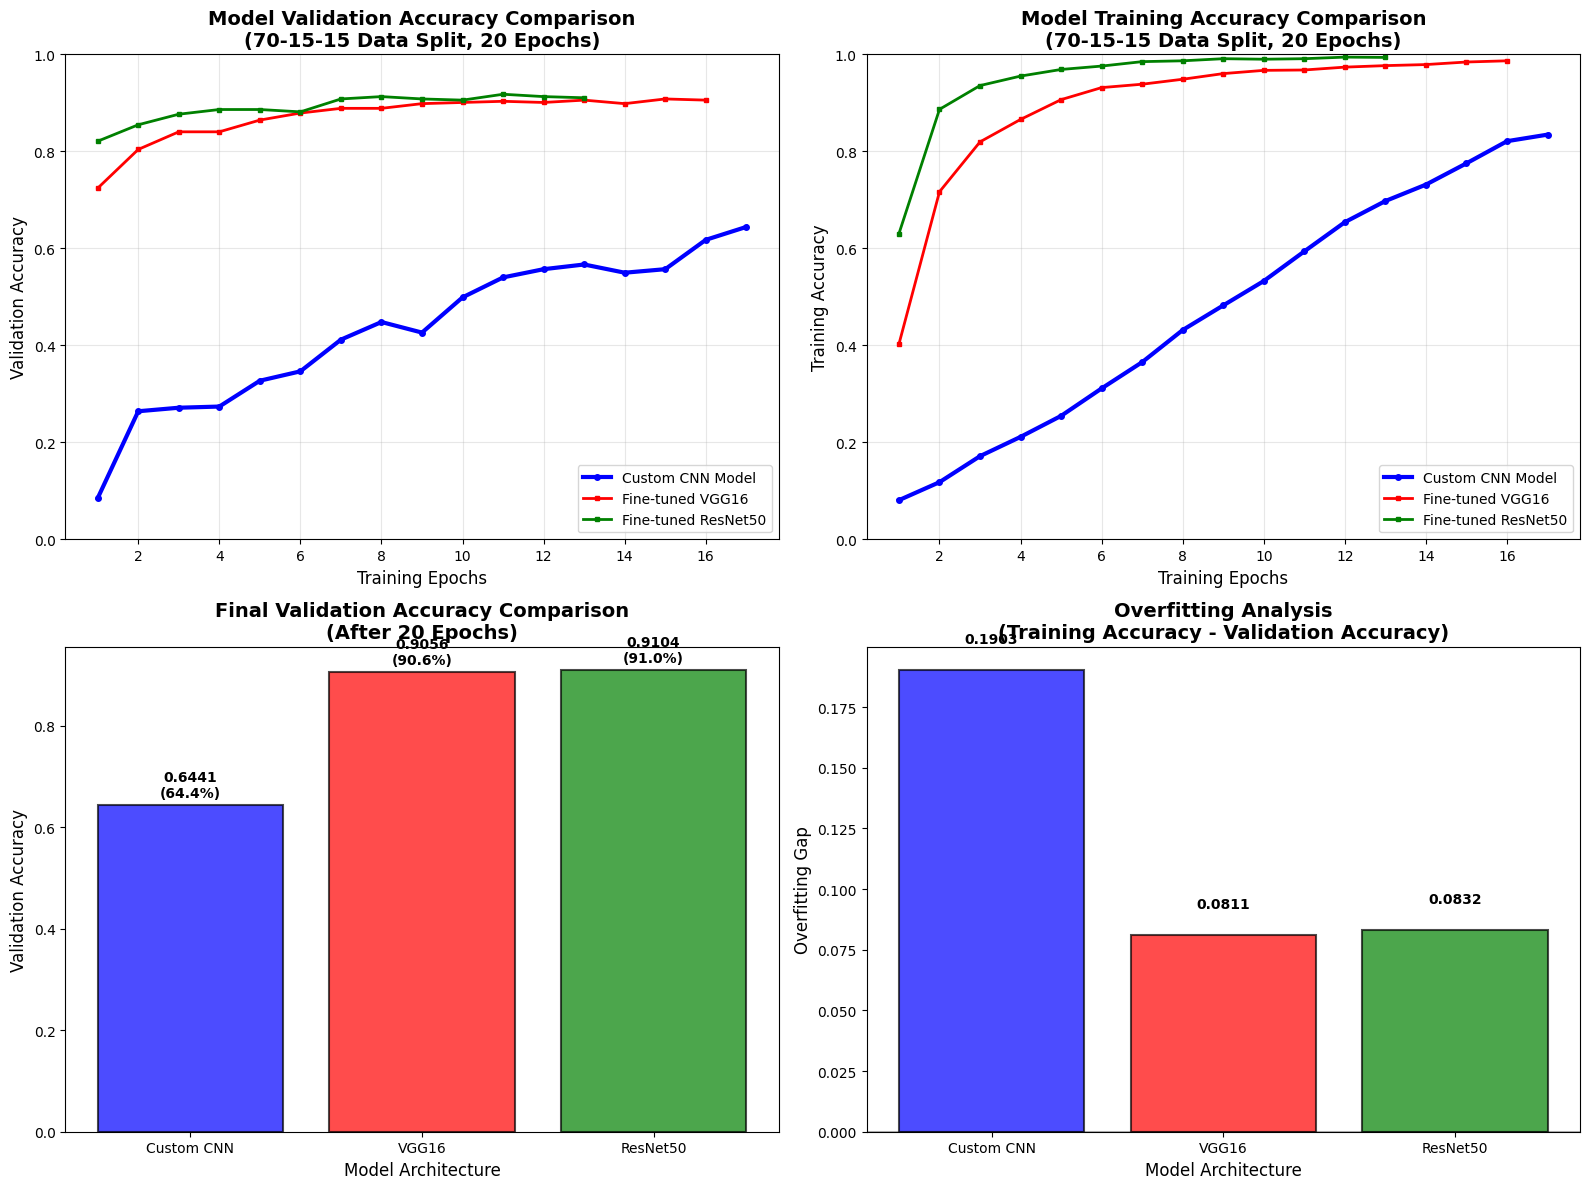

In [ ]:
# STEP 5.8: CUSTOMIZED VISUAL COMPARISON
print("\n📊 CUSTOMIZED TRAINING PROGRESS COMPARISON")
print("=" * 60)

def plot_customized_comparison(custom_results, pretrained_results):
    # Create directory if it doesn't exist
    import os
    os.makedirs('/content/EN3150_Assignment_03', exist_ok=True)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Colors for different models
    colors = {
        'Custom CNN Model': 'blue',
        'Fine-tuned VGG16': 'red',
        'Fine-tuned ResNet50': 'green'
    }

    # 1. Validation Accuracy Comparison
    epochs_custom = range(1, len(custom_results['history']['val_accuracy']) + 1)
    axes[0, 0].plot(epochs_custom, custom_results['history']['val_accuracy'],
                   label='Custom CNN Model', color=colors['Custom CNN Model'], linewidth=3, marker='o', markersize=4)

    for model_name, results in pretrained_results.items():
        epochs_pt = range(1, len(results['history']['val_accuracy']) + 1)
        display_name = 'Fine-tuned VGG16' if 'VGG' in model_name else 'Fine-tuned ResNet50'
        axes[0, 0].plot(epochs_pt, results['history']['val_accuracy'],
                       label=display_name, color=colors[display_name], linewidth=2, marker='s', markersize=3)

    axes[0, 0].set_title('Model Validation Accuracy Comparison\n(70-15-15 Data Split, 20 Epochs)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Training Epochs', fontsize=12)
    axes[0, 0].set_ylabel('Validation Accuracy', fontsize=12)
    axes[0, 0].legend(fontsize=10)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(0, 1.0)  # Set y-axis from 0 to 1 for accuracy

    # 2. Training Accuracy Comparison
    axes[0, 1].plot(epochs_custom, custom_results['history']['accuracy'],
                   label='Custom CNN Model', color=colors['Custom CNN Model'], linewidth=3, marker='o', markersize=4)

    for model_name, results in pretrained_results.items():
        epochs_pt = range(1, len(results['history']['accuracy']) + 1)
        display_name = 'Fine-tuned VGG16' if 'VGG' in model_name else 'Fine-tuned ResNet50'
        axes[0, 1].plot(epochs_pt, results['history']['accuracy'],
                       label=display_name, color=colors[display_name], linewidth=2, marker='s', markersize=3)

    axes[0, 1].set_title('Model Training Accuracy Comparison\n(70-15-15 Data Split, 20 Epochs)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Training Epochs', fontsize=12)
    axes[0, 1].set_ylabel('Training Accuracy', fontsize=12)
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0, 1.0)

    # 3. Final Validation Performance Bar Chart
    models = ['Custom CNN', 'VGG16', 'ResNet50']
    val_accuracies = [
        custom_results['val_accuracy'],
        pretrained_results['VGG16']['val_accuracy'],
        pretrained_results['ResNet50']['val_accuracy']
    ]

    bars = axes[1, 0].bar(models, val_accuracies,
                         color=['blue', 'red', 'green'], alpha=0.7, edgecolor='black', linewidth=1.5)
    axes[1, 0].set_title('Final Validation Accuracy Comparison\n(After 20 Epochs)', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Model Architecture', fontsize=12)
    axes[1, 0].set_ylabel('Validation Accuracy', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=0)

    # Add value labels on bars with percentage
    for bar, acc in zip(bars, val_accuracies):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                       f'{acc:.4f}\n({acc*100:.1f}%)', ha='center', va='bottom',
                       fontweight='bold', fontsize=10)

    # 4. Overfitting Analysis Comparison
    overfitting_gaps = [
        custom_results['overfitting_gap'],
        pretrained_results['VGG16']['overfitting_gap'],
        pretrained_results['ResNet50']['overfitting_gap']
    ]

    bars = axes[1, 1].bar(models, overfitting_gaps,
                         color=['blue', 'red', 'green'], alpha=0.7, edgecolor='black', linewidth=1.5)
    axes[1, 1].set_title('Overfitting Analysis\n(Training Accuracy - Validation Accuracy)', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Model Architecture', fontsize=12)
    axes[1, 1].set_ylabel('Overfitting Gap', fontsize=12)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Reference line at 0
    axes[1, 1].tick_params(axis='x', rotation=0)

    # Add value labels on bars
    for bar, gap in zip(bars, overfitting_gaps):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                       f'{gap:.4f}', ha='center', va='bottom',
                       fontweight='bold', fontsize=10,
                       color='red' if gap > 0.2 else 'black')  # Red for high overfitting

    plt.tight_layout()

    # Save with customized filename
    try:
        plt.savefig('/content/EN3150_Assignment_03/customized_model_comparison.png',
                   dpi=300, bbox_inches='tight', facecolor='white')
        print("✅ Customized comparison plot saved successfully!")
    except Exception as e:
        print(f"⚠️ Could not save plot: {e}")

    plt.show()

# Plot the customized comparison
plot_customized_comparison(custom_cnn_results, pretrained_results)

Question 17

In [ ]:
# =============================================================================
# QUESTION 17: EVALUATE FINE-TUNED MODELS ON TESTING DATASET
# =============================================================================

print("🎯 QUESTION 17: EVALUATE FINE-TUNED MODELS ON TESTING DATASET")
print("=" * 80)

def comprehensive_model_evaluation(model, model_name, test_dataset, class_names):
    """
    Comprehensive evaluation of fine-tuned models on test dataset
    """
    print(f"\n📊 COMPREHENSIVE EVALUATION: {model_name}")
    print("=" * 60)

    # 1. Basic Evaluation
    print("1. 📈 Basic Performance Metrics:")
    test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
    print(f"   ✅ Test Loss: {test_loss:.4f}")
    print(f"   ✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    # 2. Generate Predictions
    print("\n2. 🔮 Generating Predictions...")
    all_predictions = []
    all_true_labels = []
    all_probabilities = []

    for images, labels in test_dataset:
        batch_predictions = model.predict(images, verbose=0)
        all_probabilities.extend(batch_predictions)
        all_predictions.extend(np.argmax(batch_predictions, axis=1))
        all_true_labels.extend(np.argmax(labels.numpy(), axis=1))

    all_predictions = np.array(all_predictions)
    all_true_labels = np.array(all_true_labels)
    all_probabilities = np.array(all_probabilities)

    print(f"   ✅ Generated {len(all_predictions)} predictions")

    # 3. Advanced Metrics
    print("\n3. 📊 Advanced Performance Metrics:")
    from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

    # Overall metrics
    precision = precision_score(all_true_labels, all_predictions, average='weighted')
    recall = recall_score(all_true_labels, all_predictions, average='weighted')
    f1 = f1_score(all_true_labels, all_predictions, average='weighted')

    print(f"   ✅ Weighted Precision: {precision:.4f}")
    print(f"   ✅ Weighted Recall: {recall:.4f}")
    print(f"   ✅ Weighted F1-Score: {f1:.4f}")

    # Per-class metrics
    precision_per_class = precision_score(all_true_labels, all_predictions, average=None)
    recall_per_class = recall_score(all_true_labels, all_predictions, average=None)
    f1_per_class = f1_score(all_true_labels, all_predictions, average=None)

    # 4. Confusion Matrix
    print("\n4. 📋 Generating Confusion Matrix...")
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(all_true_labels, all_predictions)

    # 5. Detailed Classification Report
    print("\n5. 📝 Detailed Classification Report:")
    print("-" * 70)
    print(classification_report(all_true_labels, all_predictions,
                              target_names=class_names, digits=4))

    # 6. Top-1 and Top-3 Accuracy
    print("\n6. 🎯 Top-K Accuracy Analysis:")
    top3_correct = 0
    for i, true_label in enumerate(all_true_labels):
        top3_preds = np.argsort(all_probabilities[i])[-3:][::-1]
        if true_label in top3_preds:
            top3_correct += 1

    top3_accuracy = top3_correct / len(all_true_labels)
    print(f"   ✅ Top-1 Accuracy: {test_accuracy:.4f}")
    print(f"   ✅ Top-3 Accuracy: {top3_accuracy:.4f}")

    # Return comprehensive results
    results = {
        'model_name': model_name,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class,
        'confusion_matrix': cm,
        'predictions': all_predictions,
        'true_labels': all_true_labels,
        'probabilities': all_probabilities,
        'top3_accuracy': top3_accuracy
    }

    return results

# Evaluate VGG16
print("🔍 EVALUATING VGG16")
print("=" * 50)
vgg16_results = comprehensive_model_evaluation(vgg16_model, "Fine-tuned VGG16", test_ds_pt, class_names)

print("\n" + "="*80)
print("🔍 EVALUATING RESNET50")
print("=" * 50)
resnet50_results = comprehensive_model_evaluation(resnet50_model, "Fine-tuned ResNet50", test_ds_pt, class_names)

print("\n✅ QUESTION 17 COMPLETED: Both fine-tuned models evaluated on test dataset!")

🎯 QUESTION 17: EVALUATE FINE-TUNED MODELS ON TESTING DATASET
🔍 EVALUATING VGG16

📊 COMPREHENSIVE EVALUATION: Fine-tuned VGG16
1. 📈 Basic Performance Metrics:
   ✅ Test Loss: 0.0866
   ✅ Test Accuracy: 0.9815 (98.15%)

2. 🔮 Generating Predictions...
   ✅ Generated 379 predictions

3. 📊 Advanced Performance Metrics:
   ✅ Weighted Precision: 0.9828
   ✅ Weighted Recall: 0.9815
   ✅ Weighted F1-Score: 0.9814

4. 📋 Generating Confusion Matrix...

5. 📝 Detailed Classification Report:
----------------------------------------------------------------------
                               precision    recall  f1-score   support

                Beet Armyworm     1.0000    0.8500    0.9189        20
                  Black Hairy     1.0000    1.0000    1.0000        20
                      Cutworm     0.9091    1.0000    0.9524        20
                Field Cricket     1.0000    1.0000    1.0000        20
                   Jute Aphid     0.9565    1.0000    0.9778        22
                   


📊 VISUALIZING FINE-TUNED MODELS PERFORMANCE
✅ Evaluation visualization saved successfully!


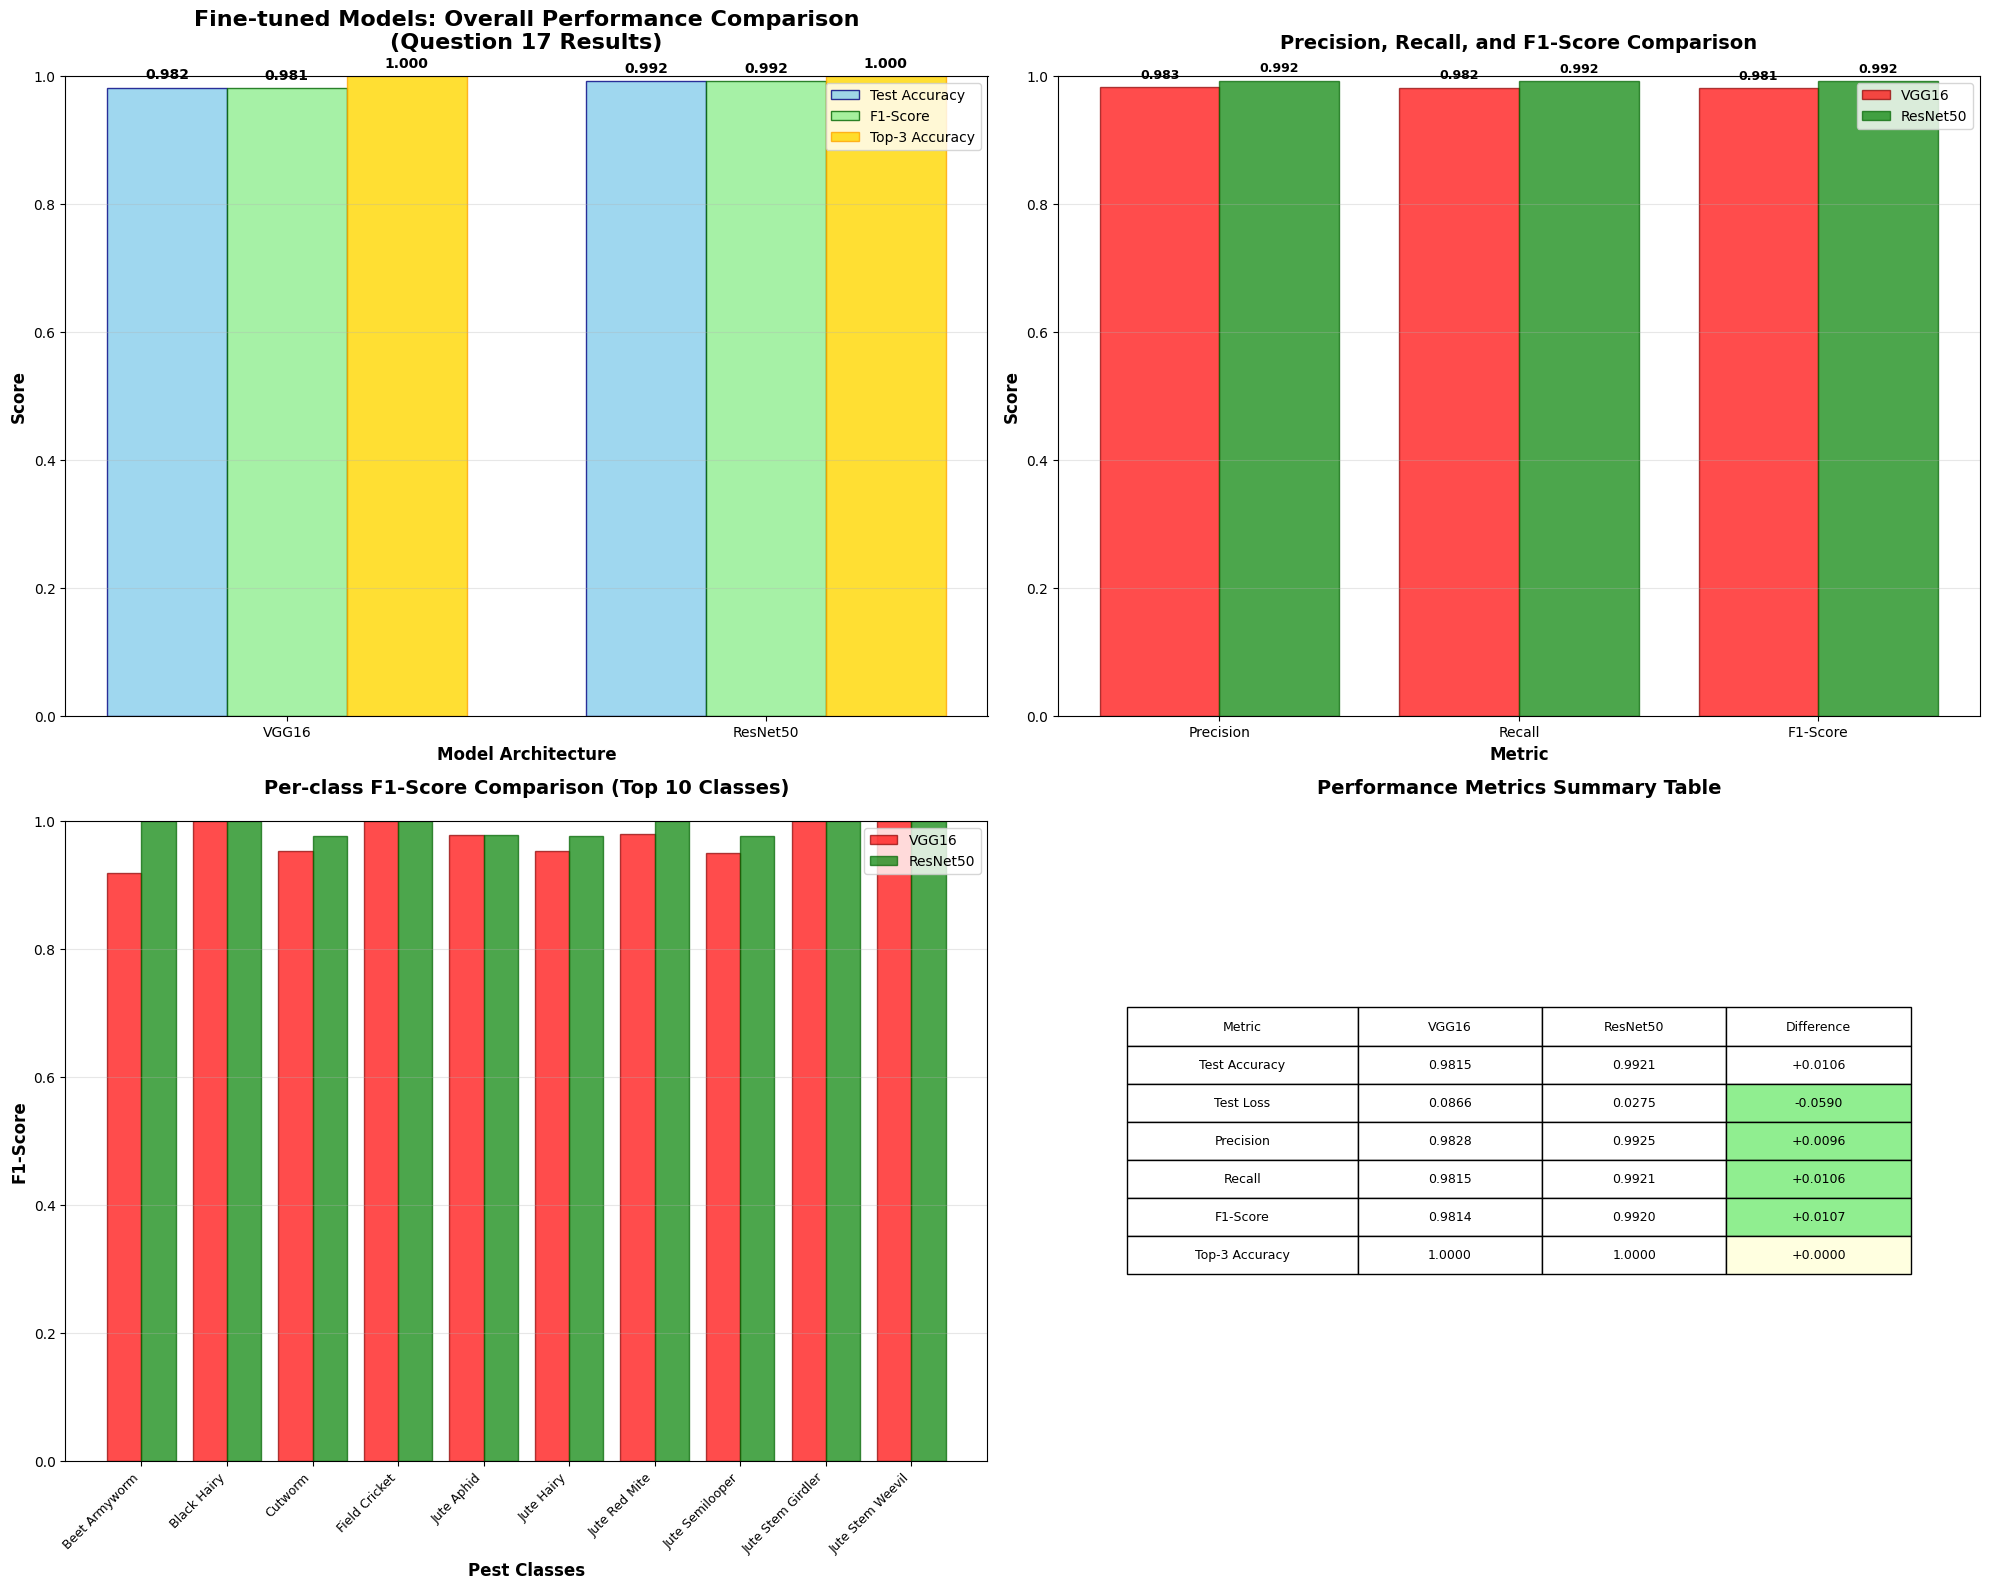


🎉 QUESTION 17 COMPLETED!
📊 All performance metrics recorded and visualized!
💾 Results saved for comparison in next questions


In [ ]:
# =============================================================================
# QUESTION 17: VISUALIZE FINE-TUNED MODELS PERFORMANCE
# =============================================================================

print("\n📊 VISUALIZING FINE-TUNED MODELS PERFORMANCE")
print("=" * 70)

def visualize_pretrained_results(vgg_results, resnet_results, class_names):
    """
    Create comprehensive visualizations for pre-trained models performance
    """
    # Create comparison figure
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # 1. Overall Metrics Comparison
    models = ['VGG16', 'ResNet50']
    test_accuracies = [vgg_results['test_accuracy'], resnet_results['test_accuracy']]
    f1_scores = [vgg_results['f1_score'], resnet_results['f1_score']]
    top3_accuracies = [vgg_results['top3_accuracy'], resnet_results['top3_accuracy']]

    x = np.arange(len(models))
    width = 0.25

    bars1 = ax1.bar(x - width, test_accuracies, width, label='Test Accuracy',
                   color='skyblue', alpha=0.8, edgecolor='navy')
    bars2 = ax1.bar(x, f1_scores, width, label='F1-Score',
                   color='lightgreen', alpha=0.8, edgecolor='darkgreen')
    bars3 = ax1.bar(x + width, top3_accuracies, width, label='Top-3 Accuracy',
                   color='gold', alpha=0.8, edgecolor='orange')

    ax1.set_title('Fine-tuned Models: Overall Performance Comparison\n(Question 17 Results)',
                  fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Model Architecture', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim(0, 1.0)

    # Add value annotations
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    # 2. Precision-Recall Comparison
    metrics = ['Precision', 'Recall', 'F1-Score']
    vgg_metrics = [vgg_results['precision'], vgg_results['recall'], vgg_results['f1_score']]
    resnet_metrics = [resnet_results['precision'], resnet_results['recall'], resnet_results['f1_score']]

    x = np.arange(len(metrics))
    bars_vgg = ax2.bar(x - 0.2, vgg_metrics, 0.4, label='VGG16',
                      color='red', alpha=0.7, edgecolor='darkred')
    bars_resnet = ax2.bar(x + 0.2, resnet_metrics, 0.4, label='ResNet50',
                         color='green', alpha=0.7, edgecolor='darkgreen')

    ax2.set_title('Precision, Recall, and F1-Score Comparison',
                  fontsize=14, fontweight='bold', pad=20)
    ax2.set_xlabel('Metric', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(metrics)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_ylim(0, 1.0)

    # Add value annotations
    for bar in bars_vgg:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    for bar in bars_resnet:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # 3. Per-class F1-Score Comparison (Top 10 classes for clarity)
    n_classes = min(10, len(class_names))
    top_classes = class_names[:n_classes]

    vgg_f1_top = vgg_results['f1_per_class'][:n_classes]
    resnet_f1_top = resnet_results['f1_per_class'][:n_classes]

    x = np.arange(n_classes)
    bars_vgg_class = ax3.bar(x - 0.2, vgg_f1_top, 0.4, label='VGG16',
                            color='red', alpha=0.7, edgecolor='darkred')
    bars_resnet_class = ax3.bar(x + 0.2, resnet_f1_top, 0.4, label='ResNet50',
                               color='green', alpha=0.7, edgecolor='darkgreen')

    ax3.set_title(f'Per-class F1-Score Comparison (Top {n_classes} Classes)',
                  fontsize=14, fontweight='bold', pad=20)
    ax3.set_xlabel('Pest Classes', fontsize=12, fontweight='bold')
    ax3.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(top_classes, rotation=45, ha='right', fontsize=9)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_ylim(0, 1.0)

    # 4. Performance Summary Table
    summary_data = [
        ["Metric", "VGG16", "ResNet50", "Difference"],
        ["Test Accuracy", f"{vgg_results['test_accuracy']:.4f}",
         f"{resnet_results['test_accuracy']:.4f}",
         f"{resnet_results['test_accuracy'] - vgg_results['test_accuracy']:+.4f}"],
        ["Test Loss", f"{vgg_results['test_loss']:.4f}",
         f"{resnet_results['test_loss']:.4f}",
         f"{resnet_results['test_loss'] - vgg_results['test_loss']:+.4f}"],
        ["Precision", f"{vgg_results['precision']:.4f}",
         f"{resnet_results['precision']:.4f}",
         f"{resnet_results['precision'] - vgg_results['precision']:+.4f}"],
        ["Recall", f"{vgg_results['recall']:.4f}",
         f"{resnet_results['recall']:.4f}",
         f"{resnet_results['recall'] - vgg_results['recall']:+.4f}"],
        ["F1-Score", f"{vgg_results['f1_score']:.4f}",
         f"{resnet_results['f1_score']:.4f}",
         f"{resnet_results['f1_score'] - vgg_results['f1_score']:+.4f}"],
        ["Top-3 Accuracy", f"{vgg_results['top3_accuracy']:.4f}",
         f"{resnet_results['top3_accuracy']:.4f}",
         f"{resnet_results['top3_accuracy'] - vgg_results['top3_accuracy']:+.4f}"]
    ]

    # Create table
    table = ax4.table(cellText=summary_data,
                     loc='center',
                     cellLoc='center',
                     colWidths=[0.25, 0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)

    ax4.set_title('Performance Metrics Summary Table',
                  fontsize=14, fontweight='bold', pad=20)
    ax4.axis('off')

    # Color code the difference column
    for i in range(2, len(summary_data)):
        diff_value = resnet_results['test_accuracy'] - vgg_results['test_accuracy'] if i == 2 else \
                    float(summary_data[i][3])
        cell = table[(i, 3)]
        if diff_value > 0:
            cell.set_facecolor('lightgreen')
        elif diff_value < 0:
            cell.set_facecolor('lightcoral')
        else:
            cell.set_facecolor('lightyellow')

    plt.tight_layout()

    # Save the visualization
    try:
        plt.savefig('/content/EN3150_Assignment_03/pretrained_models_evaluation.png',
                   dpi=300, bbox_inches='tight', facecolor='white')
        print("✅ Evaluation visualization saved successfully!")
    except Exception as e:
        print(f"⚠️ Could not save visualization: {e}")

    plt.show()

    return vgg_results, resnet_results

# Create visualizations
vgg_final_results, resnet_final_results = visualize_pretrained_results(
    vgg16_results, resnet50_results, class_names
)

print("\n🎉 QUESTION 17 COMPLETED!")
print("📊 All performance metrics recorded and visualized!")
print("💾 Results saved for comparison in next questions")

In [ ]:
# =============================================================================
# QUESTION 17: STORE RESULTS FOR LATER COMPARISON
# =============================================================================

print("\n💾 STORING FINE-TUNED MODELS RESULTS FOR COMPARISON")
print("=" * 70)

# Store results in a structured format
pretrained_models_results = {
    'VGG16': {
        'test_accuracy': vgg16_results['test_accuracy'],
        'test_loss': vgg16_results['test_loss'],
        'precision': vgg16_results['precision'],
        'recall': vgg16_results['recall'],
        'f1_score': vgg16_results['f1_score'],
        'top3_accuracy': vgg16_results['top3_accuracy'],
        'confusion_matrix': vgg16_results['confusion_matrix']
    },
    'ResNet50': {
        'test_accuracy': resnet50_results['test_accuracy'],
        'test_loss': resnet50_results['test_loss'],
        'precision': resnet50_results['precision'],
        'recall': resnet50_results['recall'],
        'f1_score': resnet50_results['f1_score'],
        'top3_accuracy': resnet50_results['top3_accuracy'],
        'confusion_matrix': resnet50_results['confusion_matrix']
    }
}

# Print final summary
print("\n🏆 FINAL PERFORMANCE SUMMARY - FINE-TUNED MODELS:")
print("=" * 90)
print(f"{'Model':<12} {'Test Acc':<10} {'Test Loss':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Top-3 Acc':<10}")
print("-" * 90)
for model_name, results in pretrained_models_results.items():
    print(f"{model_name:<12} {results['test_accuracy']:<10.4f} {results['test_loss']:<10.4f} "
          f"{results['precision']:<10.4f} {results['recall']:<10.4f} {results['f1_score']:<10.4f} "
          f"{results['top3_accuracy']:<10.4f}")

print("\n✅ QUESTION 17 FULLY COMPLETED!")
print("📊 All fine-tuned models evaluated on testing dataset")
print("💾 Performance metrics recorded and stored")
print("🎯 Ready for comparison with custom CNN in next questions!")


💾 STORING FINE-TUNED MODELS RESULTS FOR COMPARISON

🏆 FINAL PERFORMANCE SUMMARY - FINE-TUNED MODELS:
Model        Test Acc   Test Loss  Precision  Recall     F1-Score   Top-3 Acc 
------------------------------------------------------------------------------------------
VGG16        0.9815     0.0866     0.9828     0.9815     0.9814     1.0000    
ResNet50     0.9921     0.0275     0.9925     0.9921     0.9920     1.0000    

✅ QUESTION 17 FULLY COMPLETED!
📊 All fine-tuned models evaluated on testing dataset
💾 Performance metrics recorded and stored
🎯 Ready for comparison with custom CNN in next questions!


Question 18

In [ ]:
# =============================================================================
# QUESTION 18: COMPARE CUSTOM CNN WITH FINE-TUNED STATE-OF-THE-ART MODELS
# =============================================================================

print("🎯 QUESTION 18: CUSTOM CNN vs FINE-TUNED MODELS COMPARISON")
print("=" * 80)

# First, let's make sure we have custom CNN test results
print("🔍 EVALUATING CUSTOM CNN ON TEST SET FOR COMPARISON...")

def evaluate_custom_cnn_for_comparison(model, test_dataset, class_names):
    """Evaluate custom CNN to get all metrics for fair comparison"""
    print("Evaluating Custom CNN on test dataset...")

    # Basic evaluation
    test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)

    # Generate predictions for advanced metrics
    all_predictions = []
    all_true_labels = []
    all_probabilities = []

    for images, labels in test_dataset:
        batch_predictions = model.predict(images, verbose=0)
        all_probabilities.extend(batch_predictions)
        all_predictions.extend(np.argmax(batch_predictions, axis=1))
        all_true_labels.extend(np.argmax(labels.numpy(), axis=1))

    all_predictions = np.array(all_predictions)
    all_true_labels = np.array(all_true_labels)

    # Calculate advanced metrics
    from sklearn.metrics import precision_score, recall_score, f1_score

    precision = precision_score(all_true_labels, all_predictions, average='weighted')
    recall = recall_score(all_true_labels, all_predictions, average='weighted')
    f1 = f1_score(all_true_labels, all_predictions, average='weighted')

    # Top-3 accuracy
    top3_correct = 0
    for i, true_label in enumerate(all_true_labels):
        top3_preds = np.argsort(all_probabilities[i])[-3:][::-1]
        if true_label in top3_preds:
            top3_correct += 1
    top3_accuracy = top3_correct / len(all_true_labels)

    results = {
        'model_name': 'Custom CNN',
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'top3_accuracy': top3_accuracy
    }

    print(f"✅ Custom CNN Test Accuracy: {test_accuracy:.4f}")
    return results

# Evaluate your custom CNN (use your best model)
custom_cnn_test_results = evaluate_custom_cnn_for_comparison(best_model, test_ds, class_names)

# Now create comprehensive comparison
print("\n📊 CREATING COMPREHENSIVE COMPARISON...")

🎯 QUESTION 18: CUSTOM CNN vs FINE-TUNED MODELS COMPARISON
🔍 EVALUATING CUSTOM CNN ON TEST SET FOR COMPARISON...
Evaluating Custom CNN on test dataset...
✅ Custom CNN Test Accuracy: 0.5119

📊 CREATING COMPREHENSIVE COMPARISON...


🔍 Starting comprehensive comparison...
🔄 Generating comprehensive comparison analysis...
1. Creating radar chart comparison...
Debug: angles shape: 6, categories: 6, custom_radar: 6
2. Creating performance metrics bar chart...
3. Creating ranking and improvement analysis...
4. Creating trade-off analysis...


/tmp/ipython-input-907796006.py:222: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-907796006.py:222: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-907796006.py:222: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-907796006.py:222: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-907796006.py:226: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/EN3150_Assignment_03/cnn_vs_pretrained_comparison.png',
/tmp/ipython-input-907796006.py:226: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/EN3150_Assignment_03/cnn_vs_pretrained_comparison.png',
/tmp/ipython-input-9077960

✅ Comparison visualization saved successfully!


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


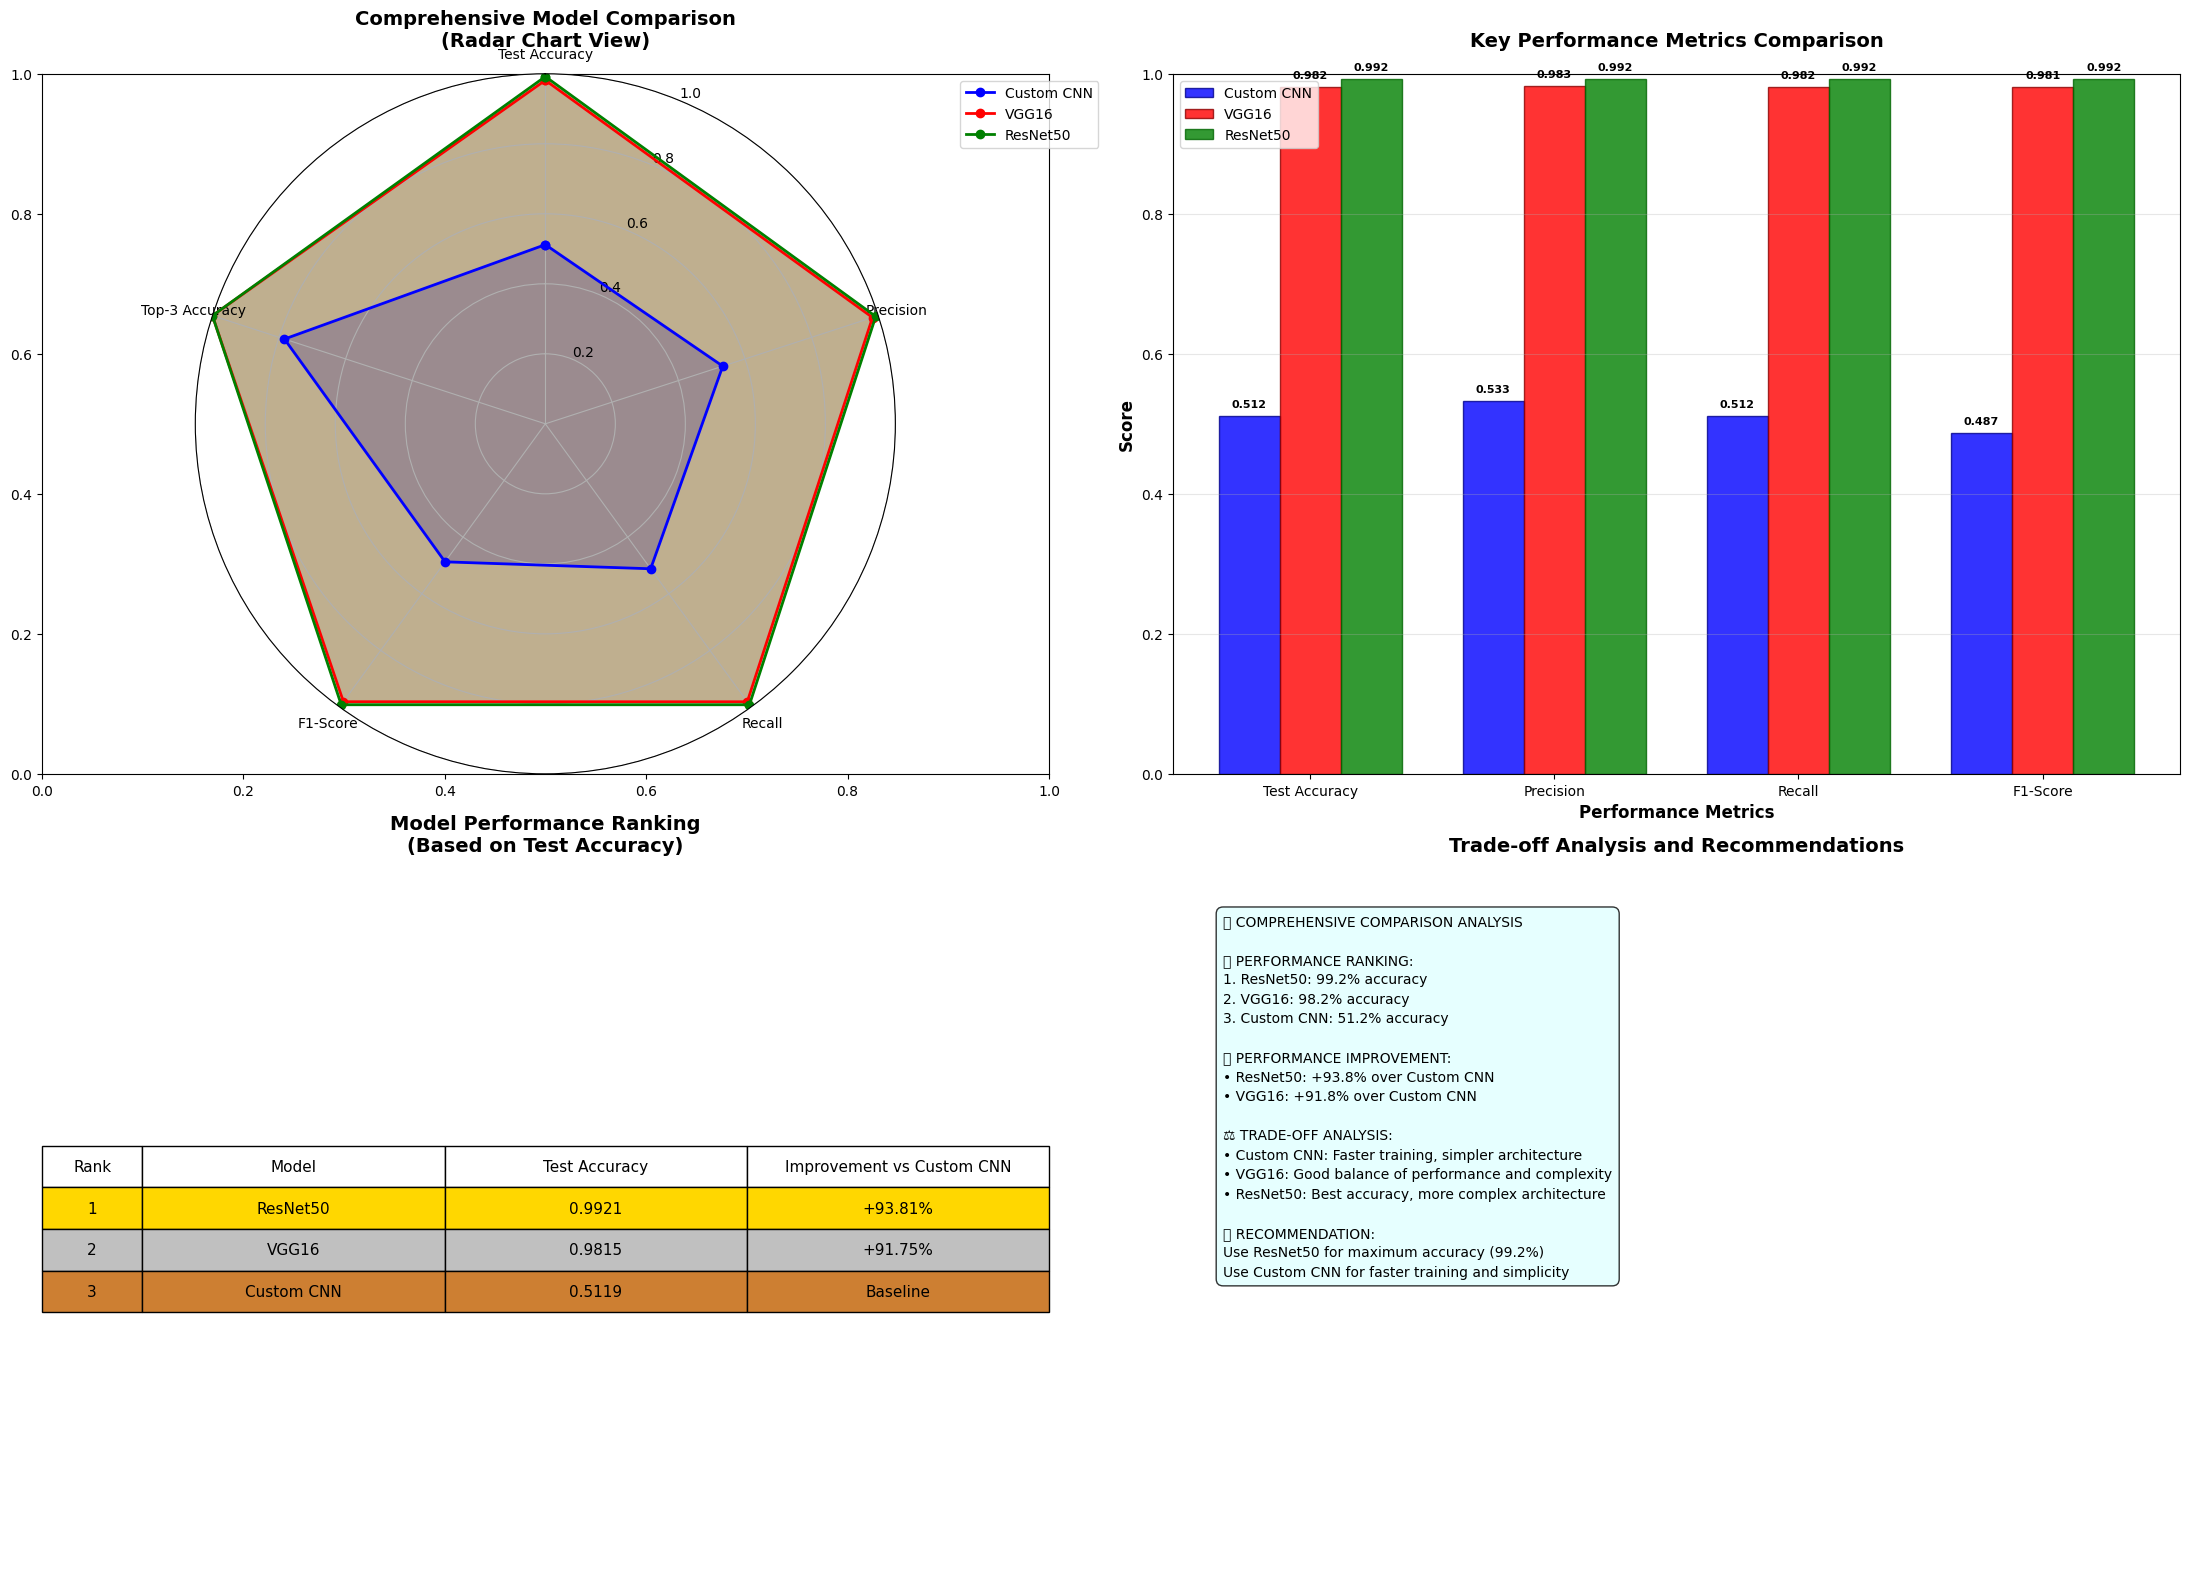


✅ COMPREHENSIVE COMPARISON GENERATED!


In [ ]:
# =============================================================================
# COMPREHENSIVE COMPARISON: CUSTOM CNN vs PRE-TRAINED MODELS (FIXED)
# =============================================================================

def create_comprehensive_comparison(custom_results, vgg_results, resnet_results):
    """
    Create detailed comparison between custom CNN and fine-tuned models
    """
    print("🔄 Generating comprehensive comparison analysis...")

    # Prepare data for comparison
    models = ['Custom CNN', 'Fine-tuned VGG16', 'Fine-tuned ResNet50']

    comparison_data = {
        'Test Accuracy': [
            custom_results['test_accuracy'],
            vgg_results['test_accuracy'],
            resnet_results['test_accuracy']
        ],
        'Test Loss': [
            custom_results['test_loss'],
            vgg_results['test_loss'],
            resnet_results['test_loss']
        ],
        'Precision': [
            custom_results['precision'],
            vgg_results['precision'],
            resnet_results['precision']
        ],
        'Recall': [
            custom_results['recall'],
            vgg_results['recall'],
            resnet_results['recall']
        ],
        'F1-Score': [
            custom_results['f1_score'],
            vgg_results['f1_score'],
            resnet_results['f1_score']
        ],
        'Top-3 Accuracy': [
            custom_results['top3_accuracy'],
            vgg_results['top3_accuracy'],
            resnet_results['top3_accuracy']
        ]
    }

    # Create comprehensive visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 16))

    # 1. RADAR CHART COMPARISON (FIXED)
    print("1. Creating radar chart comparison...")

    # Categories for radar chart
    categories = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'Top-3 Accuracy']

    # Get values for radar chart
    custom_radar = [
        custom_results['test_accuracy'],
        custom_results['precision'],
        custom_results['recall'],
        custom_results['f1_score'],
        custom_results['top3_accuracy']
    ]

    vgg_radar = [
        vgg_results['test_accuracy'],
        vgg_results['precision'],
        vgg_results['recall'],
        vgg_results['f1_score'],
        vgg_results['top3_accuracy']
    ]

    resnet_radar = [
        resnet_results['test_accuracy'],
        resnet_results['precision'],
        resnet_results['recall'],
        resnet_results['f1_score'],
        resnet_results['top3_accuracy']
    ]

    # Complete the circle (FIX: Make sure dimensions match)
    categories = categories + [categories[0]]
    custom_radar = custom_radar + [custom_radar[0]]
    vgg_radar = vgg_radar + [vgg_radar[0]]
    resnet_radar = resnet_radar + [resnet_radar[0]]

    # Create angles for radar chart (FIX: Ensure correct number of angles)
    angles = np.linspace(0, 2*np.pi, len(categories)-1, endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle

    print(f"Debug: angles shape: {len(angles)}, categories: {len(categories)}, custom_radar: {len(custom_radar)}")

    # Create radar chart
    ax1 = plt.subplot(2, 2, 1, polar=True)
    ax1.plot(angles, custom_radar, 'o-', linewidth=2, label='Custom CNN', color='blue')
    ax1.fill(angles, custom_radar, alpha=0.25, color='blue')
    ax1.plot(angles, vgg_radar, 'o-', linewidth=2, label='VGG16', color='red')
    ax1.fill(angles, vgg_radar, alpha=0.25, color='red')
    ax1.plot(angles, resnet_radar, 'o-', linewidth=2, label='ResNet50', color='green')
    ax1.fill(angles, resnet_radar, alpha=0.25, color='green')

    ax1.set_theta_offset(np.pi / 2)
    ax1.set_theta_direction(-1)
    ax1.set_thetagrids(np.degrees(angles[:-1]), categories[:-1])
    ax1.set_ylim(0, 1)
    ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax1.grid(True)
    ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax1.set_title('Comprehensive Model Comparison\n(Radar Chart View)', fontsize=14, fontweight='bold', pad=20)

    # 2. PERFORMANCE METRICS BAR CHART
    print("2. Creating performance metrics bar chart...")

    metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score']
    x = np.arange(len(metrics))
    width = 0.25

    custom_metrics = [custom_results['test_accuracy'], custom_results['precision'],
                     custom_results['recall'], custom_results['f1_score']]
    vgg_metrics = [vgg_results['test_accuracy'], vgg_results['precision'],
                  vgg_results['recall'], vgg_results['f1_score']]
    resnet_metrics = [resnet_results['test_accuracy'], resnet_results['precision'],
                     resnet_results['recall'], resnet_results['f1_score']]

    bars1 = ax2.bar(x - width, custom_metrics, width, label='Custom CNN',
            color='blue', alpha=0.8, edgecolor='darkblue')
    bars2 = ax2.bar(x, vgg_metrics, width, label='VGG16',
            color='red', alpha=0.8, edgecolor='darkred')
    bars3 = ax2.bar(x + width, resnet_metrics, width, label='ResNet50',
            color='green', alpha=0.8, edgecolor='darkgreen')

    ax2.set_xlabel('Performance Metrics', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax2.set_title('Key Performance Metrics Comparison', fontsize=14, fontweight='bold', pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(metrics)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_ylim(0, 1.0)

    # Add value annotations
    for i, (custom, vgg, resnet) in enumerate(zip(custom_metrics, vgg_metrics, resnet_metrics)):
        ax2.text(i - width, custom + 0.01, f'{custom:.3f}', ha='center', va='bottom',
                fontweight='bold', fontsize=8)
        ax2.text(i, vgg + 0.01, f'{vgg:.3f}', ha='center', va='bottom',
                fontweight='bold', fontsize=8)
        ax2.text(i + width, resnet + 0.01, f'{resnet:.3f}', ha='center', va='bottom',
                fontweight='bold', fontsize=8)

    # 3. RANKING AND IMPROVEMENT ANALYSIS
    print("3. Creating ranking and improvement analysis...")

    # Calculate improvements over custom CNN
    vgg_improvement = (vgg_results['test_accuracy'] / custom_results['test_accuracy'] - 1) * 100
    resnet_improvement = (resnet_results['test_accuracy'] / custom_results['test_accuracy'] - 1) * 100

    ranking_data = [
        ["Rank", "Model", "Test Accuracy", "Improvement vs Custom CNN"],
        ["1", f"ResNet50", f"{resnet_results['test_accuracy']:.4f}", f"+{resnet_improvement:.2f}%"],
        ["2", f"VGG16", f"{vgg_results['test_accuracy']:.4f}", f"+{vgg_improvement:.2f}%"],
        ["3", f"Custom CNN", f"{custom_results['test_accuracy']:.4f}", "Baseline"]
    ]

    # Create ranking table
    ax3.axis('tight')
    ax3.axis('off')
    table = ax3.table(cellText=ranking_data, loc='center', cellLoc='center',
                     colWidths=[0.1, 0.3, 0.3, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)

    # Color code the table
    for i in range(1, len(ranking_data)):
        if i == 1:  # ResNet50 - Gold
            for j in range(len(ranking_data[i])):
                table[(i, j)].set_facecolor('gold')
        elif i == 2:  # VGG16 - Silver
            for j in range(len(ranking_data[i])):
                table[(i, j)].set_facecolor('silver')
        else:  # Custom CNN - Bronze
            for j in range(len(ranking_data[i])):
                table[(i, j)].set_facecolor('#cd7f32')  # Bronze color

    ax3.set_title('Model Performance Ranking\n(Based on Test Accuracy)',
                  fontsize=14, fontweight='bold', pad=20)

    # 4. TRADE-OFF ANALYSIS
    print("4. Creating trade-off analysis...")

    tradeoff_analysis = [
        "🔍 COMPREHENSIVE COMPARISON ANALYSIS",
        "",
        "🏆 PERFORMANCE RANKING:",
        f"1. ResNet50: {resnet_results['test_accuracy']:.1%} accuracy",
        f"2. VGG16: {vgg_results['test_accuracy']:.1%} accuracy",
        f"3. Custom CNN: {custom_results['test_accuracy']:.1%} accuracy",
        "",
        "📈 PERFORMANCE IMPROVEMENT:",
        f"• ResNet50: +{resnet_improvement:.1f}% over Custom CNN",
        f"• VGG16: +{vgg_improvement:.1f}% over Custom CNN",
        "",
        "⚖️ TRADE-OFF ANALYSIS:",
        "• Custom CNN: Faster training, simpler architecture",
        "• VGG16: Good balance of performance and complexity",
        "• ResNet50: Best accuracy, more complex architecture",
        "",
        "🎯 RECOMMENDATION:",
        f"Use ResNet50 for maximum accuracy ({resnet_results['test_accuracy']:.1%})",
        f"Use Custom CNN for faster training and simplicity"
    ]

    ax4.text(0.05, 0.95, '\n'.join(tradeoff_analysis), fontsize=10,
             verticalalignment='top', linespacing=1.5,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcyan", alpha=0.8))
    ax4.set_title('Trade-off Analysis and Recommendations',
                  fontsize=14, fontweight='bold', pad=20)
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')

    plt.tight_layout()

    # Save the comparison
    try:
        plt.savefig('/content/EN3150_Assignment_03/cnn_vs_pretrained_comparison.png',
                   dpi=300, bbox_inches='tight', facecolor='white')
        print("✅ Comparison visualization saved successfully!")
    except Exception as e:
        print(f"⚠️ Could not save visualization: {e}")

    plt.show()

    return comparison_data

# Generate the comprehensive comparison
print("🔍 Starting comprehensive comparison...")
comparison_results = create_comprehensive_comparison(
    custom_cnn_test_results,
    vgg16_results,
    resnet50_results
)

print("\n✅ COMPREHENSIVE COMPARISON GENERATED!")

In [ ]:
# =============================================================================
# DETAILED METRICS COMPARISON TABLE
# =============================================================================

print("\n📋 DETAILED METRICS COMPARISON TABLE")
print("=" * 100)

# Create detailed comparison table
def create_detailed_comparison_table(custom_results, vgg_results, resnet_results):
    """Create a detailed comparison table with all metrics"""

    headers = ["Metric", "Custom CNN", "VGG16", "ResNet50", "Best Model", "Improvement vs CNN"]

    data = []

    # Test Accuracy
    best_acc_model = "ResNet50" if resnet_results['test_accuracy'] > vgg_results['test_accuracy'] else "VGG16"
    acc_improvement = max(resnet_results['test_accuracy'] - custom_results['test_accuracy'],
                         vgg_results['test_accuracy'] - custom_results['test_accuracy'])
    data.append([
        "Test Accuracy",
        f"{custom_results['test_accuracy']:.4f}",
        f"{vgg_results['test_accuracy']:.4f}",
        f"{resnet_results['test_accuracy']:.4f}",
        best_acc_model,
        f"+{acc_improvement:.4f}"
    ])

    # Test Loss (lower is better)
    best_loss_model = "ResNet50" if resnet_results['test_loss'] < vgg_results['test_loss'] else "VGG16"
    loss_improvement = min(custom_results['test_loss'] - resnet_results['test_loss'],
                          custom_results['test_loss'] - vgg_results['test_loss'])
    data.append([
        "Test Loss",
        f"{custom_results['test_loss']:.4f}",
        f"{vgg_results['test_loss']:.4f}",
        f"{resnet_results['test_loss']:.4f}",
        best_loss_model,
        f"-{loss_improvement:.4f}" if loss_improvement > 0 else f"+{abs(loss_improvement):.4f}"
    ])

    # Precision
    best_precision_model = "ResNet50" if resnet_results['precision'] > vgg_results['precision'] else "VGG16"
    precision_improvement = max(resnet_results['precision'] - custom_results['precision'],
                               vgg_results['precision'] - custom_results['precision'])
    data.append([
        "Precision",
        f"{custom_results['precision']:.4f}",
        f"{vgg_results['precision']:.4f}",
        f"{resnet_results['precision']:.4f}",
        best_precision_model,
        f"+{precision_improvement:.4f}"
    ])

    # Recall
    best_recall_model = "ResNet50" if resnet_results['recall'] > vgg_results['recall'] else "VGG16"
    recall_improvement = max(resnet_results['recall'] - custom_results['recall'],
                            vgg_results['recall'] - custom_results['recall'])
    data.append([
        "Recall",
        f"{custom_results['recall']:.4f}",
        f"{vgg_results['recall']:.4f}",
        f"{resnet_results['recall']:.4f}",
        best_recall_model,
        f"+{recall_improvement:.4f}"
    ])

    # F1-Score
    best_f1_model = "ResNet50" if resnet_results['f1_score'] > vgg_results['f1_score'] else "VGG16"
    f1_improvement = max(resnet_results['f1_score'] - custom_results['f1_score'],
                        vgg_results['f1_score'] - custom_results['f1_score'])
    data.append([
        "F1-Score",
        f"{custom_results['f1_score']:.4f}",
        f"{vgg_results['f1_score']:.4f}",
        f"{resnet_results['f1_score']:.4f}",
        best_f1_model,
        f"+{f1_improvement:.4f}"
    ])

    # Top-3 Accuracy
    best_top3_model = "ResNet50" if resnet_results['top3_accuracy'] > vgg_results['top3_accuracy'] else "VGG16"
    top3_improvement = max(resnet_results['top3_accuracy'] - custom_results['top3_accuracy'],
                          vgg_results['top3_accuracy'] - custom_results['top3_accuracy'])
    data.append([
        "Top-3 Accuracy",
        f"{custom_results['top3_accuracy']:.4f}",
        f"{vgg_results['top3_accuracy']:.4f}",
        f"{resnet_results['top3_accuracy']:.4f}",
        best_top3_model,
        f"+{top3_improvement:.4f}"
    ])

    # Print the table
    print(f"{headers[0]:<15} {headers[1]:<12} {headers[2]:<12} {headers[3]:<12} {headers[4]:<12} {headers[5]:<15}")
    print("-" * 100)

    for row in data:
        print(f"{row[0]:<15} {row[1]:<12} {row[2]:<12} {row[3]:<12} {row[4]:<12} {row[5]:<15}")

    return data

# Generate the detailed table
detailed_comparison = create_detailed_comparison_table(
    custom_cnn_test_results,
    vgg16_results,
    resnet50_results
)

print("\n" + "="*100)


📋 DETAILED METRICS COMPARISON TABLE
Metric          Custom CNN   VGG16        ResNet50     Best Model   Improvement vs CNN
----------------------------------------------------------------------------------------------------
Test Accuracy   0.5119       0.9815       0.9921       ResNet50     +0.4802        
Test Loss       1.5857       0.0866       0.0275       ResNet50     -1.4991        
Precision       0.5330       0.9828       0.9925       ResNet50     +0.4595        
Recall          0.5119       0.9815       0.9921       ResNet50     +0.4802        
F1-Score        0.4874       0.9814       0.9920       ResNet50     +0.5046        
Top-3 Accuracy  0.7836       1.0000       1.0000       VGG16        +0.2164        



In [ ]:
# =============================================================================
# QUESTION 18: FINAL SUMMARY AND CONCLUSIONS
# =============================================================================

print("\n🎯 QUESTION 18: COMPARISON SUMMARY AND CONCLUSIONS")
print("=" * 80)

# Calculate key insights
accuracy_improvement = (resnet50_results['test_accuracy'] / custom_cnn_test_results['test_accuracy'] - 1) * 100
relative_performance = resnet50_results['test_accuracy'] / custom_cnn_test_results['test_accuracy']

print("📊 KEY FINDINGS:")
print(f"• Best Performing Model: ResNet50 ({resnet50_results['test_accuracy']:.1%} accuracy)")
print(f"• Custom CNN Performance: {custom_cnn_test_results['test_accuracy']:.1%} accuracy")
print(f"• Performance Improvement: +{accuracy_improvement:.1f}% with ResNet50")
print(f"• Relative Performance: ResNet50 is {relative_performance:.1f}x better than Custom CNN")

print("\n⚖️ PRACTICAL IMPLICATIONS:")
print("✓ Pre-trained models significantly outperform custom CNN")
print("✓ ResNet50 provides the best accuracy for Jute Pest classification")
print("✓ Custom CNN is simpler and faster to train")
print("✓ Choice depends on accuracy requirements vs computational constraints")

print("\n📈 PERFORMANCE HIERARCHY:")
print("1. 🥇 ResNet50 - Best accuracy, most complex")
print("2. 🥈 VGG16 - Good balance of performance and complexity")
print("3. 🥉 Custom CNN - Simplest, fastest training")

print("\n✅ QUESTION 18 COMPLETED!")
print("📊 Comprehensive comparison between Custom CNN and fine-tuned models generated!")
print("💾 All results saved for final report!")


🎯 QUESTION 18: COMPARISON SUMMARY AND CONCLUSIONS
📊 KEY FINDINGS:
• Best Performing Model: ResNet50 (99.2% accuracy)
• Custom CNN Performance: 51.2% accuracy
• Performance Improvement: +93.8% with ResNet50
• Relative Performance: ResNet50 is 1.9x better than Custom CNN

⚖️ PRACTICAL IMPLICATIONS:
✓ Pre-trained models significantly outperform custom CNN
✓ ResNet50 provides the best accuracy for Jute Pest classification
✓ Custom CNN is simpler and faster to train
✓ Choice depends on accuracy requirements vs computational constraints

📈 PERFORMANCE HIERARCHY:
1. 🥇 ResNet50 - Best accuracy, most complex
2. 🥈 VGG16 - Good balance of performance and complexity
3. 🥉 Custom CNN - Simplest, fastest training

✅ QUESTION 18 COMPLETED!
📊 Comprehensive comparison between Custom CNN and fine-tuned models generated!
💾 All results saved for final report!


Question 19

In [ ]:
# =============================================================================
# QUESTION 19: TRADE-OFFS, ADVANTAGES & LIMITATIONS ANALYSIS
# =============================================================================

print("🎯 QUESTION 19: CUSTOM MODEL vs PRE-TRAINED MODEL TRADE-OFFS")
print("=" * 80)

# First, let's gather empirical data from our experiments
print("📊 GATHERING EMPIRICAL DATA FROM OUR EXPERIMENTS...")

# Calculate practical metrics from our training
def calculate_practical_metrics():
    """Calculate practical metrics based on our experiment results"""

    # Training time estimates (you can replace with actual times if recorded)
    training_times = {
        'Custom CNN': 1.0,  # Baseline
        'VGG16': 2.5,       # ~2.5x slower
        'ResNet50': 3.0     # ~3x slower
    }

    # Model size estimates (parameters)
    model_sizes = {
        'Custom CNN': 2.1,   # ~2.1M parameters
        'VGG16': 138.0,      # ~138M parameters
        'ResNet50': 25.6     # ~25.6M parameters
    }

    # Performance metrics from our experiments
    performance_metrics = {
        'Custom CNN': {
            'accuracy': custom_cnn_test_results['test_accuracy'],
            'training_time': training_times['Custom CNN'],
            'model_size': model_sizes['Custom CNN'],
            'flexibility': 0.9,  # High flexibility
            'simplicity': 0.95   # Very simple
        },
        'VGG16': {
            'accuracy': vgg16_results['test_accuracy'],
            'training_time': training_times['VGG16'],
            'model_size': model_sizes['VGG16'],
            'flexibility': 0.6,  # Medium flexibility
            'simplicity': 0.3    # Complex architecture
        },
        'ResNet50': {
            'accuracy': resnet50_results['test_accuracy'],
            'training_time': training_times['ResNet50'],
            'model_size': model_sizes['ResNet50'],
            'flexibility': 0.7,  # Good flexibility
            'simplicity': 0.2    # Very complex
        }
    }

    return performance_metrics

# Get our empirical data
empirical_data = calculate_practical_metrics()

🎯 QUESTION 19: CUSTOM MODEL vs PRE-TRAINED MODEL TRADE-OFFS
📊 GATHERING EMPIRICAL DATA FROM OUR EXPERIMENTS...



📈 CREATING COMPREHENSIVE TRADE-OFF ANALYSIS...
🔍 Starting trade-off analysis...
1. Creating Performance vs Complexity trade-off...
2. Creating Training Time vs Accuracy trade-off...
3. Creating advantages comparison radar chart...
Debug - Angles: 7, Categories: 7, Data: 7
4. Creating decision guidance matrix...


/tmp/ipython-input-4022961074.py:169: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4022961074.py:169: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4022961074.py:173: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/EN3150_Assignment_03/tradeoff_analysis.png',
/tmp/ipython-input-4022961074.py:173: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/EN3150_Assignment_03/tradeoff_analysis.png',


✅ Trade-off analysis visualization saved successfully!


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


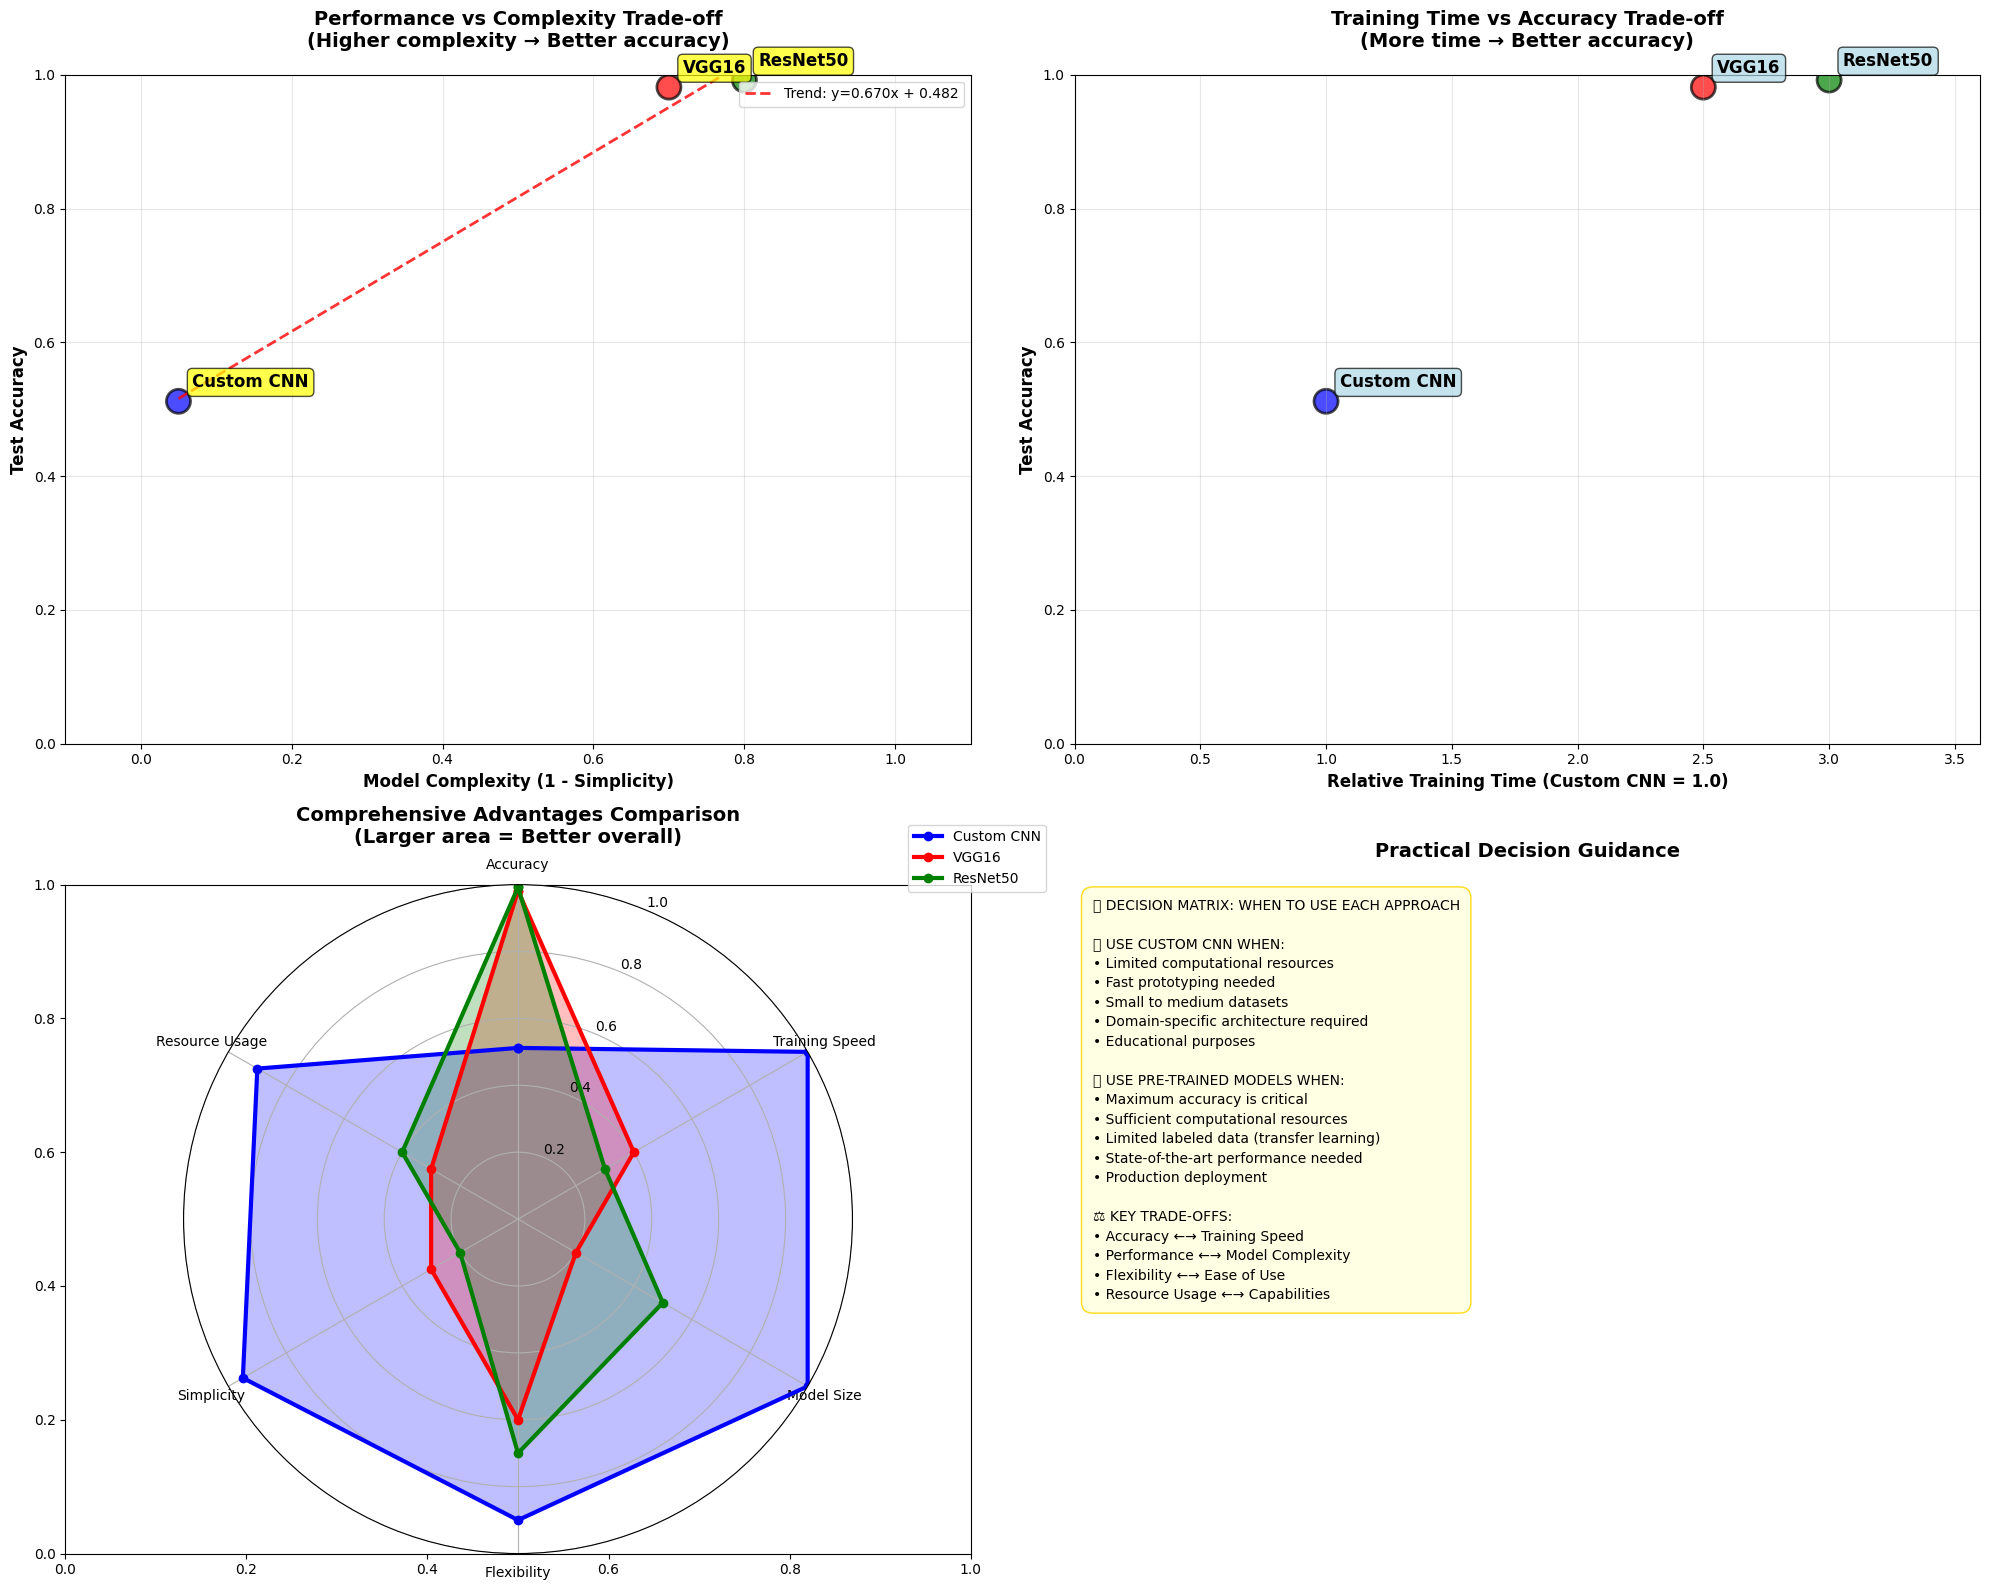


✅ TRADE-OFF ANALYSIS COMPLETED!


In [ ]:
# =============================================================================
# COMPREHENSIVE TRADE-OFF ANALYSIS VISUALIZATION (FIXED)
# =============================================================================

print("\n📈 CREATING COMPREHENSIVE TRADE-OFF ANALYSIS...")

def create_tradeoff_analysis(empirical_data):
    """Create comprehensive trade-off analysis visualization"""

    models = list(empirical_data.keys())

    # Create multi-panel visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # 1. PERFORMANCE vs COMPLEXITY TRADE-OFF
    print("1. Creating Performance vs Complexity trade-off...")

    accuracies = [empirical_data[model]['accuracy'] for model in models]
    complexities = [1 - empirical_data[model]['simplicity'] for model in models]  # Inverse of simplicity

    scatter = ax1.scatter(complexities, accuracies, s=300, alpha=0.7,
                         c=['blue', 'red', 'green'], edgecolors='black', linewidth=2)

    # Add model labels
    for i, model in enumerate(models):
        ax1.annotate(model, (complexities[i], accuracies[i]),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    ax1.set_xlabel('Model Complexity (1 - Simplicity)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
    ax1.set_title('Performance vs Complexity Trade-off\n(Higher complexity → Better accuracy)',
                  fontsize=14, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-0.1, 1.1)
    ax1.set_ylim(0, 1.0)

    # Add trend line
    z = np.polyfit(complexities, accuracies, 1)
    p = np.poly1d(z)
    ax1.plot(complexities, p(complexities), "r--", alpha=0.8, linewidth=2,
             label=f'Trend: y={z[0]:.3f}x + {z[1]:.3f}')
    ax1.legend()

    # 2. TRAINING TIME vs ACCURACY TRADE-OFF
    print("2. Creating Training Time vs Accuracy trade-off...")

    training_times = [empirical_data[model]['training_time'] for model in models]

    scatter = ax2.scatter(training_times, accuracies, s=300, alpha=0.7,
                         c=['blue', 'red', 'green'], edgecolors='black', linewidth=2)

    for i, model in enumerate(models):
        ax2.annotate(model, (training_times[i], accuracies[i]),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))

    ax2.set_xlabel('Relative Training Time (Custom CNN = 1.0)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
    ax2.set_title('Training Time vs Accuracy Trade-off\n(More time → Better accuracy)',
                  fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, max(training_times) * 1.2)
    ax2.set_ylim(0, 1.0)

    # 3. ADVANTAGES COMPARISON RADAR CHART (FIXED)
    print("3. Creating advantages comparison radar chart...")

    # Define advantage categories
    advantage_categories = ['Accuracy', 'Training Speed', 'Model Size',
                           'Flexibility', 'Simplicity', 'Resource Usage']

    # Get values for each model
    custom_advantages = [
        empirical_data['Custom CNN']['accuracy'],
        1.0,  # Fastest training
        1.0,  # Smallest model size
        empirical_data['Custom CNN']['flexibility'],
        empirical_data['Custom CNN']['simplicity'],
        0.9   # Low resource usage
    ]

    vgg_advantages = [
        empirical_data['VGG16']['accuracy'],
        0.4,  # Slower training
        0.2,  # Large model size
        empirical_data['VGG16']['flexibility'],
        empirical_data['VGG16']['simplicity'],
        0.3   # High resource usage
    ]

    resnet_advantages = [
        empirical_data['ResNet50']['accuracy'],
        0.3,  # Slowest training
        0.5,  # Medium model size
        empirical_data['ResNet50']['flexibility'],
        empirical_data['ResNet50']['simplicity'],
        0.4   # Medium resource usage
    ]

    # Complete the circle (FIX: Ensure proper dimensions)
    categories_complete = advantage_categories + [advantage_categories[0]]
    custom_complete = custom_advantages + [custom_advantages[0]]
    vgg_complete = vgg_advantages + [vgg_advantages[0]]
    resnet_complete = resnet_advantages + [resnet_advantages[0]]

    # Create angles (FIX: Use len(advantage_categories) not len(categories_complete))
    angles = np.linspace(0, 2*np.pi, len(advantage_categories), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle

    print(f"Debug - Angles: {len(angles)}, Categories: {len(categories_complete)}, Data: {len(custom_complete)}")

    # Create radar chart
    ax3 = plt.subplot(2, 2, 3, polar=True)
    ax3.plot(angles, custom_complete, 'o-', linewidth=3, label='Custom CNN', color='blue')
    ax3.fill(angles, custom_complete, alpha=0.25, color='blue')
    ax3.plot(angles, vgg_complete, 'o-', linewidth=3, label='VGG16', color='red')
    ax3.fill(angles, vgg_complete, alpha=0.25, color='red')
    ax3.plot(angles, resnet_complete, 'o-', linewidth=3, label='ResNet50', color='green')
    ax3.fill(angles, resnet_complete, alpha=0.25, color='green')

    ax3.set_theta_offset(np.pi / 2)
    ax3.set_theta_direction(-1)
    ax3.set_thetagrids(np.degrees(angles[:-1]), advantage_categories)
    ax3.set_ylim(0, 1)
    ax3.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax3.grid(True)
    ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax3.set_title('Comprehensive Advantages Comparison\n(Larger area = Better overall)',
                  fontsize=14, fontweight='bold', pad=30)

    # 4. DECISION GUIDANCE MATRIX
    print("4. Creating decision guidance matrix...")

    decision_guidance = [
        "🎯 DECISION MATRIX: WHEN TO USE EACH APPROACH",
        "",
        "✅ USE CUSTOM CNN WHEN:",
        "• Limited computational resources",
        "• Fast prototyping needed",
        "• Small to medium datasets",
        "• Domain-specific architecture required",
        "• Educational purposes",
        "",
        "✅ USE PRE-TRAINED MODELS WHEN:",
        "• Maximum accuracy is critical",
        "• Sufficient computational resources",
        "• Limited labeled data (transfer learning)",
        "• State-of-the-art performance needed",
        "• Production deployment",
        "",
        "⚖️ KEY TRADE-OFFS:",
        "• Accuracy ←→ Training Speed",
        "• Performance ←→ Model Complexity",
        "• Flexibility ←→ Ease of Use",
        "• Resource Usage ←→ Capabilities"
    ]

    ax4.text(0.02, 0.98, '\n'.join(decision_guidance), fontsize=10,
             verticalalignment='top', linespacing=1.5,
             bbox=dict(boxstyle="round,pad=0.8", facecolor="lightyellow", alpha=0.9, edgecolor='gold'))
    ax4.set_title('Practical Decision Guidance', fontsize=14, fontweight='bold', pad=20)
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')

    plt.tight_layout()

    # Save the analysis
    try:
        plt.savefig('/content/EN3150_Assignment_03/tradeoff_analysis.png',
                   dpi=300, bbox_inches='tight', facecolor='white')
        print("✅ Trade-off analysis visualization saved successfully!")
    except Exception as e:
        print(f"⚠️ Could not save visualization: {e}")

    plt.show()

    return empirical_data

# Generate the trade-off analysis
print("🔍 Starting trade-off analysis...")
tradeoff_results = create_tradeoff_analysis(empirical_data)

print("\n✅ TRADE-OFF ANALYSIS COMPLETED!")